Ava3lable Themes: 
- chesterish
- grade3
- gruvboxd
- gruvboxl
    color beach, letras negras
- monokai
- oceans16
- onedork
- solarizedd
- solarizedl
    color beach mas claro

In [1]:
# !jt -l
# !jt -t solarizedl -T
# !jt -r

# Inicio
Isstalación de libreiras, funciones, ajuste de datos y definición de variables. 


__Rename__
Recordar que la columna llamada

- `Precio promedio` ahora es `Precio`
- `Centro.1` ahora es `Centro`
- `Centro` ahora es `Centro_Cod`

Presenta los parametros del modelo:

- Dirección datos
- Dirección Graficos
- _Material a analizar_
- _Canal a analizar_
- _Zona de los Datos_
- _Año de inicio de analizis_

Base de datos


`Tipo_de_Cliente`
`Y_producto`
`Año_inicio`

`file_direct_Graphic` 

## Parametros 
data frame `data_i`


> - Producto `i_producto = Y_producto`
> -Para el Canal `Tipo_de_Cliente`
> -Variable a predecir/Grafico `Y_Variable`

Columnas de interes para predecir `X_col`

Diccionario del grupo de columnas `Dic_col`

In [2]:
#===================================
# Archivo
#===================================
Zona_df='Z001'

#===================================
# Clientes
#===================================
Tipo_de_Cliente='Tradicional'

#===================================
# Producto de interes
#===================================
Y_producto='1010078'


#===================================
# Año de Partida
#===================================
Año_inicio='2018'





# Ordenador de escritorio

file_direct_O="C:/Users/user/Documents/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/user/Documents/Data/Data Clear/"
file_direct_Graphic='C:/Users/user/Documents/Graficos'
Png_file_direct_Graphic="C:\\Users\\user\\Documents\\Graficos"
file_direct_Result_Data="C:/Users/user/Documents/Data/Data Resultante/"+Zona_df+"/"

"""
#Notebook
file_direct_O="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"
file_direct_Graphic='C:/Users/rolft/Documents/Repositorios/Graficos'
Png_file_direct_Graphic='C:\\Users\\rolft\\Documents\\Repositorios\\Graficos'
"""
#Graficos
file_direct_Graphic_Canal=file_direct_Graphic+"/"+Tipo_de_Cliente
file_direct_Graphic_Canal_Material=file_direct_Graphic_Canal+'/'+Y_producto

Png_file_direct_Graphic_Canal=Png_file_direct_Graphic+'\\'+'Canal '+Tipo_de_Cliente
Png_file_direct_Graphic_Canal_Material=Png_file_direct_Graphic_Canal+'\\'+Y_producto


## Intalar paquetes, Abrir data y ajustarla 

#### Base Generales

In [3]:
#from adjustText import adjust_text
# from adjustText import *

In [4]:
#=====================================================
                # BASE 
#-----------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from geopandas import *

from plotnine import *

#para ajustar las fechas
import datetime

#para calcular el skew de un array() o list()
from scipy.stats import skew 

In [5]:
#=====================================================
                # sklearn 
#-----------------------------------------------------

#Separador de datos en train/test
from sklearn.model_selection import train_test_split

#Prediccion Ridge Regression
from sklearn.linear_model import Ridge

In [6]:
#=====================================================
                # statsmodels 
#-----------------------------------------------------
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning


#from statsmodels.regression.mixed_linear_model import MixedLMResults
# No se para qué sirve este

In [7]:
#====================================================
#librerias para crear division de series temporales
#====================================================

from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [8]:
# stopwatch
import time
def time_convert(sec):
  mins = sec // 60
  sec = sec % 60
  hours = mins // 60
  mins = mins % 60
  print("Time Lapsed = {0}:{1}:{2}".format(int(hours),int(mins),sec),'\n H:m:s')
#==================================
#          Example
#    input("Press Enter to start")
start_time = time.time()
#    input("Press Enter to stop")
#    end_time = time.time()
#    time_lapsed = end_time - start_time
#    time_convert(time_lapsed)
#=================================

In [9]:
#Histograma con porcentajes
from mizani.formatters import percent_format

In [10]:
from sklearn.cluster import KMeans
from sklearn import metrics

### Propios

In [11]:
import data_read as dr
import R_FM_Func

### Funciones Propias
```python
#Mes_name
data_i.Mes.apply(Mes_name)
```
>Transforma la columna mes numerica en el nombre del mes

#### Numero a Meses 

__Forma de crear una etiqueta para un valor especifico__
```python
#[Y_Graph]
dfz=df.copy()
dfz['Año select']=dfz.apply( lambda x: x['Año'] if x['Año']==2020 else '',axis=1)
dfz
```

In [12]:
#===================================
# Dicionario MES
#===================================

#===================================
# Fecha
D=['Enero','Febrero','Marzo','Abril',
 'Mayo','Junio','Julio','Agosto',
 'Septiembre','Octubre',
 'Noviembre','Diciembre']
Month_dic={i:D[i-1]  for i in range(1,13)}
Month_NUM_dic={ D[i-1]:i  for i in range(1,13)}
#===========================================


def Mes_name(x):
    D=['Enero','Febrero','Marzo','Abril',
    'Mayo','Junio','Julio','Agosto',
    'Septiembre','Octubre',
    'Noviembre','Diciembre']
    return(D[int(x)-1])

In [13]:
Month_NUM_dic

{'Enero': 1,
 'Febrero': 2,
 'Marzo': 3,
 'Abril': 4,
 'Mayo': 5,
 'Junio': 6,
 'Julio': 7,
 'Agosto': 8,
 'Septiembre': 9,
 'Octubre': 10,
 'Noviembre': 11,
 'Diciembre': 12}

#### Función estandariza ciertas columnas a LN 

In [14]:
# ['Frecuency Actual del Cliente','Monetary Actual']
def data_ln(dx,ln_col,drop_columns):
    """
    Pasa un listado de columnas a Ln
    
        dx: dataframe
        ln_col: (Array) Listado de columnas a escalar 
        drop_columns: (True or False)  Eliminar columnas del listado
    """
    df_x=dx.copy()
    for s in ln_col:
        if(s in df_x.columns):
            print(s)
            df_x[s + '(Escala ln)']=\
            df_x[s].apply(lambda x: np.log(x))
    if(drop_columns):
        df_x.drop(columns = ln_col)
    return(df_x)

## Dicionario 
rename aplicado a `Precio promedio`

In [15]:
Dic_col={'Base':
                             ['Material (Nombre)', 'Kilos Venta KG', 'Precio','Cliente'],
        'Fecha':
                             ['Día natural','Día Semana','Semana', 'Mes', 'Año'],
        'Ubicacion':
                             ['Centro','Población'],
        'Cliente Categoria':
                             ['Cluster','Segmento.1', 'Categoría Cliente'],
        'Cliente Atributos':
                             ['Año Creación', 'Material Favorito','Frecuencia Historica'] 
         ,'RFM Row':
                 ['Recency días','Frecuency_Row','Monetary']
        ,'RFM Customers':
                 ['Recency Actual','Frecuency Actual del Cliente','Monetary Actual']
        ,'Ticket Row':
                 ['Ticket Promedio','Ticket CV']
        ,'Ticket Customers':
                 ['Ticket Promedio Actual','Ticket CV Actual']
        }

### Colores 

[Link colores muestra y configuración](https://www.rapidtables.com/web/color/RGB_Color.html)

```python

# Listado cromatico de ggplot
['rgb', 'm SAT lUM']
[[219,95,87] , [2,155,144]]
[[219,208,87] , [37,155,144]]
[[177,219,87] , [71,155,144]]
[[87,219,170],[105,155,133]]
[[87,155,219], [139,155,144]]
[[133,87,219],[174,155,144]]

```

In [16]:
('{:X}{:X}{:X}').format(31, 119, 180)
('{:X}{:X}{:X}').format(219, 96, 97)
('{:X}{:X}{:X}').format(87, 219, 95)

'57DB5F'

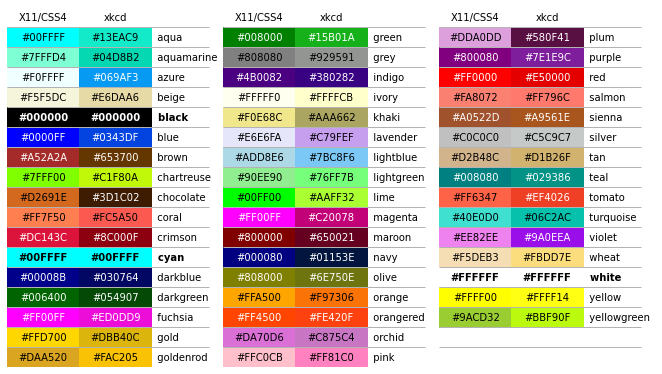

In [17]:
import matplotlib.colors as mcolors
import matplotlib.patches as mpatch

overlap = {name for name in mcolors.CSS4_COLORS
           if f'xkcd:{name}' in mcolors.XKCD_COLORS}

fig = plt.figure(figsize=[9, 5])
ax = fig.add_axes([0, 0, 1, 1])

n_groups = 3
n_rows = len(overlap) // n_groups + 1

for j, color_name in enumerate(sorted(overlap)):
    css4 = mcolors.CSS4_COLORS[color_name]
    xkcd = mcolors.XKCD_COLORS[f'xkcd:{color_name}'].upper()

    # Pick text colour based on perceived luminance.
    rgba = mcolors.to_rgba_array([css4, xkcd])
    luma = 0.299 * rgba[:, 0] + 0.587 * rgba[:, 1] + 0.114 * rgba[:, 2]
    css4_text_color = 'k' if luma[0] > 0.5 else 'w'
    xkcd_text_color = 'k' if luma[1] > 0.5 else 'w'

    col_shift = (j // n_rows) * 3
    y_pos = j % n_rows
    text_args = dict(fontsize=10, weight='bold' if css4 == xkcd else None)
    ax.add_patch(mpatch.Rectangle((0 + col_shift, y_pos), 1, 1, color=css4))
    ax.add_patch(mpatch.Rectangle((1 + col_shift, y_pos), 1, 1, color=xkcd))
    ax.text(0.5 + col_shift, y_pos + .7, css4,
            color=css4_text_color, ha='center', **text_args)
    ax.text(1.5 + col_shift, y_pos + .7, xkcd,
            color=xkcd_text_color, ha='center', **text_args)
    ax.text(2 + col_shift, y_pos + .7, f'  {color_name}', **text_args)

for g in range(n_groups):
    ax.hlines(range(n_rows), 3*g, 3*g + 2.8, color='0.7', linewidth=1)
    ax.text(0.5 + 3*g, -0.3, 'X11/CSS4', ha='center')
    ax.text(1.5 + 3*g, -0.3, 'xkcd', ha='center')

ax.set_xlim(0, 3 * n_groups)
ax.set_ylim(n_rows, -1)
ax.axis('off')

plt.show()

## Datos
- `data_rfm`: Facturaciones 
- `Data_Customers_Full`: Clientes con todos los atributos
<!-- - `Df_Week`: Semanas, Con su respectivo cluster  -->

### Factuas con Week Tipe
`data_rfm`

In [18]:
data_rfm=dr.RFM_Data_func(file_direct_O)
data_rfm=dr.Ajuste_data_RFM(data_rfm)
data_rfm=dr.Merge_Week(file_direct_O,data_rfm)


C:/Users/user/Documents/Data/Data Clear/Z001/data_1010078_CT R.csv
R (198596, 19)
C:/Users/user/Documents/Data/Data Clear/Z001/data_1010078_CT F.csv
F (198596, 19)
C:/Users/user/Documents/Data/Data Clear/Z001/data_1010078_CT M.csv
M (198596, 20)
------------------------------------------------
Merge
RF (198596, 20)
RFM (198596, 22)
Material (Nombre)       object
Kilos Venta KG           int64
Precio                   int64
Día natural             object
Día Semana              object
Semana                  object
Mes                     object
Año                     object
Población               object
Centro                  object
Cliente                 object
Cluster                 object
Segmento.1              object
Categoría Cliente       object
Año Creación            object
Material Favorito       object
Frecuencia Historica    object
Mes_num                 object
Recency                 object
Frecuency_Row            int64
Ingreso de Venta CLP     int64
Monetary       

### Data Clientes
`Data_Customers_Full`


#### RFM
`Customers_data`

In [19]:
Customers_data=dr.Customers_csv_RFM(file_direct_O)
Customers_data=dr.Ajuste_Clientes_RFM(Customers_data)
print(Customers_data.shape)
Customers_data.head()

Cliente                           object
Fecha ultima Compra               object
Recency Actual                     int64
Fecha Creacion                    object
Frecuency Actual del Cliente     float64
Kilos Venta KG Promedio          float64
Precio Promedio                  float64
Año Creación Promedio              int64
Frecuencia Historica Promedio      int64
Ingreso de Venta Promedio        float64
dtype: object
(5073, 10)


Cliente Fecha ultima Compra  Recency Actual Fecha Creacion  \
0  10003742          2020-05-23             521     2020-05-23   
1  10007508          2021-10-26               0     2018-03-01   
2  10017269          2021-10-23               3     2018-01-27   
3  10023880          2021-09-09              47     2018-12-28   
4  10028999          2021-09-24              32     2019-11-05   

   Frecuency Actual del Cliente  Kilos Venta KG Promedio  Precio Promedio  \
0                      0.003344                22.000000      1300.000000   
1                      0.201752                93.158654      1266.894231   
2                      0.059365                22.038462      1347.782051   
3                      0.039591                27.500000      1400.000000   
4                      0.017541                22.000000      1320.923077   

   Año Creación Promedio  Frecuencia Historica Promedio  Monetary Actual  
0                   2007                             19     28600.000000  
1                   2007                            464    117683.471154  
2                   2007                            101     29699.448718  
3                   2007                            383     38390.000000  
4                   2007                             62     29060.307692

### Val
`df_VC`

In [20]:
df_VC=dr.Val_Clientes_weeks(file_direct_O)

Cliente                                         object
%△Valoración Promedio \n Tipo de Semana 0      float64
%△Valoración Promedio \n Tipo de Semana 1      float64
%△Valoración Promedio \n Tipo de Semana 2      float64
%△Valoración Promedio \n Tipo de Semana 3      float64
%△Valoración Promedio \n Tipo de Semana 4      float64
Kilos Venta KG Promedio \n Tipo de Semana 0    float64
Kilos Venta KG Promedio \n Tipo de Semana 1    float64
Kilos Venta KG Promedio \n Tipo de Semana 2    float64
Kilos Venta KG Promedio \n Tipo de Semana 3    float64
Kilos Venta KG Promedio \n Tipo de Semana 4    float64
dtype: object


### Data Customers Full
`Data_Customers_Full`

In [21]:
print(df_VC.shape
,Customers_data.shape
,len(data_rfm.Cliente.unique()))
Data_Customers_Full=dr.Customer_KG_Mean(data_rfm,Customers_data,df_VC)
print(Data_Customers_Full.shape)
(Data_Customers_Full.dtypes)

(5073, 11) (5073, 10) 5073
Cliente                0
Ticket std Actual    367
dtype: int64
(5073, 13)
(5073, 23)
(5073, 24)
(5073, 24)


Cliente                                         object
%△Valoración Promedio \n Tipo de Semana 0      float64
%△Valoración Promedio \n Tipo de Semana 1      float64
%△Valoración Promedio \n Tipo de Semana 2      float64
%△Valoración Promedio \n Tipo de Semana 3      float64
%△Valoración Promedio \n Tipo de Semana 4      float64
Kilos Venta KG Promedio \n Tipo de Semana 0    float64
Kilos Venta KG Promedio \n Tipo de Semana 1    float64
Kilos Venta KG Promedio \n Tipo de Semana 2    float64
Kilos Venta KG Promedio \n Tipo de Semana 3    float64
Kilos Venta KG Promedio \n Tipo de Semana 4    float64
Fecha ultima Compra                             object
Recency Actual                                   int64
Fecha Creacion                                  object
Frecuency Actual del Cliente                   float64
Kilos Venta KG Promedio                        float64
Precio Promedio                                float64
Año Creación Promedio                            int64
Frecuencia

# Data RFM + Val + Ticket de compra  

`RFM_Val_Customers=Clientes_i_RFM[['Cliente']+Dic_col['RFM Customers']+ [Other_Val]].copy()`


- `Estado_R(x):` función de apply
- `DF_Estado_R(DF):` Función modifica recency
- `Df_Pond_FxM(RFM_df ,  Col_FM , weighted_F,weighted_M):`

#### Apuntes 

##### Funciones
1. Ajuste De Datos
   - Estado R
     - `Estado_R(X)` por apply
     - DF_Estado_R(DF) ajusta directamnte el DF ingresado
   - `data_Min_Max(dx,Min_Max_col,drop_columns)`
     > Entrega un df copiado
     >> Ajusta las columnas del arreglo Min_Max_col
     
     - dx dataframe
     - Min_Max_col: (Array) Listado de columnas a escalar
     - drop_columns: (True or False)  Eliminar columnas del listado
   - `data_ln(dx,ln_col,drop_columns)`
    
        >Pasa un listado de columnas a Ln y entrga una copia del dataframe
     - dx: dataframe
     - ln_col: (Array) Listado de columnas a escalar
     - drop_columns: (True or False)  Eliminar columnas del listado

   - `Df_Pond_FxM(RFM_df ,  Col_FM , weighted_F,weighted_M):`

      > Entrega una copia del df:
       >>con una nueva columna llamda $(F \times W_F + M \times W_M)$

     - W_F pond de F
     - W_M pond de M
     - Col_FM:(F,M)
2. Ajuste de K-means
   - `Curva_kmeans(D_Clientes_Frec,Col)`
       >Permite definir el numero de K segmentos de K-means.
3. Proceso de Clustering K-means
   - `def_Col_cluster(D_Clientes, Col, Numero_de_clusters, ln_Col_tra=False)`

   >Entrega(DataFrame):
   >>Una copia del dataframe `D_Clientes` Con una columna adicional llamada `identified_clusters` con los el cluster que pertenece cada cliente.(Cada fila).

   > - D_Clientes: Dataframe a clusterizar (pd.DataFrame)
   > - Col: Columnas utilizadas para el clustering (Array)
   > - Numero_de_clusters: K segmentos a generar (int)
   > - ln_Col_tra=False: Si las columnas ya fueron ajustadas con Ln (Bulean logical value)

## Datos y columnas 
`RFM_All_Customers`

### Data copy

In [22]:
Data_Customers_Full.shape

(5073, 24)

In [23]:
#=======================================
# DATA FRAME
#=======================================

#Copio el data frame solo con las columnas de interes,
#además contruyo el atributo Estado
RFM_All_Customers=\
R_FM_Func.DF_Estado_R(
    Data_Customers_Full.copy()
                )
# [['Cliente']+Dic_col['RFM Customers']]                
RFM_All_Customers.shape
# (5073, 5)

(5073, 25)

### Función estandarizadora

In [24]:
def Ajuste_total(data_x,Val=True):
    """ 
    Austa los datos y los estandariza
    """
    
    df=data_x.copy()
    Week_Val_Col_list=[
        '%△Valoración Promedio \n Tipo de Semana 0',
        '%△Valoración Promedio \n Tipo de Semana 1',
        '%△Valoración Promedio \n Tipo de Semana 2',
        '%△Valoración Promedio \n Tipo de Semana 3',
        '%△Valoración Promedio \n Tipo de Semana 4']
    Week_KG_Col_list=[
        'Kilos Venta KG Promedio \n Tipo de Semana 0',
        'Kilos Venta KG Promedio \n Tipo de Semana 1',
        'Kilos Venta KG Promedio \n Tipo de Semana 2',
        'Kilos Venta KG Promedio \n Tipo de Semana 3',
        'Kilos Venta KG Promedio \n Tipo de Semana 4']
    Ticket_Col_list=['Ticket Promedio Actual', 'Ticket CV Actual']
    # ---------------------------------------------------------------------

    #Sumo 1 al a la columna CV Coeficiente de variación
    df[Ticket_Col_list[1]]=df[Ticket_Col_list[1]].apply(lambda x: x+1)


    # ---------------------------------------------------------------------
    # Estandarización Logaritmica
    df=R_FM_Func.data_ln(
        df,
        Week_KG_Col_list+Ticket_Col_list
        ,drop_columns=True
    )
    # ---------------------------------------------------------------------
    # Estandarización normalizada
    df=R_FM_Func.data_Norm_satandar(
        df,
            Week_Val_Col_list
            + [ s + ' (Escala ln)' for s in Week_KG_Col_list]
            + [ s_i + ' (Escala ln)' for s_i in Ticket_Col_list]
            # + [Ticket_Col_list[0] + ' (Escala ln)' ,Ticket_Col_list[1] + ' (Escala ln)']
            ,drop_columns=True
     )

    Col_Ajuste_otras_var=[
        '%△Valoración Promedio \n Tipo de Semana 0 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 1 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 2 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 3 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 4 (Normalizado)',

        'Kilos Venta KG Promedio \n Tipo de Semana 0 (Escala ln) (Normalizado)',
        'Kilos Venta KG Promedio \n Tipo de Semana 1 (Escala ln) (Normalizado)',
        'Kilos Venta KG Promedio \n Tipo de Semana 2 (Escala ln) (Normalizado)',
        'Kilos Venta KG Promedio \n Tipo de Semana 3 (Escala ln) (Normalizado)',
        'Kilos Venta KG Promedio \n Tipo de Semana 4 (Escala ln) (Normalizado)',

        'Ticket Promedio Actual (Escala ln) (Normalizado)',
        'Ticket CV Actual (Escala ln) (Normalizado)'
       ]
    return (df,Col_Ajuste_otras_var)

### Estandarizado
- Standar Ln
- Standar Normalizado

In [25]:
#=======================================
# ESTANDARIZO
#=======================================

Col_FM=['Frecuency Actual del Cliente','Monetary Actual']          
RFM_All_Customers=\
R_FM_Func.data_Norm_satandar(
   R_FM_Func.data_ln(
       RFM_All_Customers,Col_FM,False)
   ,[c + ' (Escala ln)' for c in Col_FM]
   ,True)

RFM_All_Customers=Ajuste_total(RFM_All_Customers)[0]
RFM_All_Customers.shape

(5073, 27)

## Se contruye  W_F x F + W_M x M
Aplico la función FxM
$W_F= 1$, $W_M=0.3$

In [26]:
(w_f,w_m)=(1,0.3)
RFM_All_Customers=R_FM_Func.Df_Pond_FxM(
                        RFM_All_Customers , 
                        [c + ' (Escala ln)'+' (Normalizado)' for c in Col_FM]
                        # [ 'Frecuency Actual del Cliente (Escala Min Max) (Escala ln)',
                        # 'Monetary Actual (Escala Min Max) (Escala ln)']
                        , 1, 0.3 )
RFM_All_Customers.head(1)

Cliente Fecha ultima Compra  Recency Actual Fecha Creacion  \
0  10003742          2020-05-23             521     2020-05-23   

   Frecuency Actual del Cliente  Kilos Venta KG Promedio  Precio Promedio  \
0                      0.003344                     22.0           1300.0   

   Año Creación Promedio  Frecuencia Historica Promedio  Monetary Actual  ...  \
0                   2007                             19          28600.0  ...   

   %△Valoración Promedio \n Tipo de Semana 3 (Normalizado)  \
0                                          -0.525924         

   %△Valoración Promedio \n Tipo de Semana 4 (Normalizado)  \
0                                          -0.604528         

  Kilos Venta KG Promedio \n Tipo de Semana 0 (Escala ln) (Normalizado)  \
0                                          -0.512446                      

   Kilos Venta KG Promedio \n Tipo de Semana 1 (Escala ln) (Normalizado)  \
0                                          -0.511866                       

   Kilos Venta KG Promedio \n Tipo de Semana 2 (Escala ln) (Normalizado)  \
0                                          -0.516673                       

   Kilos Venta KG Promedio \n Tipo de Semana 3 (Escala ln) (Normalizado)  \
0                                          -0.537556                       

   Kilos Venta KG Promedio \n Tipo de Semana 4 (Escala ln) (Normalizado)  \
0                                           -0.53668                       

   Ticket Promedio Actual (Escala ln) (Normalizado)  \
0                                         -0.527644   

   Ticket CV Actual (Escala ln) (Normalizado)  $(F \times W_F + M \times W_M)$  
0                                   -0.838298                        -1.695001  

[1 rows x 28 columns]

### Prueba K-means

In [27]:

Col_Ajuste_otras_var=[
        '%△Valoración Promedio \n Tipo de Semana 0 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 1 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 2 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 3 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 4 (Normalizado)',

        # 'Kilos Venta KG Promedio \n Tipo de Semana 0 (Escala ln) (Normalizado)',
        # 'Kilos Venta KG Promedio \n Tipo de Semana 1 (Escala ln) (Normalizado)',
        # 'Kilos Venta KG Promedio \n Tipo de Semana 2 (Escala ln) (Normalizado)',
        # 'Kilos Venta KG Promedio \n Tipo de Semana 3 (Escala ln) (Normalizado)',
        # 'Kilos Venta KG Promedio \n Tipo de Semana 4 (Escala ln) (Normalizado)',

        'Ticket Promedio Actual (Escala ln) (Normalizado)',
        'Ticket CV Actual (Escala ln) (Normalizado)'
       ]

In [28]:
R_FM_Func.def_Col_cluster(
    RFM_All_Customers,
    [c + ' (Escala ln)'+' (Normalizado)' for c in (Col_FM )]
     +['$(F \times W_F + M \times W_M)$']
     +Col_Ajuste_otras_var
     ,5
    ).head()

Cliente Fecha ultima Compra  Recency Actual Fecha Creacion  \
0  10003742          2020-05-23             521     2020-05-23   
1  10007508          2021-10-26               0     2018-03-01   
2  10017269          2021-10-23               3     2018-01-27   
3  10023880          2021-09-09              47     2018-12-28   
4  10028999          2021-09-24              32     2019-11-05   

   Frecuency Actual del Cliente  Kilos Venta KG Promedio  Precio Promedio  \
0                      0.003344                22.000000      1300.000000   
1                      0.201752                93.158654      1266.894231   
2                      0.059365                22.038462      1347.782051   
3                      0.039591                27.500000      1400.000000   
4                      0.017541                22.000000      1320.923077   

   Año Creación Promedio  Frecuencia Historica Promedio  Monetary Actual  ...  \
0                   2007                             19     28600.000000  ...   
1                   2007                            464    117683.471154  ...   
2                   2007                            101     29699.448718  ...   
3                   2007                            383     38390.000000  ...   
4                   2007                             62     29060.307692  ...   

   Kilos Venta KG Promedio \n Tipo de Semana 0 (Escala ln) (Normalizado)  \
0                                          -0.512446                       
1                                           1.347480                       
2                                          -0.515984                       
3                                          -0.335981                       
4                                          -0.512446                       

   Kilos Venta KG Promedio \n Tipo de Semana 1 (Escala ln) (Normalizado)  \
0                                          -0.511866                       
1                                           1.449024                       
2                                          -0.496093                       
3                                          -0.130255                       
4                                          -0.511866                       

  Kilos Venta KG Promedio \n Tipo de Semana 2 (Escala ln) (Normalizado)  \
0                                          -0.516673                      
1                                           1.403181                      
2                                          -0.516673                      
3                                          -0.076849                      
4                                          -0.516673                      

   Kilos Venta KG Promedio \n Tipo de Semana 3 (Escala ln) (Normalizado)  \
0                                          -0.537556                       
1                                           1.256160                       
2                                          -0.537556                       
3                                          -0.234660                       
4                                          -0.537556                       

   Kilos Venta KG Promedio \n Tipo de Semana 4 (Escala ln) (Normalizado)  \
0                                          -0.536680                       
1                                           1.464837                       
2                                          -0.536680                       
3                                          -0.309943                       
4                                          -0.536680                       

   Ticket Promedio Actual (Escala ln) (Normalizado)  \
0                                         -0.527644   
1                                          1.376761   
2                                         -0.525339   
3                                         -0.233203   
4                                         -0.527644   

   Ticket CV Actual (Escala ln) (Normalizado)  

# K-means
Se realiza el clustering con los atributos de R+FM  (3 atributos, $F$ $M$ y $FxM$)

El sresultadod el clustering para cada actividad de los clientes se guardó en 
`R_FM_Customers[Actividad]`

Este solo posee los atributos de RFM posteriori, en descripción se incorporan más atributos y se contruye el df de facturaciones

#### R_FM como dicionario para rediriguir según la actividad
`R_FM_Customers`


In [29]:
R_FM_Customers={
    'Activo':RFM_All_Customers[RFM_All_Customers['Actividad del cliente']=='Activo']
    ,'Fugandose':RFM_All_Customers[RFM_All_Customers['Actividad del cliente']=='Fugandose']
    ,'Fugando':RFM_All_Customers[RFM_All_Customers['Actividad del cliente']=='Fugado']
}
for a in R_FM_Customers.keys(): print(a ,R_FM_Customers[a].shape)

Activo (3222, 28)
Fugandose (1232, 28)
Fugando (619, 28)


## Puntaje Clustering

### Curva K-means
`R_FM_Func.Curva_kmeans`

`R_FM_Func.Curva_kmeans()`:

Sum of squared distances of samples to their closest cluster center, weighted by 
the sample weights if provided.

>Suma de las distancias al cuadrado de las muestras a su centro de conglomerado más cercano, ponderada por los pesos de la muestra, si se proporcionan.


 Activo


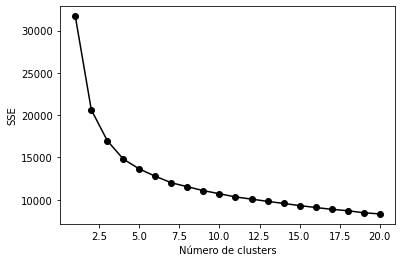


 Fugandose


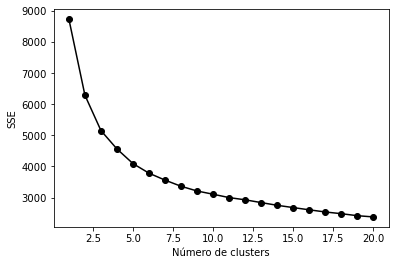


 Fugando


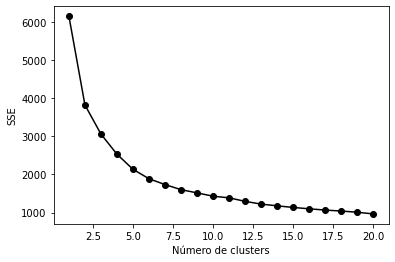

In [30]:
Col_FM=['Frecuency Actual del Cliente', 'Monetary Actual']
Curva_sse=[]
for a in R_FM_Customers.keys(): 
    print('\n',a)
    Curva_sse.append(R_FM_Func.Curva_kmeans(
    R_FM_Customers[a],
    [c + ' (Escala ln)'+' (Normalizado)' for c in Col_FM]
     +['$(F \times W_F + M \times W_M)$']
     +Col_Ajuste_otras_var
    )[0])

### Otras metricas de ajuste

Se realizará todas las pruebas de clustering para evaluar la densidad de los clusters relizados segpun el ajuste definido

In [31]:
Col_Ajuste_otras_var

['%△Valoración Promedio \n Tipo de Semana 0 (Normalizado)',
 '%△Valoración Promedio \n Tipo de Semana 1 (Normalizado)',
 '%△Valoración Promedio \n Tipo de Semana 2 (Normalizado)',
 '%△Valoración Promedio \n Tipo de Semana 3 (Normalizado)',
 '%△Valoración Promedio \n Tipo de Semana 4 (Normalizado)',
 'Ticket Promedio Actual (Escala ln) (Normalizado)',
 'Ticket CV Actual (Escala ln) (Normalizado)']

In [32]:
#columnas a usar
# Col_FM=['Frecuency Actual del Cliente', 'Monetary Actual']
print(list([c + ' (Escala ln)'+' (Normalizado)' for c in Col_FM]
    +['$(F \times W_F + M \times W_M)$']
    +Col_Ajuste_otras_var))
#base de datos a utilziar    
# R_FM_Customers[a]

['Frecuency Actual del Cliente (Escala ln) (Normalizado)', 'Monetary Actual (Escala ln) (Normalizado)', '$(F \times W_F + M \times W_M)$', '%△Valoración Promedio \n Tipo de Semana 0 (Normalizado)', '%△Valoración Promedio \n Tipo de Semana 1 (Normalizado)', '%△Valoración Promedio \n Tipo de Semana 2 (Normalizado)', '%△Valoración Promedio \n Tipo de Semana 3 (Normalizado)', '%△Valoración Promedio \n Tipo de Semana 4 (Normalizado)', 'Ticket Promedio Actual (Escala ln) (Normalizado)', 'Ticket CV Actual (Escala ln) (Normalizado)']


In [33]:
# Función Curva de Metrica
def metr_Curv_Kmeans(D_Clientes_Frec,Col,Metrica_num):
    """ 
    Entrega la curva de la metrica dada la cantidad de cluster

    D_Clientes_Frec dataframe a usar
    ,Col columnas a utilizar para el clustering
    ,Metrica_num metrica a usar int de 0 a 2 range(3)
    
    from sklearn.cluster import KMeans
    from sklearn import metrics
    
    
    """
    X=D_Clientes_Frec.fillna(0)
    X_std=X[Col].copy()
    
    y_Label_Met=\
        ['Silhouette Coefficient',
        'Calinski-Harabasz score',
        'Davies-Bouldin score']
    
    

    SSE = []# aquí se guardan los valores de la metrica seleccionada
    for i in range(2, 21):
        km = KMeans(n_clusters=i
                    ,random_state=1
                    ).fit(X_std)
        # km.fit(X_std)#antes se tenia fuera el fit
        labels_km=km.labels_
        # km.inertia_#Metrica SSE curva normal
        if(Metrica_num==0):
            Met_v=metrics.silhouette_score(X_std, labels_km, metric='euclidean' )
        elif(Metrica_num==1):
            Met_v=metrics.calinski_harabasz_score(X_std, labels_km)
        elif(Metrica_num==2):
            Met_v=metrics.davies_bouldin_score(X_std, labels_km)
        else:
            Met_v=km.inertia_
        SSE.append(Met_v)

    # plot
    plt.plot(range(2, 21), SSE,'-o', color='black')
    plt.xlabel('Número de clusters')
    plt.ylabel(y_Label_Met[Metrica_num])
    Z_fig = plt.gcf()
    plt.show()
    return(Z_fig,SSE)



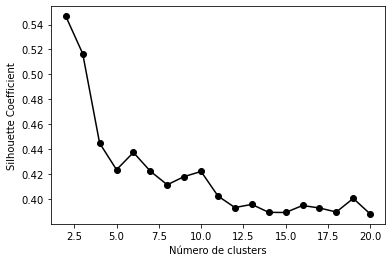

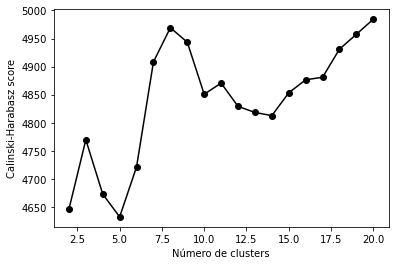

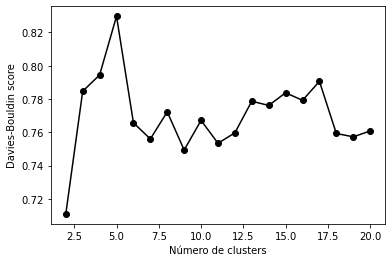

In [34]:
Col_fun=list([c + ' (Escala ln)'+' (Normalizado)' for c in Col_FM]
    +['$(F \times W_F + M \times W_M)$']
    # +Col_Ajuste_otras_var
    )
Fun_array=[]
for i in range(3):    
    Fun_array.append(metr_Curv_Kmeans(R_FM_Customers['Activo'],Col_fun,i)[0])
# Col_fun

### Valoración relaciondada a R2

In [35]:
def Curv_r2_k(D_Clientes_Frec,data_fact,Col):
    X=D_Clientes_Frec.fillna(0)
    X=X[['Cliente']+Col].copy()
    
    y_Label_Met='R2'
    R2_Train=[]
    R2_Test=[]

    for i in range(2,30):
        X_std=R_FM_Func.def_Col_cluster(X, 
            Col,Numero_de_clusters=i)
        R_tupl=\
        R_FM_Func.Func_log_log_Tip_ind_cluster(pd.merge(X_std,data_fact,how='left'),True)
       
        R2_Train.append(R_tupl[0])
        R2_Test.append(R_tupl[1])

    plt.plot(range(2, 30), R2_Train,'-o', label='Train')
    plt.plot(range(2, 30), R2_Test,'-o', label='Test')
    plt.xlabel('Número de clusters')
    plt.ylabel(y_Label_Met)
    plt.legend(loc="best")


    Z_fig = plt.gcf()
    plt.show()
    return(Z_fig) 

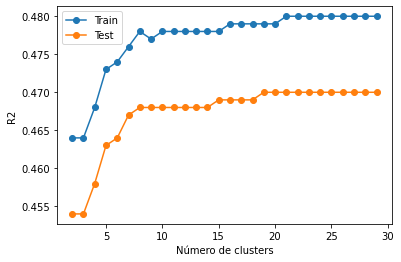

In [36]:
X_rfm=R_FM_Customers['Activo'].copy()
R_2_Curva=Curv_r2_k(X_rfm,data_rfm,Col_fun)

## PDF Save

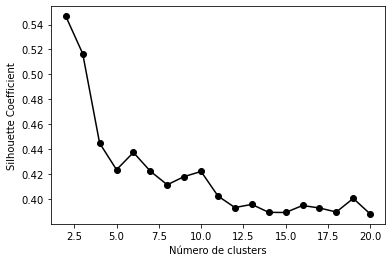

In [37]:
Fun_array[0]

In [38]:
# ```python
from matplotlib.backends.backend_pdf import PdfPages

# Nombre del archivo
file_name=('Grafica_Codo_R+FM_Vall Actv')
print(file_name)
pngfill= Png_file_direct_Graphic_Canal_Material+"\\Cluster\\Val\\"
print(pngfill+file_name)
# pp = PdfPages('foo.pdf')
pp = PdfPages(pngfill+file_name+'.pdf')
pp.savefig(Curva_sse[0])
pp.savefig(Fun_array[0])
pp.savefig(Fun_array[1])
pp.savefig(Fun_array[2])
pp.savefig(R_2_Curva)
pp.close()
# ```

Grafica_Codo_R+FM_Vall Actv
C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\Cluster\Val\Grafica_Codo_R+FM_Vall Actv


## Realización del clustering

### Clustering 
`R_FM_Func.def_Col_cluster`

In [39]:
Col_FM=['Frecuency Actual del Cliente', 'Monetary Actual']
A_Clust=[]
for i in R_FM_Customers.keys():
    R_FM_Customers[i]=\
      R_FM_Func.def_Col_cluster(
       R_FM_Customers[i] 
            ,[c + ' (Escala ln)'+' (Normalizado)' for c in Col_FM]
            +['$(F \times W_F + M \times W_M)$']
            + Col_Ajuste_otras_var
        ,7
        )
R_FM_Customers['Activo'].head()

Cliente Fecha ultima Compra  Recency Actual Fecha Creacion  \
1  10007508          2021-10-26               0     2018-03-01   
2  10017269          2021-10-23               3     2018-01-27   
3  10023880          2021-09-09              47     2018-12-28   
4  10028999          2021-09-24              32     2019-11-05   
6  10032204          2021-10-21               5     2020-08-24   

   Frecuency Actual del Cliente  Kilos Venta KG Promedio  Precio Promedio  \
1                      0.201752                93.158654      1266.894231   
2                      0.059365                22.038462      1347.782051   
3                      0.039591                27.500000      1400.000000   
4                      0.017541                22.000000      1320.923077   
6                      0.007030                22.000000      1373.000000   

   Año Creación Promedio  Frecuencia Historica Promedio  Monetary Actual  ...  \
1                   2007                            464    117683.471154  ...   
2                   2007                            101     29699.448718  ...   
3                   2007                            383     38390.000000  ...   
4                   2007                             62     29060.307692  ...   
6                   2020                             12     30206.000000  ...   

   Kilos Venta KG Promedio \n Tipo de Semana 0 (Escala ln) (Normalizado)  \
1                                           1.347480                       
2                                          -0.515984                       
3                                          -0.335981                       
4                                          -0.512446                       
6                                          -0.512446                       

   Kilos Venta KG Promedio \n Tipo de Semana 1 (Escala ln) (Normalizado)  \
1                                           1.449024                       
2                                          -0.496093                       
3                                          -0.130255                       
4                                          -0.511866                       
6                                          -0.511866                       

  Kilos Venta KG Promedio \n Tipo de Semana 2 (Escala ln) (Normalizado)  \
1                                           1.403181                      
2                                          -0.516673                      
3                                          -0.076849                      
4                                          -0.516673                      
6                                          -0.516673                      

   Kilos Venta KG Promedio \n Tipo de Semana 3 (Escala ln) (Normalizado)  \
1                                           1.256160                       
2                                          -0.537556                       
3                                          -0.234660                       
4                                          -0.537556                       
6                                          -0.537556                       

   Kilos Venta KG Promedio \n Tipo de Semana 4 (Escala ln) (Normalizado)  \
1                                           1.464837                       
2                                          -0.536680                       
3                                          -0.309943                       
4                                          -0.536680                       
6                                          -0.536680                       

   Ticket Promedio Actual (Escala ln) (Normalizado)  \
1                                          1.376761   
2                                         -0.525339   
3                                         -0.233203   
4                                         -0.527644   
6                                         -0.527644   

   Ticket CV Actual (Escala ln) (Normalizado)  

# Descripción

### Data a usar
>A_rfm='Activo'
- `df_C_fact`

- `df_C_Customers`

#### Data Actividad
Se crean los Dataframe con más atributos
- `df_C_fact`
- `df_C_Customers`

In [40]:
A_rfm='Activo'
print(R_FM_Customers.keys())
R_FM_Customers[A_rfm].head(2)

dict_keys(['Activo', 'Fugandose', 'Fugando'])


Cliente Fecha ultima Compra  Recency Actual Fecha Creacion  \
1  10007508          2021-10-26               0     2018-03-01   
2  10017269          2021-10-23               3     2018-01-27   

   Frecuency Actual del Cliente  Kilos Venta KG Promedio  Precio Promedio  \
1                      0.201752                93.158654      1266.894231   
2                      0.059365                22.038462      1347.782051   

   Año Creación Promedio  Frecuencia Historica Promedio  Monetary Actual  ...  \
1                   2007                            464    117683.471154  ...   
2                   2007                            101     29699.448718  ...   

   Kilos Venta KG Promedio \n Tipo de Semana 0 (Escala ln) (Normalizado)  \
1                                           1.347480                       
2                                          -0.515984                       

   Kilos Venta KG Promedio \n Tipo de Semana 1 (Escala ln) (Normalizado)  \
1                                           1.449024                       
2                                          -0.496093                       

  Kilos Venta KG Promedio \n Tipo de Semana 2 (Escala ln) (Normalizado)  \
1                                           1.403181                      
2                                          -0.516673                      

   Kilos Venta KG Promedio \n Tipo de Semana 3 (Escala ln) (Normalizado)  \
1                                           1.256160                       
2                                          -0.537556                       

   Kilos Venta KG Promedio \n Tipo de Semana 4 (Escala ln) (Normalizado)  \
1                                           1.464837                       
2                                          -0.536680                       

   Ticket Promedio Actual (Escala ln) (Normalizado)  \
1                                          1.376761   
2                                         -0.525339   

   Ticket CV Actual (Escala ln) (Normalizado)  \
1                                    0.816802   
2                                   -0.700146   

   $(F \times W_F + M \times W_M)$  identified_clusters        F-1  
1                         2.262435                    2   4.956570  
2                         0.689473                    3  16.845022  

[2 rows x 30 columns]

In [41]:
#=================================
# Creo Dataframe con más valores
#=================================
print(A_rfm)
#----------------------------------------------------
# Dataframe de Facturaciones
df_C_fact=pd.merge(
    R_FM_Customers[A_rfm]
,data_rfm,how='left')
print('Facturas \n',df_C_fact.shape)
# print('Facturas \n', '; '.join( df_C_fact.columns.to_list()))
# ,df_C_fact.columns)

#----------------------------------------------------
# Dataframe de Cientes
print('-------------------------------' )
df_C_Customers=pd.merge(
    R_FM_Customers[A_rfm]
,Data_Customers_Full,how='left')
print('Atributos \n',df_C_Customers.shape)
# print('Atributos \n', '; '.join( df_C_Customers.columns.to_list()))


Activo
Facturas 
 (180375, 53)
-------------------------------
Atributos 
 (3222, 42)


In [42]:
df_C_Customers.describe()

Recency Actual  Frecuency Actual del Cliente  Kilos Venta KG Promedio  \
count     3222.000000                   3222.000000              3222.000000   
mean        25.846369                      0.064938                70.102741   
std         25.994297                      0.071229               161.903278   
min          0.000000                      0.003137                18.000000   
25%          4.000000                      0.015625                22.000000   
50%         14.000000                      0.033469                24.262533   
75%         46.000000                      0.091081                47.936873   
max         90.000000                      0.461632              2443.104839   

       Precio Promedio  Año Creación Promedio  Frecuencia Historica Promedio  \
count      3222.000000            3222.000000                    3222.000000   
mean       1296.676481            2013.738361                     109.569212   
std          67.724598               5.256372                     135.621220   
min         893.484848            2007.000000                       6.000000   
25%        1262.129568            2007.000000                      20.000000   
50%        1305.000000            2014.000000                      47.000000   
75%        1338.160173            2019.000000                     155.000000   
max        1690.000000            2021.000000                    1088.000000   

       Monetary Actual  Ticket std Actual  $F^{-1}$ Actual  \
count     3.222000e+03        3222.000000      3222.000000   
mean      8.398265e+04          32.095678        44.703850   
std       1.751840e+05          95.273881        45.089780   
min       2.420000e+04           0.000000         2.166226   
25%       2.913429e+04           0.000000        10.979255   
50%       3.211001e+04           6.957011        29.878182   
75%       6.250627e+04          21.118058        64.000000   
max       2.754333e+06        2006.682865       318.729413   

       Frecuency Actual del Cliente (Escala ln) (Normalizado)  ...  \
count                                        3222.000000       ...   
mean                                            0.448868       ...   
std                                             0.885554       ...   
min                                            -1.589588       ...   
25%                                            -0.267337       ...   
50%                                             0.360041       ...   
75%                                             1.184561       ...   
max                                             2.521275       ...   

       %△Valoración Promedio \n Tipo de Semana 2  \
count                                3222.000000   
mean                                   -0.018312   
std                                     0.048756   
min                                    -0.214158   
25%                                    -0.037369   
50%                                    -0.007353   
75%                                     0.011552   
max                                     0.149134   

       %△Valoración Promedio \n Tipo de Semana 3  \
count                                3222.000000   
mean                                   -0.025287   
std                                     0.072997   
min                                    -0.424027   
25%                                    -0.063271   
50%                                    -0.020701   
75%                                     0.018023   
max                                     0.289688   

       %△Valoración Promedio \n Tipo de Semana 4  \
count                                3222.000000   
mean                                   -0.023534   
std                                     0.060116   
min                                    -0.379381   
25%                                    -0.058305   
50%                                    -0.023075   
75%                                     0.006380   
max                  

In [43]:
df_C_Customers.head()

Cliente Fecha ultima Compra  Recency Actual Fecha Creacion  \
0  10007508          2021-10-26               0     2018-03-01   
1  10017269          2021-10-23               3     2018-01-27   
2  10023880          2021-09-09              47     2018-12-28   
3  10028999          2021-09-24              32     2019-11-05   
4  10032204          2021-10-21               5     2020-08-24   

   Frecuency Actual del Cliente  Kilos Venta KG Promedio  Precio Promedio  \
0                      0.201752                93.158654      1266.894231   
1                      0.059365                22.038462      1347.782051   
2                      0.039591                27.500000      1400.000000   
3                      0.017541                22.000000      1320.923077   
4                      0.007030                22.000000      1373.000000   

   Año Creación Promedio  Frecuencia Historica Promedio  Monetary Actual  ...  \
0                   2007                            464    117683.471154  ...   
1                   2007                            101     29699.448718  ...   
2                   2007                            383     38390.000000  ...   
3                   2007                             62     29060.307692  ...   
4                   2020                             12     30206.000000  ...   

   %△Valoración Promedio \n Tipo de Semana 2  \
0                                   0.013715   
1                                   0.031472   
2                                   0.021134   
3                                   0.015446   
4                                   0.006146   

   %△Valoración Promedio \n Tipo de Semana 3  \
0                                   0.024529   
1                                   0.005699   
2                                   0.012619   
3                                  -0.077532   
4                                  -0.030713   

  %△Valoración Promedio \n Tipo de Semana 4  \
0                                  0.013856   
1                                  0.000751   
2                                  0.007263   
3                                 -0.034667   
4                                 -0.030713   

   Kilos Venta KG Promedio \n Tipo de Semana 0  \
0                                    89.877778   
1                                    21.941176   
2                                    25.142857   
3                                    22.000000   
4                                    22.000000   

   Kilos Venta KG Promedio \n Tipo de Semana 1  \
0                                    96.475000   
1                                    22.263158   
2                                    29.333333   
3                                    22.000000   
4                                    22.000000   

   Kilos Venta KG Promedio \n Tipo de Semana 2  \
0                                    95.560606   
1                                    22.000000   
2                                    30.800000   
3                                    22.000000   
4                                    22.000000   

   Kilos Venta KG Promedio \n Tipo de Semana 3  \
0                                    90.200000   
1                                    22.000000   
2                                    27.919048   
3                                    22.000000   
4                                    22.000000   

   Kilos Venta KG Promedio \n Tipo de Semana 4  Ticket Promedio Actual  \
0                                        110.0               93.158654   
1                                         22.0               22.038462   
2                                         26.4               27.500000   
3                                         22.0               22.000000   
4                                         22.0               22.000000   

   Ticket CV Actual  
0          0.388748  
1          0.027791  
2          0.440096  
3          0.000000  
4          0.000000  

[5 rows x 42 c

#### Definición Semgento

Diccionario `RFM_Dic_Cluster`

1. Activo
    >0. segmento de alta frecuencia, Monetary Promedio
    >1. Semengo de alto poder adquisitivo
    >2. semegneot de frecuencia promedio, Monetary promedio 
    >3. segmento de alta frecuencua y Medio alto poder adquisitivo
    >4. semgento de baja frecuencia, poder adquisitvo promedio(Cliente oportunista)

In [44]:
L_clusters_A=len(df_C_Customers.identified_clusters.unique())

RFM_Dic_Cluster={
    'Activo':[
        'Segmento '+ str(i) 
        for i in range(L_clusters_A)
           
    ]

}

# '$F$ Alto, ' +'$M$ Promedio'
# ,'$F$ Media Alto, ' +'$M$ Alto'
# ,'$F$ Promedio, ' +'$M$ Media Bajo'
# ,'$F$ Alto, ' +'$M$ Media Alto'
# ,'$F$ Bajo, ' +'$M$ Bajo' 

Se incorpora columna Segmento a los DF

In [45]:
print(A_rfm)
df_C_Customers['Segmento']=\
    df_C_Customers.identified_clusters.apply(lambda x: RFM_Dic_Cluster[A_rfm][int(x)]
                            )

df_C_fact['Segmento']=\
    df_C_fact.identified_clusters.apply(lambda x: RFM_Dic_Cluster[A_rfm][int(x)]
                            )
print(df_C_fact.columns)

df_C_Customers.head(1)


Activo
Index(['Cliente', 'Fecha ultima Compra', 'Recency Actual', 'Fecha Creacion',
       'Frecuency Actual del Cliente', 'Kilos Venta KG Promedio',
       'Precio Promedio', 'Año Creación Promedio',
       'Frecuencia Historica Promedio', 'Monetary Actual', 'Ticket std Actual',
       '$F^{-1}$ Actual', 'Actividad del cliente',
       'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '%△Valoración Promedio \n Tipo de Semana 0 (Normalizado)',
       '%△Valoración Promedio \n Tipo de Semana 1 (Normalizado)',
       '%△Valoración Promedio \n Tipo de Semana 2 (Normalizado)',
       '%△Valoración Promedio \n Tipo de Semana 3 (Normalizado)',
       '%△Valoración Promedio \n Tipo de Semana 4 (Normalizado)',
       'Kilos Venta KG Promedio \n Tipo de Semana 0 (Escala ln) (Normalizado)',
       'Kilos Venta KG Promedio \n Tipo de Semana 1 (Escala ln) (Normalizado)',
       'Kilos Venta KG Promedio \n Tipo de Semana 2 (Escala l

Cliente Fecha ultima Compra  Recency Actual Fecha Creacion  \
0  10007508          2021-10-26               0     2018-03-01   

   Frecuency Actual del Cliente  Kilos Venta KG Promedio  Precio Promedio  \
0                      0.201752                93.158654      1266.894231   

   Año Creación Promedio  Frecuencia Historica Promedio  Monetary Actual  ...  \
0                   2007                            464    117683.471154  ...   

   %△Valoración Promedio \n Tipo de Semana 3  \
0                                   0.024529   

   %△Valoración Promedio \n Tipo de Semana 4  \
0                                   0.013856   

  Kilos Venta KG Promedio \n Tipo de Semana 0  \
0                                   89.877778   

   Kilos Venta KG Promedio \n Tipo de Semana 1  \
0                                       96.475   

   Kilos Venta KG Promedio \n Tipo de Semana 2  \
0                                    95.560606   

   Kilos Venta KG Promedio \n Tipo de Semana 3  \
0                                         90.2   

   Kilos Venta KG Promedio \n Tipo de Semana 4  Ticket Promedio Actual  \
0                                        110.0               93.158654   

   Ticket CV Actual    Segmento  
0          0.388748  Segmento 2  

[1 rows x 43 columns]

#### Data de para tabla o Grafico

In [46]:
#========================================================
# Data Frame con los atributos numericos de cada semgneto

#Data Frame copia de los cleintes
rfm_df=df_C_Customers.copy()

#=================================================
# Columna de Atributos que son numericos
df_colums=pd.DataFrame(rfm_df.dtypes).reset_index()
num_Col=df_colums[(df_colums[0]=='int64')
|(df_colums[0]=='float64')]['index'].to_list()
# num_Col
del df_colums


L_df_Col=list()
for c in num_Col: # Dic_col['RFM Customers']:
    L_df_Col.append(
    pd.DataFrame( 
        {'Valor': rfm_df[c].to_list()
        ,'Atributo':[c for i in range(rfm_df.shape[0])]
        ,'Segmento':rfm_df['Segmento']
        }
                )
    )
df_col=pd.concat(L_df_Col)
df_col.Valor=df_col.Valor.astype('float64')
df_col.head(2)

Valor        Atributo    Segmento
0    0.0  Recency Actual  Segmento 2
1    3.0  Recency Actual  Segmento 3

## Tablas Descriptivas
>`df_C_fact`

>`df_C_Customers`

### Atributo segmetno

### Atributos RFM
pegar en latex post grafico des dispersion

In [47]:
rfm_df.columns

Index(['Cliente', 'Fecha ultima Compra', 'Recency Actual', 'Fecha Creacion',
       'Frecuency Actual del Cliente', 'Kilos Venta KG Promedio',
       'Precio Promedio', 'Año Creación Promedio',
       'Frecuencia Historica Promedio', 'Monetary Actual', 'Ticket std Actual',
       '$F^{-1}$ Actual', 'Actividad del cliente',
       'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '%△Valoración Promedio \n Tipo de Semana 0 (Normalizado)',
       '%△Valoración Promedio \n Tipo de Semana 1 (Normalizado)',
       '%△Valoración Promedio \n Tipo de Semana 2 (Normalizado)',
       '%△Valoración Promedio \n Tipo de Semana 3 (Normalizado)',
       '%△Valoración Promedio \n Tipo de Semana 4 (Normalizado)',
       'Kilos Venta KG Promedio \n Tipo de Semana 0 (Escala ln) (Normalizado)',
       'Kilos Venta KG Promedio \n Tipo de Semana 1 (Escala ln) (Normalizado)',
       'Kilos Venta KG Promedio \n Tipo de Semana 2 (Escala ln) (Nor

In [52]:
rfm_df['Frecuency-1']=rfm_df[ Dic_col['RFM Customers'][1] ].apply(lambda x: x**(-1))

print\
(rfm_df[['Segmento', Dic_col['RFM Customers'][0] , 'Frecuency-1',Dic_col['RFM Customers'][2] 
        # ,'$(F \times W_F + M \times W_M)$' 
         ] ]\
        .groupby('Segmento').mean().round(0).to_latex\
                (float_format="{:,.0f}".format))

# rfm_df['Frecuency-1']=rfm_df[ Dic_col['RFM Customers'][1] ].apply(lambda x: x**(-1))
rfm_df[['Segmento', Dic_col['RFM Customers'][0] , 'Frecuency-1',Dic_col['RFM Customers'][2] 
        # ,'$(F \times W_F + M \times W_M)$' 
         ] ]\
        .groupby('Segmento').mean().round(0)

\begin{tabular}{lrrr}
\toprule
{} &  Recency Actual &  Frecuency-1 &  Monetary Actual \\
Segmento   &                 &              &                  \\
\midrule
Segmento 0 &              40 &           78 &           29,393 \\
Segmento 1 &              24 &           30 &          767,486 \\
Segmento 2 &              10 &           13 &          176,101 \\
Segmento 3 &              31 &           50 &           31,815 \\
Segmento 4 &              42 &           88 &           29,784 \\
Segmento 5 &              20 &           26 &           48,223 \\
Segmento 6 &               8 &            9 &           53,485 \\
\bottomrule
\end{tabular}



Recency Actual  Frecuency-1  Monetary Actual
Segmento                                                
Segmento 0            40.0         78.0          29393.0
Segmento 1            24.0         30.0         767486.0
Segmento 2            10.0         13.0         176101.0
Segmento 3            31.0         50.0          31815.0
Segmento 4            42.0         88.0          29784.0
Segmento 5            20.0         26.0          48223.0
Segmento 6             8.0          9.0          53485.0

#### Descriptivo

In [49]:
# rfm_df=RFM_All_Customers.copy()
# Ac_T=pd.CategoricalDtype(categories=['Activo', 'Fugandose','Fugado'], ordered=True)
# rfm_df['Actividad del cliente']=pd.Series(rfm_df['Actividad del cliente'], dtype=Ac_T)


rfm_df['Frecuency-1']=\
    rfm_df[ Dic_col['RFM Customers'][1] ]\
        .apply(lambda x: x**(-1))

#Listas
L_round=[0,0,0]
List_Tab=list()

for i in range(3):
#     i=1
    if(i==1):
        
        List_Tab.append(
        rfm_df[['Segmento', 'Frecuency-1' ]]\
        .groupby('Segmento').describe()\
        ['Frecuency-1'].reset_index()\
        .round(L_round[i]))

        List_Tab[i]['Atributo']=['Frecuency-1' for j in range(L_clusters_A)]
    else:    
        List_Tab.append(
        rfm_df[['Segmento', Dic_col['RFM Customers'][i] ]]\
        .groupby('Segmento').describe()\
        [Dic_col['RFM Customers'][i]].reset_index()\
        .round(L_round[i]))
        List_Tab[i]['Atributo']=[Dic_col['RFM Customers'][i] for j in range(L_clusters_A)]
        
#     List_Tab[i]=List_Tab[i].drop(columns=['count'])
    List_Tab[i].set_index('Atributo')
# pd.concat(List_Tab  )
# List_Tab[0].set_index('Atributo')
print(pd.concat(List_Tab).set_index(['Atributo','Segmento']).to_latex\
          (float_format="{:,.0f}".format)
     
     )
pd.concat(List_Tab  ).set_index(['Atributo','Segmento'])

\begin{tabular}{llrrrrrrrr}
\toprule
                &            &  count &    mean &     std &     min &     25\% &     50\% &       75\% &       max \\
Atributo & Segmento &        &         &         &         &         &         &           &           \\
\midrule
Recency Actual & Segmento 0 &    749 &      40 &      26 &       0 &      17 &      41 &        62 &        90 \\
                & Segmento 1 &    126 &      24 &      22 &       0 &       6 &      18 &        35 &        88 \\
                & Segmento 2 &    402 &      10 &      16 &       0 &       3 &       4 &         7 &        88 \\
                & Segmento 3 &    545 &      31 &      27 &       0 &       7 &      24 &        52 &        90 \\
                & Segmento 4 &    370 &      42 &      25 &       0 &      26 &      43 &        60 &        90 \\
                & Segmento 5 &    450 &      20 &      21 &       0 &       4 &      11 &        29 &        89 \\
                & Segmento 6 &    580 &  

count      mean       std       min       25%  \
Atributo        Segmento                                                    
Recency Actual  Segmento 0  749.0      40.0      26.0       0.0      17.0   
                Segmento 1  126.0      24.0      22.0       0.0       6.0   
                Segmento 2  402.0      10.0      16.0       0.0       3.0   
                Segmento 3  545.0      31.0      27.0       0.0       7.0   
                Segmento 4  370.0      42.0      25.0       0.0      26.0   
                Segmento 5  450.0      20.0      21.0       0.0       4.0   
                Segmento 6  580.0       8.0      14.0       0.0       1.0   
Frecuency-1     Segmento 0  749.0      78.0      47.0      12.0      46.0   
                Segmento 1  126.0      30.0      25.0       4.0      14.0   
                Segmento 2  402.0      13.0      14.0       2.0       5.0   
                Segmento 3  545.0      50.0      42.0       5.0      23.0   
                Segmento 4  370.0      88.0      45.0      15.0      56.0   
                Segmento 5  450.0      26.0      20.0       5.0      13.0   
                Segmento 6  580.0       9.0       5.0       2.0       5.0   
Monetary Actual Segmento 0  749.0   29393.0    3000.0   26369.0   28221.0   
                Segmento 1  126.0  767486.0  468556.0  144387.0  381467.0   
                Segmento 2  402.0  176101.0   82065.0   77423.0  116910.0   
                Segmento 3  545.0   31815.0    4786.0   27000.0   29700.0   
                Segmento 4  370.0   29784.0   14482.0   24200.0   26733.0   
                Segmento 5  450.0   48223.0   23180.0   28508.0   32200.0   
                Segmento 6  580.0   53485.0   17462.0   29666.0   38570.0   

                                 50%        75%        max  
Atributo        Segmento                                    
Recency Actual  Segmento 0      41.0       62.0       90.0  
                Segmento 1      18.0       35.0       88.0  
                Segmento 2       4.0        7.0       88.0  
                Segmento 3      24.0       52.0       90.0  
                Segmento 4      43.0       60.0       90.0  
                Segmento 5      11.0       29.0       89.0  
                Segmento 6       4.0        6.0       89.0  
Frecuency-1     Segmento 0      65.0       96.0      303.0  
                Segmento 1      22.0       42.0      161.0  
                Segmento 2       8.0       15.0      112.0  
                Segmento 3      38.0       64.0      319.0  
                Segmento 4      79.0      111.0      288.0  
                Segmento 5      21.0       32.0      124.0  
                Segmento 6       7.0       11.0       38.0  
Monetary Actual Segmento 0   28820.0    29553.0    59561.0  
                Segmento 1  695965.0  1012524.0  2754333.0  
                Segmento 2  154538.0   204008.0   587525.0  
                Segmento 3   30376.0    31790.0    70772.0  
                Segmento 4   27433.0    28712.0   280600.0  
                Segmento 5   39166.0    56793.0   164363.0  
                Segmento 6   49405.0    66644.0    96351.0

In [50]:
# rfm_df=RFM_All_Customers.copy()
# Ac_T=pd.CategoricalDtype(categories=['Activo', 'Fugandose','Fugado'], ordered=True)
# rfm_df['Actividad del cliente']=pd.Series(rfm_df['Actividad del cliente'], dtype=Ac_T)

rfm_df['Frecuency-1']=rfm_df[ Dic_col['RFM Customers'][1] ].apply(lambda x: x**(-1))

#Listas
L_round=[0,0,0]
List_Tab=list()

for i in range(3):
#     i=1
    if(i==1):
        
        List_Tab.append(
        rfm_df[['Segmento', 'Frecuency-1' ]]\
        .groupby('Segmento').mean()\
        ['Frecuency-1'].reset_index()\
        .round(L_round[i]))
        List_Tab[i]['Atributo']=['Frecuency-1' for j in range(L_clusters_A)]
        List_Tab[i]=List_Tab[i].rename(columns={
                        'Frecuency-1':'Valor promedio'
                        })
    else:    
        List_Tab.append(
        rfm_df[['Segmento', Dic_col['RFM Customers'][i] ]]\
        .groupby('Segmento').mean()\
        [Dic_col['RFM Customers'][i]].reset_index()\
        .round(L_round[i]))
        List_Tab[i]['Atributo']=[Dic_col['RFM Customers'][i] for j in range(L_clusters_A)]
        
#     List_Tab[i]=List_Tab[i].drop(columns=['count'])
    List_Tab[i].set_index('Atributo')
    List_Tab[i]=List_Tab[i].rename(columns={
                        Dic_col['RFM Customers'][i]:'Valor promedio'
                        })
# pd.concat(List_Tab  )
# List_Tab[0].set_index('Atributo')
print(pd.concat(List_Tab  ).set_index(['Atributo','Segmento']).T.to_latex\
          (float_format="{:,.0f}".format)
     
     )
pd.concat(List_Tab  ).set_index(['Atributo','Segmento']).T

\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrr}
\toprule
Atributo & \multicolumn{7}{l}{Recency Actual} & \multicolumn{7}{l}{Frecuency-1} & \multicolumn{7}{l}{Monetary Actual} \\
Segmento &     Segmento 0 & Segmento 1 & Segmento 2 & Segmento 3 & Segmento 4 & Segmento 5 & Segmento 6 &  Segmento 0 & Segmento 1 & Segmento 2 & Segmento 3 & Segmento 4 & Segmento 5 & Segmento 6 &      Segmento 0 & Segmento 1 & Segmento 2 & Segmento 3 & Segmento 4 & Segmento 5 & Segmento 6 \\
\midrule
Valor promedio &             40 &         24 &         10 &         31 &         42 &         20 &          8 &          78 &         30 &         13 &         50 &         88 &         26 &          9 &          29,393 &    767,486 &    176,101 &     31,815 &     29,784 &     48,223 &     53,485 \\
\bottomrule
\end{tabular}



Atributo       Recency Actual                                              \
Segmento           Segmento 0 Segmento 1 Segmento 2 Segmento 3 Segmento 4   
Valor promedio           40.0       24.0       10.0       31.0       42.0   

Atributo                             Frecuency-1                        ...  \
Segmento       Segmento 5 Segmento 6  Segmento 0 Segmento 1 Segmento 2  ...   
Valor promedio       20.0        8.0        78.0       30.0       13.0  ...   

Atributo                                        Monetary Actual             \
Segmento       Segmento 4 Segmento 5 Segmento 6      Segmento 0 Segmento 1   
Valor promedio       88.0       26.0        9.0         29393.0   767486.0   

Atributo                                                               
Segmento       Segmento 2 Segmento 3 Segmento 4 Segmento 5 Segmento 6  
Valor promedio   176101.0    31815.0    29784.0    48223.0    53485.0  

[1 rows x 21 columns]

### General

In [53]:
df_C_Customers.groupby('Segmento').mean().T

Segmento                                              Segmento 0  \
Recency Actual                                         40.253672   
Frecuency Actual del Cliente                            0.017377   
Kilos Venta KG Promedio                                22.629109   
Precio Promedio                                      1299.754201   
Año Creación Promedio                                2013.640854   
Frecuencia Historica Promedio                          32.005340   
Monetary Actual                                     29393.213938   
Ticket std Actual                                       1.255158   
$F^{-1}$ Actual                                        77.603200   
Frecuency Actual del Cliente (Escala ln) (Norma...     -0.299698   
Monetary Actual (Escala ln) (Normalizado)              -0.494545   
%△Valoración Promedio \n Tipo de Semana 0 (Norm...     -0.306170   
%△Valoración Promedio \n Tipo de Semana 1 (Norm...     -0.249865   
%△Valoración Promedio \n Tipo de Semana 2 (Norm...     -0.045803   
%△Valoración Promedio \n Tipo de Semana 3 (Norm...     -0.238665   
%△Valoración Promedio \n Tipo de Semana 4 (Norm...     -0.242795   
Kilos Venta KG Promedio \n Tipo de Semana 0 (Es...     -0.482274   
Kilos Venta KG Promedio \n Tipo de Semana 1 (Es...     -0.480370   
Kilos Venta KG Promedio \n Tipo de Semana 2 (Es...     -0.489730   
Kilos Venta KG Promedio \n Tipo de Semana 3 (Es...     -0.504631   
Kilos Venta KG Promedio \n Tipo de Semana 4 (Es...     -0.505736   
Ticket Promedio Actual (Escala ln) (Normalizado)       -0.495285   
Ticket CV Actual (Escala ln) (Normalizado)             -0.620386   
$(F \times W_F + M \times W_M)$                        -0.448062   
F-1                                                    77.603200   
%△Valoración Promedio \n Tipo de Semana 0              -0.041220   
%△Valoración Promedio \n Tipo de Semana 1              -0.042377   
%△Valoración Promedio \n Tipo de Semana 2              -0.025718   
%△Valoración Promedio \n Tipo de Semana 3              -0.045366   
%△Valoración Promedio \n Tipo de Semana 4              -0.043402   
Kilos Venta KG Promedio \n Tipo de Semana 0            22.611754   
Kilos Venta KG Promedio \n Tipo de Semana 1            22.646067   
Kilos Venta KG Promedio \n Tipo de Semana 2            22.571386   
Kilos Venta KG Promedio \n Tipo de Semana 3            22.718238   
Kilos Venta KG Promedio \n Tipo de Semana 4            22.651112   
Ticket Promedio Actual                                 22.629109   
Ticket CV Actual                                        0.049472   

Segmento                                               Segmento 1  \
Recency Actual                                          23.809524   
Frecuency Actual del Cliente                             0.057175   
Kilos Venta KG Promedio                                712.022365   
Precio Promedio                                       1115.237906   
Año Creación Promedio                                 2012.888889   
Frecuencia Historica Promedio                          254.873016   
Monetary Actual                                     767485.968381   
Ticket std Actual                                      394.745969   
$F^{-1}$ Actual                                         30.289873   
Frecuency Actual del Cliente (Escala ln) (Norma...       0.580641   
Monetary Actual (Escala ln) (Normalizado)                3.716701   
%△Valoración Promedio \n Tipo de Semana 0 (Norm...      -0.183093   
%△Valoración Promedio \n Tipo de Semana 1 (Norm...      -0.191480   
%△Valoración Promedio \n Tipo de Semana 2 (Norm...      -0.364157   
%△Valoración Promedio \n Tipo de Semana 3 (Norm...      -0.592099   
%△Valoración Promedio \n Tipo de Semana 4 (Norm...      -0.186461   
Kilos Venta KG Promedio \n Tipo de Semana 0 (Es...       3.810810   
Kilos Venta KG Promedio \n Tipo de Semana 1 (Es...       3.773487   
Kilos Venta KG Promedio \n Tipo de Semana 2 (Es...       3.728796   
Kilos Venta KG Promedio \n Tipo de 

## Grafica de dispersion
`rfm_clust_x=df_C_Customers.copy()`

### Grafica M F


#### Codigo

In [54]:
# a=list(R_FM_Customers.keys())[0]
# rfm_clust_x=R_FM_Customers[A_rfm].copy()
rfm_clust_x=df_C_Customers.copy()
print(rfm_clust_x['Actividad del cliente'].unique()[0])

Activo


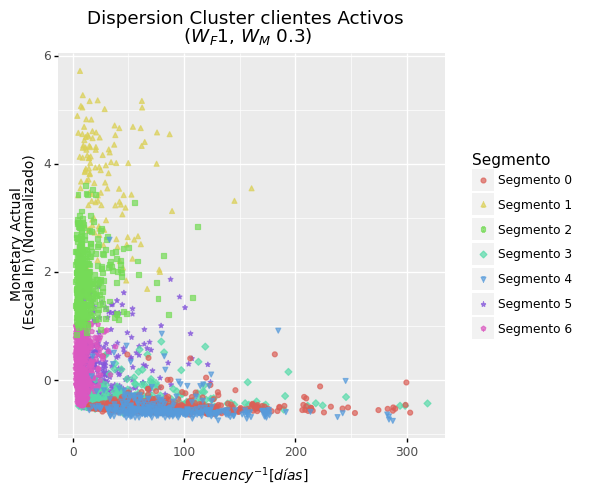

<ggplot: (142409924253)>

In [55]:
rfm_clust_x['Monetary Actual \n en Millones de CLP']=\
rfm_clust_x['Monetary Actual'].apply(lambda x: x/10**6)
rfm_clust_x['Cluster']=rfm_clust_x.identified_clusters.apply(lambda x:   'Segmento '+str(x) )
GGplot_rfm_x=\
(
    ggplot(
        #             rfm_clust
        rfm_clust_x
        , aes(y='Monetary Actual'+' (Escala ln) (Normalizado)'
        #                  'Monetary Actual \n en Millones de CLP',
            ,x='F-1'
            #'Frecuency Actual del Cliente'
            #'F-1'
             ,fill='Segmento'
            ,color='Segmento'
                     ))\
        #                 + labs(y='Disposición a pagar')\
            + geom_point(
                aes(shape='Segmento'),
                alpha=0.7)\
        #                 +geom_smooth()\
        #                 +ggtitle(('Dispersión Clusters Clientes'+
        #                           ' \n Disposición a pagar v/s '+
        #                          'Cluster de Semana'))\
        +ylab('Monetary Actual'+'\n'+' (Escala ln) (Normalizado)')
        +xlab('$Frecuency^{-1} [días]$')
        +ggtitle('Dispersion Cluster clientes '+
                rfm_clust_x['Actividad del cliente'].unique()[0]+'s'+
                 '\n ($W_F $'+str(w_f)+', $W_M$ '+str(w_m) +')'
                 )
        +theme(
            # axis_text_x = element_text(angle=90, hjust=1)
            figure_size=(5,5),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            )\


    )
GGplot_rfm_x

Frecuency Actual del Cliente
Monetary Actual


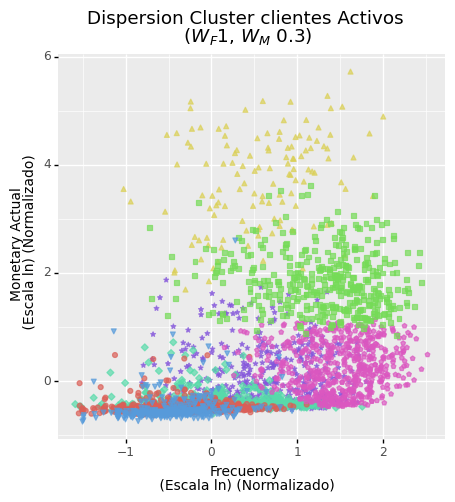

<ggplot: (142410005974)>

In [56]:
GGplot_rfm_FM=\
(
    ggplot(
        #             rfm_clust
        data_ln(rfm_clust_x, ['Frecuency Actual del Cliente',
                             'Monetary Actual'],False)
        , aes(y='Monetary Actual'+' (Escala ln) (Normalizado)'
        #                  'Monetary Actual \n en Millones de CLP',
            ,x='Frecuency Actual del Cliente'+' (Escala ln) (Normalizado)'
            #'F-1'
             ,fill='Segmento'
            ,color='Segmento'
                     ))\
        #                 + labs(y='Disposición a pagar')\
            + geom_point(
                aes(shape='Segmento'),
                alpha=0.7)\
        #                 +geom_smooth()\
        #                 +ggtitle(('Dispersión Clusters Clientes'+
        #                           ' \n Disposición a pagar v/s '+
        #                          'Cluster de Semana'))\
        +ylab('Monetary Actual'+'\n'+' (Escala ln) (Normalizado)')
        +xlab('Frecuency'+'\n'+' (Escala ln) (Normalizado)')
        +ggtitle('Dispersion Cluster clientes '+
                rfm_clust_x['Actividad del cliente'].unique()[0]+'s'+
                 '\n ($W_F $'+str(w_f)+', $W_M$ '+str(w_m) +')'
                 )
        +theme(
            # axis_text_x = element_text(angle=90, hjust=1)
            legend_position='none'
            ,figure_size=(5,5),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            )\


    )
GGplot_rfm_FM

#### Save

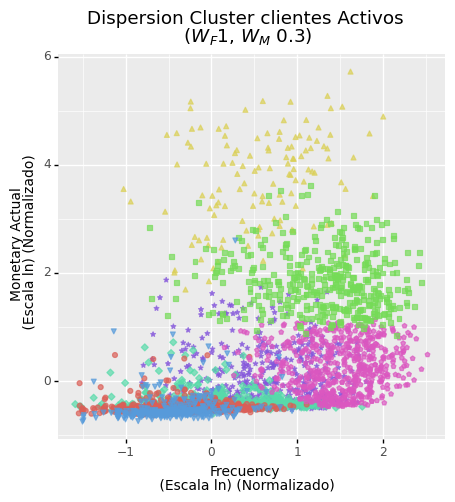

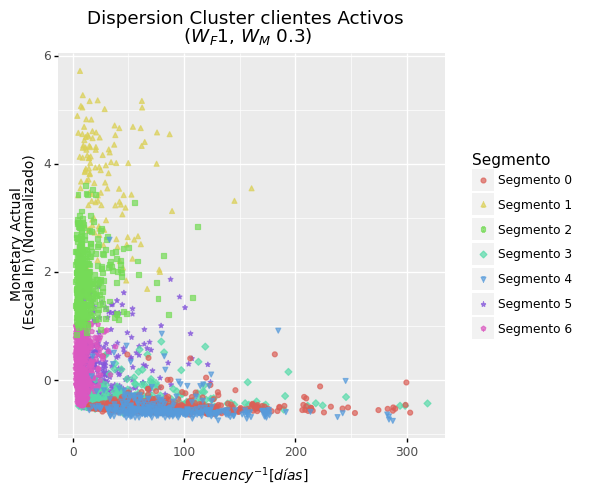

[<ggplot: (142410005974)>, <ggplot: (142409924253)>]

In [57]:
[ GGplot_rfm_FM, GGplot_rfm_x  ]

In [58]:
Png_file_direct_Graphic_Canal_Material+"\\Cluster\\RFM"

'C:\\Users\\user\\Documents\\Graficos\\Canal Tradicional\\1010078\\Cluster\\RFM'

In [59]:
# ```python
#============================
# W_F y W_F con la dispersion de los clusters generados
#============================
file_name=('Clusters r+fm_VAL Activo W Disp')
    
# pngfill= Png_file_direct_Graphic_Canal_Material+"\\Cluster\\Val"
K_numbers=str(len(df_C_Customers.identified_clusters.unique()))
s_K_numbers='K_'+K_numbers
pngfill= Png_file_direct_Graphic_Canal_Material+"\\Cluster\\Val"#+"\\k_NUM\\"+s_K_numbers

start_time = time.time()
save_as_pdf_pages(
                  
                  [ GGplot_rfm_FM, GGplot_rfm_x  ]
                    ,pngfill 
            +"\\"+ file_name + ".pdf")
time_convert(time.time()-start_time)
# ```

c:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\Cluster\Val\Clusters r+fm_VAL Activo W Disp.pdf


Time Lapsed = 0:0:1.315194845199585 
 H:m:s


### Grafica P Q

In [60]:
# a=list(R_FM_Customers.keys())[0]
# rfm_clust_x=R_FM_Customers[A_rfm].copy()
rfm_clust_x=df_C_Customers.copy()
print(rfm_clust_x['Actividad del cliente'].unique()[0])

Activo


In [61]:
rfm_clust_x.columns

Index(['Cliente', 'Fecha ultima Compra', 'Recency Actual', 'Fecha Creacion',
       'Frecuency Actual del Cliente', 'Kilos Venta KG Promedio',
       'Precio Promedio', 'Año Creación Promedio',
       'Frecuencia Historica Promedio', 'Monetary Actual', 'Ticket std Actual',
       '$F^{-1}$ Actual', 'Actividad del cliente',
       'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '%△Valoración Promedio \n Tipo de Semana 0 (Normalizado)',
       '%△Valoración Promedio \n Tipo de Semana 1 (Normalizado)',
       '%△Valoración Promedio \n Tipo de Semana 2 (Normalizado)',
       '%△Valoración Promedio \n Tipo de Semana 3 (Normalizado)',
       '%△Valoración Promedio \n Tipo de Semana 4 (Normalizado)',
       'Kilos Venta KG Promedio \n Tipo de Semana 0 (Escala ln) (Normalizado)',
       'Kilos Venta KG Promedio \n Tipo de Semana 1 (Escala ln) (Normalizado)',
       'Kilos Venta KG Promedio \n Tipo de Semana 2 (Escala ln) (Nor

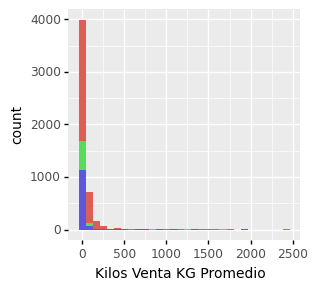

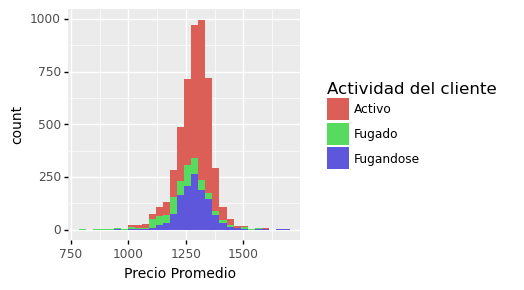

[<ggplot: (142417105333)>, <ggplot: (142416960877)>]

In [62]:
Y_G='Precio Promedio'
X_G='Kilos Venta KG Promedio'
Hist_Estado_R=[(
    ggplot(
     R_FM_Func.DF_Estado_R(Data_Customers_Full)
    ,aes(x= X_G
        # ,y=after_stat('width*density')
        # ,fill='Segmento'
        ,fill='Actividad del cliente'
         ))
    
    + geom_histogram(bins=30,alpha=1)
#      +scale_x_discrete(breaks= range(0,1100))
    # + scale_y_continuous(labels=percent_format()) # display labels as a percentage
       
    # +xlab('Ingresos en Miles de CLP')
    # +ylab('Porcentaje  de '+['Clientes','Facturaciones','Clientes'][i])
    # +ggtitle(List_Title[i])
    
    +theme(#axis_text_x = element_text(angle=90, hjust=1),
            legend_position='none',
            figure_size=(3,3),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            title=element_text(size = 12)
    
    )#theme
    
    
#         +scale_x_continuous(labels =  "{:,.1f}".format
#                         breaks =range(0,1750,250)                            )

),
(
    ggplot(
     R_FM_Func.DF_Estado_R(Data_Customers_Full)
    ,aes(x= Y_G
        # ,y=after_stat('width*density')
        # ,fill='Segmento'
        ,fill='Actividad del cliente'
         ))
    
    + geom_histogram(bins=30,alpha=1)
#      +scale_x_discrete(breaks= range(0,1100))
    # + scale_y_continuous(labels=percent_format()) # display labels as a percentage
       
    # +xlab('Ingresos en Miles de CLP')
    # +ylab('Porcentaje  de '+['Clientes','Facturaciones','Clientes'][i])
    # +ggtitle(List_Title[i])
    
    +theme(#axis_text_x = element_text(angle=90, hjust=1),
            # legend_position='none',
            figure_size=(3,3),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            title=element_text(size = 12)
    
    )#theme
    
    
#         +scale_x_continuous(labels =  "{:,.1f}".format
#                         breaks =range(0,1750,250)                            )

)
]
Hist_Estado_R

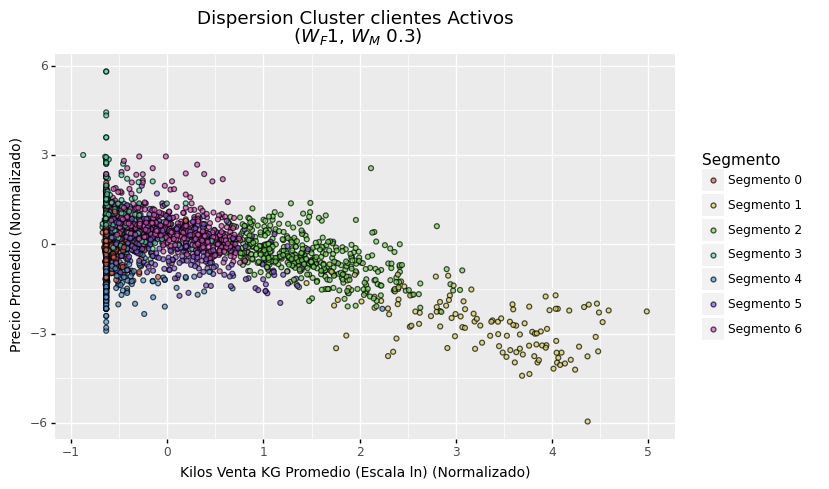

<ggplot: (142417817146)>

In [63]:
Y_G='Precio Promedio'
X_G='Kilos Venta KG Promedio'
(
    ggplot(
        R_FM_Func.data_Norm_satandar( R_FM_Func.data_ln(rfm_clust_x,[X_G],False)
                                    ,[c+' (Escala ln)' for c in [X_G]] + [Y_G] ,False)
        #+' (Escala ln)'
        , aes(y=Y_G+' (Normalizado)'
            ,x=X_G+' (Escala ln)'+' (Normalizado)'
             ,fill='Segmento'
            # ,color='Segmento'
                     ))\
        #                 + labs(y='Disposición a pagar')\
            + geom_point(
        #         aes(color='Cluster de Clientes'),
                alpha=0.7)\
        #                 +geom_smooth()\
        #                 +ggtitle(('Dispersión Clusters Clientes'+
        #                           ' \n Disposición a pagar v/s '+
        #                          'Cluster de Semana'))\
        # +ylab('Monetary Actual'+'\n'+' (Escala ln) (Normalizado)')
        # +xlab('Frecuency'+'\n'+' (Escala ln) (Normalizado)')
        +ggtitle('Dispersion Cluster clientes '+
                rfm_clust_x['Actividad del cliente'].unique()[0]+'s'+
                 '\n ($W_F $'+str(w_f)+', $W_M$ '+str(w_m) +')'
                 )
        +theme(
            # axis_text_x = element_text(angle=0, hjust=0)
            figure_size=(8,5),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
                )


    )


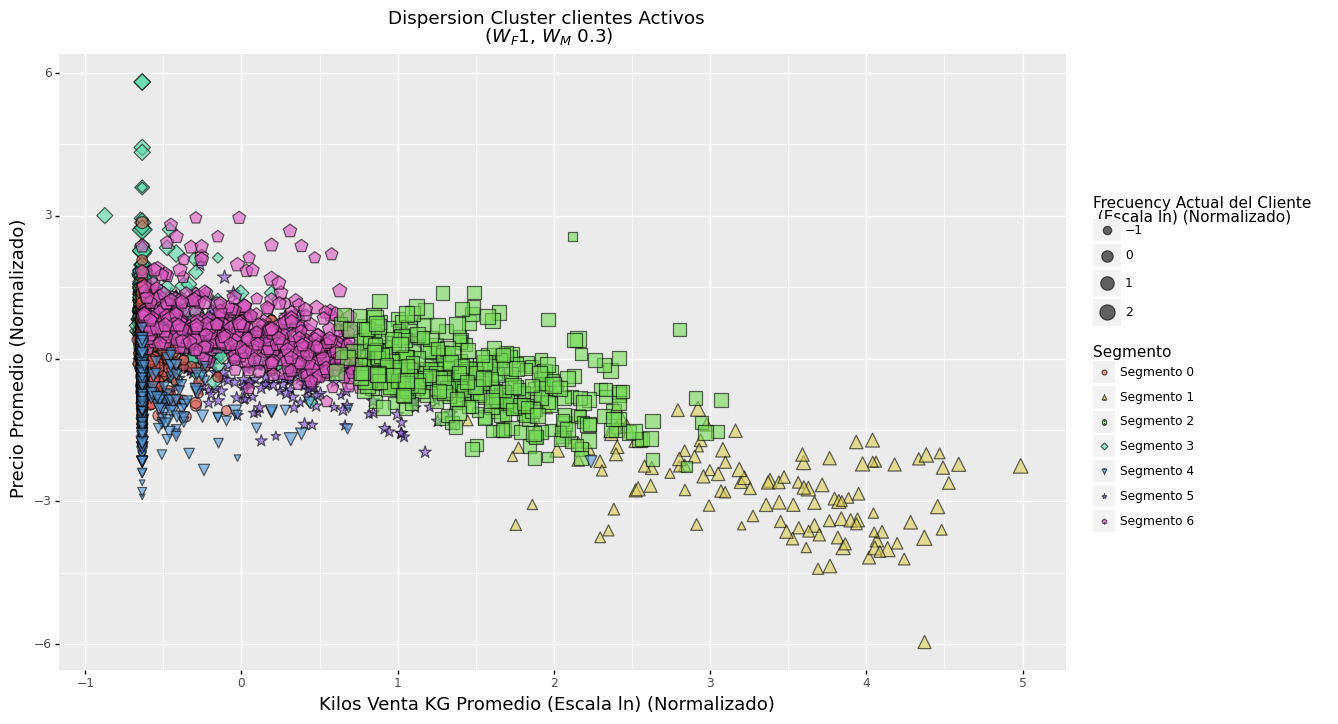

<ggplot: (142410041829)>

In [64]:
Y_G='Precio Promedio'
X_G='Kilos Venta KG Promedio'
rfm_clust_x['Frecuency Actual del Cliente'+'\n (Escala ln) (Normalizado)']=\
    rfm_clust_x['Frecuency Actual del Cliente'+' (Escala ln) (Normalizado)']
Z_G='Frecuency Actual del Cliente'
G_PQ_Clusters=(
    ggplot(
        R_FM_Func.data_Norm_satandar( R_FM_Func.data_ln(rfm_clust_x,[X_G,Z_G],False)
                                    ,[c+' (Escala ln)' for c in [X_G]] + [Y_G] ,False)
        #+' (Escala ln)'
        , aes(y=Y_G+' (Normalizado)'
            ,x=X_G+' (Escala ln)'+' (Normalizado)'
             ,fill='Segmento'
            # ,color='Segmento'
                     ))\
        #                 + labs(y='Disposición a pagar')\
            + geom_point(
                aes( size= Z_G +'\n (Escala ln) (Normalizado)'
                ,shape='Segmento'
                ),
                #+' (Escala ln)'),
                # 'F-1'),
                # 'Frecuency Actual del Cliente'+'\n (Escala ln) (Normalizado)'),
                   
                    alpha=0.6)\
        #                 +geom_smooth()\
        #                 +ggtitle(('Dispersión Clusters Clientes'+
        #                           ' \n Disposición a pagar v/s '+
        #                          'Cluster de Semana'))\
        # +ylab('Monetary Actual'+'\n'+' (Escala ln) (Normalizado)')
        # +xlab('Frecuency'+'\n'+' (Escala ln) (Normalizado)')
        +ggtitle('Dispersion Cluster clientes '+
                rfm_clust_x['Actividad del cliente'].unique()[0]+'s'+
                 '\n ($W_F $'+str(w_f)+', $W_M$ '+str(w_m) +')'
                 )
        +theme(
            # axis_text_x = element_text(angle=0, hjust=0)
            figure_size=(13,8),
            axis_title_x=element_text(size = 13),
            axis_title_y=element_text(size = 13),
                )


    )
G_PQ_Clusters

In [65]:
Png_file_direct_Graphic_Canal_Material+"\\Cluster\\RFM"

'C:\\Users\\user\\Documents\\Graficos\\Canal Tradicional\\1010078\\Cluster\\RFM'

### SAVE

In [66]:
# ```python
#============================
# W_F y W_F con la dispersion de los clusters generados
#============================
file_name=('Disp PQ Clusters r+fm_val Activo')
    
# pngfill= Png_file_direct_Graphic_Canal_Material+"\\Cluster\\Val"
K_numbers=str(len(df_C_Customers.identified_clusters.unique()))
s_K_numbers='K_'+K_numbers
pngfill= Png_file_direct_Graphic_Canal_Material+"\\Cluster\\Val"#+"\\k_NUM\\"+s_K_numbers


start_time = time.time()
save_as_pdf_pages(
                  
                  [ G_PQ_Clusters ]
                    ,pngfill 
            +"\\"+ file_name + ".pdf")
time_convert(time.time()-start_time)
# ```

c:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\Cluster\Val\Disp PQ Clusters r+fm_val Activo.pdf


Time Lapsed = 0:0:0.7096445560455322 
 H:m:s


# Atributos de los Segmentos

Graficos de columnas que describen el valor promedio de los segmentos y el respectivo coeficiente de variación de cada cluster, Atributos: RFM , Precio promedio ticket promedio de compra y cv del ticket de compra

1. [X] Atributos: RFM , Precio promedio ticket promedio de compra y cv del ticket de compra
2. [ ] Falta los Atributos de Valoración %

## Atributos Genericos 

### Data

In [67]:
df_C_Customers.columns

Index(['Cliente', 'Fecha ultima Compra', 'Recency Actual', 'Fecha Creacion',
       'Frecuency Actual del Cliente', 'Kilos Venta KG Promedio',
       'Precio Promedio', 'Año Creación Promedio',
       'Frecuencia Historica Promedio', 'Monetary Actual', 'Ticket std Actual',
       '$F^{-1}$ Actual', 'Actividad del cliente',
       'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '%△Valoración Promedio \n Tipo de Semana 0 (Normalizado)',
       '%△Valoración Promedio \n Tipo de Semana 1 (Normalizado)',
       '%△Valoración Promedio \n Tipo de Semana 2 (Normalizado)',
       '%△Valoración Promedio \n Tipo de Semana 3 (Normalizado)',
       '%△Valoración Promedio \n Tipo de Semana 4 (Normalizado)',
       'Kilos Venta KG Promedio \n Tipo de Semana 0 (Escala ln) (Normalizado)',
       'Kilos Venta KG Promedio \n Tipo de Semana 1 (Escala ln) (Normalizado)',
       'Kilos Venta KG Promedio \n Tipo de Semana 2 (Escala ln) (Nor

In [68]:
def data_Rename(df,Columns_df,String_extra,Boolenas_Firts=False):
    df_Func=df.copy()
    for i in Columns_df:
        if(Boolenas_Firts):
            string_Col=   String_extra +i
        else:
            string_Col=   i+String_extra
        df_Func=df_Func.rename(
            columns={i:string_Col}
        )
    return df_Func

def data_Cov(df,Columns_df,Ar_String,Boolenas_Firts=False):
    """
    Ar_String['Promedio','std']
    """
    df_Func=df.copy()
    for i in Columns_df:
        if(Boolenas_Firts):
            Mean_S =   Ar_String[0] +i
            std_S  =   Ar_String[1] +i
            cov_S  =   'Covarianza '+i
        else:
            Mean_S =   i +Ar_String[0] 
            std_S  =   i + Ar_String[1] 
            cov_S  =   i +'\n Covarianza'
        
        df_Func[cov_S]=\
                    df_Func.apply(lambda x:
                     x[std_S] / abs(x[Mean_S])
                    ,axis=1)
    return df_Func

In [69]:
# df_C_Customers.groupby('Segmento').mean()
# df_C_Customers.groupby('Segmento').std().columns.to_list()
df_Mean_cov_Atribut=\
pd.merge(
    data_Rename(
        df_C_Customers.groupby('Segmento').mean(),
        df_C_Customers.groupby('Segmento').mean().columns.to_list()
        ,'\n Promedio'
).reset_index()
,
    data_Rename(
        df_C_Customers.groupby('Segmento').std(),
        df_C_Customers.groupby('Segmento').std().columns.to_list()
        ,'\n std'
    ).reset_index()
,how='left')


df_Mean_cov_Atribut=data_Cov(df_Mean_cov_Atribut
        ,df_C_Customers.groupby('Segmento').mean().columns.to_list()
        ,['\n Promedio','\n std']
)
# df_C_Customers
df_Mean_cov_Atribut.columns

Index(['Segmento', 'Recency Actual\n Promedio',
       'Frecuency Actual del Cliente\n Promedio',
       'Kilos Venta KG Promedio\n Promedio', 'Precio Promedio\n Promedio',
       'Año Creación Promedio\n Promedio',
       'Frecuencia Historica Promedio\n Promedio',
       'Monetary Actual\n Promedio', 'Ticket std Actual\n Promedio',
       '$F^{-1}$ Actual\n Promedio',
       ...
       '%△Valoración Promedio \n Tipo de Semana 2\n Covarianza',
       '%△Valoración Promedio \n Tipo de Semana 3\n Covarianza',
       '%△Valoración Promedio \n Tipo de Semana 4\n Covarianza',
       'Kilos Venta KG Promedio \n Tipo de Semana 0\n Covarianza',
       'Kilos Venta KG Promedio \n Tipo de Semana 1\n Covarianza',
       'Kilos Venta KG Promedio \n Tipo de Semana 2\n Covarianza',
       'Kilos Venta KG Promedio \n Tipo de Semana 3\n Covarianza',
       'Kilos Venta KG Promedio \n Tipo de Semana 4\n Covarianza',
       'Ticket Promedio Actual\n Covarianza', 'Ticket CV Actual\n Covarianza'],
      

In [70]:
# for i in  df_C_Customers.groupby('Segmento').mean().columns.to_list():
    # print(i)
print(df_C_Customers.groupby('Segmento').mean().columns.to_list())

L_col_G=['Recency Actual', 'Frecuency Actual del Cliente','F-1', 'Monetary Actual'
,'Precio Promedio'
# , 'Año Creación Promedio'
, 'Frecuencia Historica Promedio'
, 'Ticket Promedio Actual'
,'Ticket CV Actual', '$F^{-1}$ Actual'
]

['Recency Actual', 'Frecuency Actual del Cliente', 'Kilos Venta KG Promedio', 'Precio Promedio', 'Año Creación Promedio', 'Frecuencia Historica Promedio', 'Monetary Actual', 'Ticket std Actual', '$F^{-1}$ Actual', 'Frecuency Actual del Cliente (Escala ln) (Normalizado)', 'Monetary Actual (Escala ln) (Normalizado)', '%△Valoración Promedio \n Tipo de Semana 0 (Normalizado)', '%△Valoración Promedio \n Tipo de Semana 1 (Normalizado)', '%△Valoración Promedio \n Tipo de Semana 2 (Normalizado)', '%△Valoración Promedio \n Tipo de Semana 3 (Normalizado)', '%△Valoración Promedio \n Tipo de Semana 4 (Normalizado)', 'Kilos Venta KG Promedio \n Tipo de Semana 0 (Escala ln) (Normalizado)', 'Kilos Venta KG Promedio \n Tipo de Semana 1 (Escala ln) (Normalizado)', 'Kilos Venta KG Promedio \n Tipo de Semana 2 (Escala ln) (Normalizado)', 'Kilos Venta KG Promedio \n Tipo de Semana 3 (Escala ln) (Normalizado)', 'Kilos Venta KG Promedio \n Tipo de Semana 4 (Escala ln) (Normalizado)', 'Ticket Promedio Actual

### Grafico 

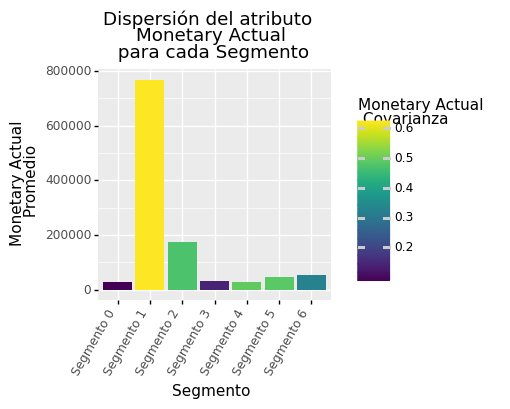

<ggplot: (142418358676)>

In [71]:
i_col = 'Monetary Actual'
Y_G   = i_col+'\n Promedio'
Fill_G= i_col+'\n Covarianza'
ggplot(df_Mean_cov_Atribut
        ,aes(
                x='Segmento'
                , y= Y_G
                ,fill=Fill_G
        )
)\
       + geom_col()\
        +ggtitle('Dispersión del atributo \n' +i_col+ '\n para cada Segmento')\
       +theme(axis_text_x = element_text(angle=60, hjust=1)
                       ,figure_size=(3,3))


In [72]:
# i_col = 'Monetary Actual'
# Y_G   = i_col+'\n Promedio'
# Fill_G= i_col+'\n Covarianza'
G_list_pdf=[
        ggplot(df_Mean_cov_Atribut
        ,aes(
                x='Segmento'
                , y= i_col+'\n Promedio'
                ,fill=i_col+'\n Covarianza'
        )
        )\
        +geom_col()\
        +ggtitle('Dispersión del atributo \n' +i_col+ '\n para cada Segmento')\
        +theme(axis_text_x = element_text(angle=60, hjust=1)
                       ,figure_size=(3,3))

for i_col in L_col_G
]

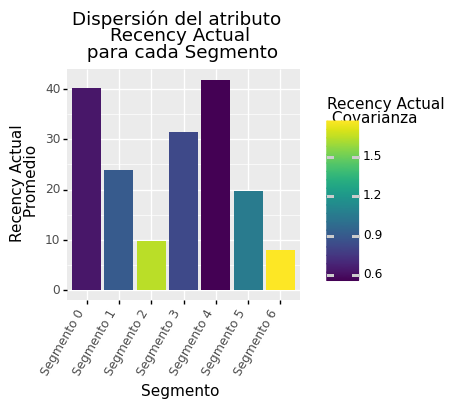

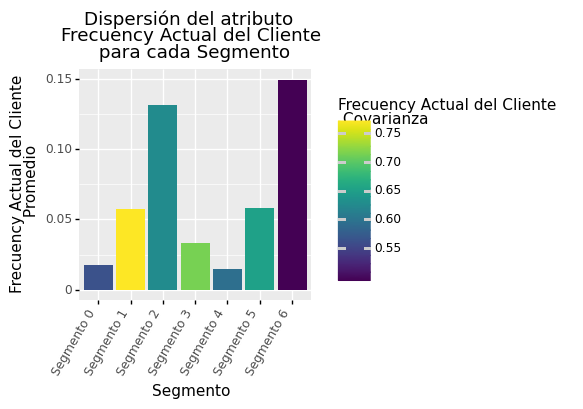

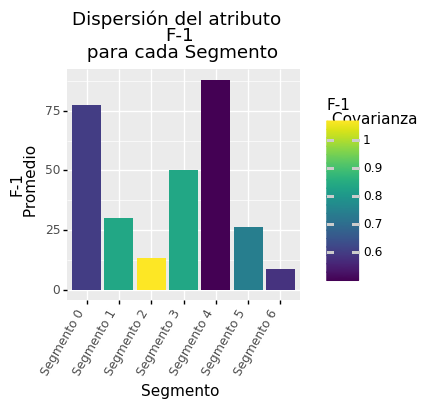

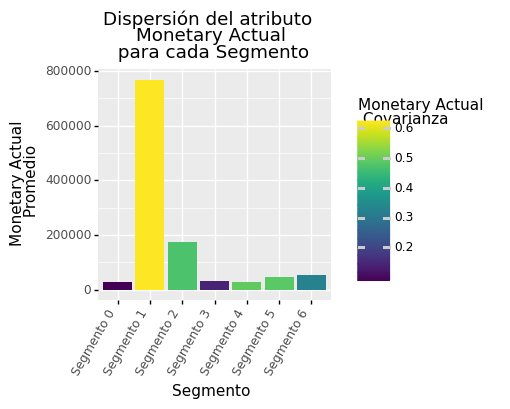

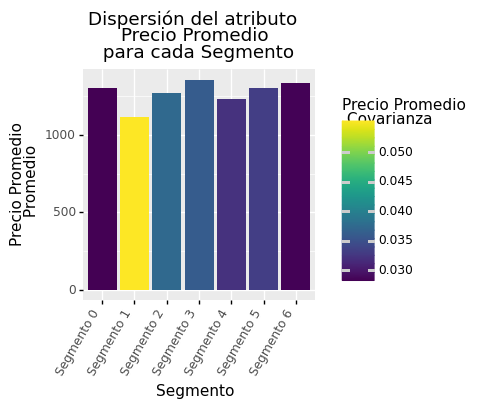

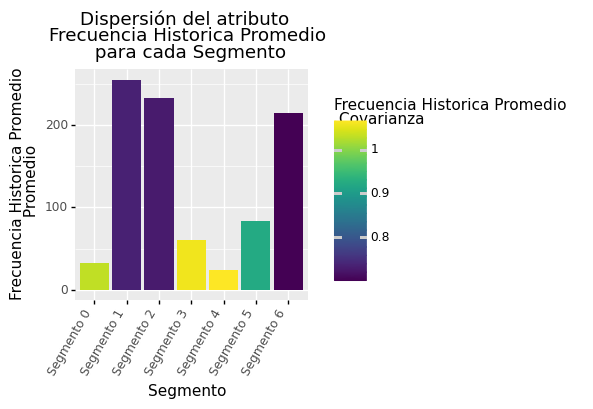

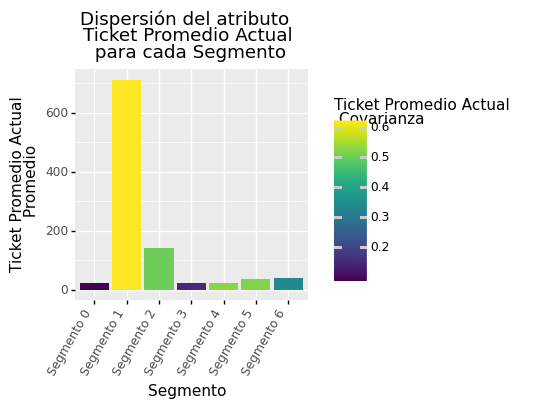

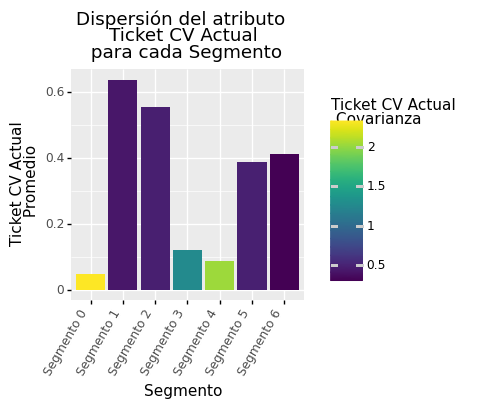

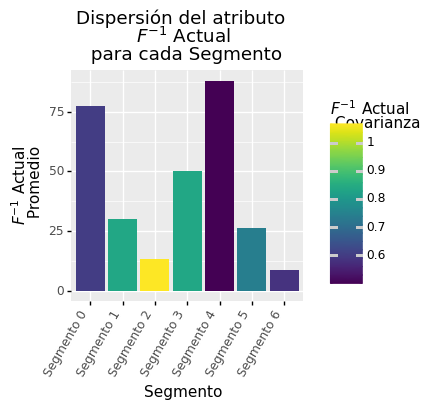

[<ggplot: (142418414282)>,
 <ggplot: (142418419655)>,
 <ggplot: (142418418622)>,
 <ggplot: (142418421110)>,
 <ggplot: (142418424131)>,
 <ggplot: (142418427329)>,
 <ggplot: (142418432145)>,
 <ggplot: (142418424986)>,
 <ggplot: (142418439566)>]

In [73]:
G_list_pdf

### SAVE

In [74]:
# ```python
#============================
# W_F y W_F con la dispersion de los clusters generados
#============================
file_name=('Mean_Atributos RFM_val')
    
# pngfill= Png_file_direct_Graphic_Canal_Material+"\\Cluster\\Val"
K_numbers=str(len(df_C_Customers.identified_clusters.unique()))
s_K_numbers='K_'+K_numbers
pngfill= Png_file_direct_Graphic_Canal_Material+"\\Cluster\\Val"#+"\\k_NUM\\"+s_K_numbers

start_time = time.time()
save_as_pdf_pages(
                  
                  G_list_pdf 
                    ,pngfill 
            +"\\"+ file_name + ".pdf")
time_convert(time.time()-start_time)
# ```

c:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\Cluster\Val\Mean_Atributos RFM_val.pdf


Time Lapsed = 0:0:2.0228381156921387 
 H:m:s


## Atributos Valoración 

# Graficos Presentación 

<!--  `rfm_clust_x=df_C_Customers.copy()` -->

>`df_C_fact`

>`df_C_Customers`

## Volumen de venta para cada mes de cada año
Se utiliza Data Full, por tanto posee todas las facturas resgristad para el producto 

### Procedimeitno % Del volumenm

#### Data a usar para grafico

In [75]:
#====================================================================================
# Ventas  de cada mes
#====================================================================================
# mes_in='Enero'
# ano_in=2019
df_i_Full=data_rfm.copy()
df_i=df_C_fact.copy()
#==========================================================
# Cacluclo la demnada total mensual en KG
#==========================================================

DF_Volumen_total=df_i_Full.groupby(['Año','Mes'],sort=True).sum()['Kilos Venta KG'].reset_index()
DF_Volumen_total=\
    DF_Volumen_total.rename(columns={'Kilos Venta KG':'Volumen Total KG'})
DF_Volumen_total.head()

Año        Mes  Volumen Total KG
0  2018      Abril            221184
1  2018     Agosto            258827
2  2018  Diciembre            295518
3  2018      Enero            213826
4  2018    Febrero            153430

In [76]:
#====================================================================================
# Ventas  de cada mes Segmentos
#====================================================================================

#-----------------------------------------------------------------------------------
# total
DF_Volumen_Cluster=df_i.groupby(['Año',
                                    'Mes','Segmento'],sort=True)\
        .sum()['Kilos Venta KG'].reset_index()

DF_Volumen_Cluster=\
    DF_Volumen_Cluster.rename(columns={'Kilos Venta KG':'Volumen de venta \n total del Segmento KG'})

DF_Volumen_Cluster=pd.merge(DF_Volumen_Cluster,DF_Volumen_total,how='left')

DF_Volumen_Cluster['Porcentaje de las ventas %']=DF_Volumen_Cluster.apply(lambda x: 
np.round((x['Volumen de venta \n total del Segmento KG'] / x['Volumen Total KG'])*100,2)
,axis=1)
DF_Volumen_Cluster['Mes_num']=DF_Volumen_Cluster.Mes.apply(lambda x: Month_NUM_dic[x]).astype('int64')
DF_Volumen_Cluster['Demanda en Toneladas']=\
DF_Volumen_Cluster['Volumen de venta \n total del Segmento KG']\
    .apply(lambda x: x*(10**-3))


DF_Volumen_Cluster.head()


#-----------------------------------------------------------------------------------
#General sin contar los años, 
# es el promedio de los años
Mean_DF_Volumen_Cluster=DF_Volumen_Cluster.groupby([ 'Mes','Segmento']).mean().reset_index()
Mean_DF_Volumen_Cluster.Mes_num\
            =Mean_DF_Volumen_Cluster.Mes_num.astype('int64')

Mean_DF_Volumen_Cluster['Demanda en Toneladas']=\
Mean_DF_Volumen_Cluster['Volumen de venta \n total del Segmento KG']\
    .apply(lambda x: x*(10**-3))
Mean_DF_Volumen_Cluster.head()

Mes    Segmento  Volumen de venta \n total del Segmento KG  \
0  Abril  Segmento 0                                    5566.50   
1  Abril  Segmento 1                                  123493.50   
2  Abril  Segmento 2                                  140662.25   
3  Abril  Segmento 3                                    7035.25   
4  Abril  Segmento 4                                    1959.50   

   Volumen Total KG  Porcentaje de las ventas %  Mes_num  Demanda en Toneladas  
0         399058.25                      1.1475        4               5.56650  
1         399058.25                     32.3300        4             123.49350  
2         399058.25                     34.4975        4             140.66225  
3         399058.25                      1.6025        4               7.03525  
4         399058.25                      0.3925        4               1.95950

#### Grafico

In [77]:
DF_Volumen_Cluster.head()

Año    Mes    Segmento  Volumen de venta \n total del Segmento KG  \
0  2018  Abril  Segmento 0                                        638   
1  2018  Abril  Segmento 1                                      73024   
2  2018  Abril  Segmento 2                                      73366   
3  2018  Abril  Segmento 3                                       2924   
4  2018  Abril  Segmento 4                                         22   

   Volumen Total KG  Porcentaje de las ventas %  Mes_num  Demanda en Toneladas  
0          221184.0                        0.29        4                 0.638  
1          221184.0                       33.02        4                73.024  
2          221184.0                       33.17        4                73.366  
3          221184.0                        1.32        4                 2.924  
4          221184.0                        0.01        4                 0.022

c:\Users\user\anaconda3\lib\site-packages\plotnine\geoms\geom_path.py:75: PlotnineWarning: geom_path: Removed 2 rows containing missing values.
c:\Users\user\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 14 rows containing missing values.


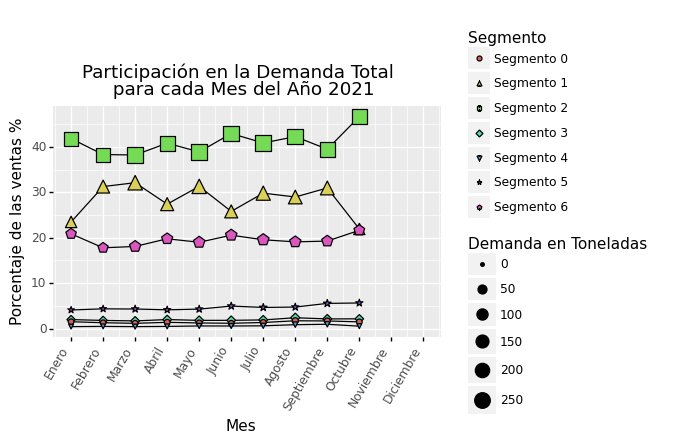

<ggplot: (142410073495)>

In [78]:
X_brak=[i for i in range(1,13)]
X_brak_S=[Mes_name(i) for i in range(1,13)]
Año_G='2021'
# Graph_Demanda_Cluster=list()

# Graph_Demanda_Cluster.append
(
    ggplot(     
            # Mean_DF_Volumen_Cluster
            DF_Volumen_Cluster[DF_Volumen_Cluster.Año==Año_G]
                        ,aes(x='Mes_num',
                            y='Porcentaje de las ventas %'
                            # 'Volumen de venta \n total del Segmento KG'
                            ,fill='Segmento'
                    ))\
                
                + geom_line( aes(shape='Segmento'
                                    # ,color='Segmento'
                                    # ,size='Demanda en Toneladas')
                                ))
                
                + geom_point( aes(shape='Segmento'
                    ,size='Demanda en Toneladas')
                    )
                    # 'Volumen de venta \n total del Segmento KG'
                                # Porcentaje promedio de \n   las ventas del mes [%]'
                 
                 #aes(color='Cluster de Clientes'))\
                + labs(#y='',
                        x='Mes')\
                +ggtitle(
                    ('Participación en la Demanda Total'+
                    ' \n para cada Mes del Año '+ Año_G)
                    # ('Peso Promedio de los Clusters de Clientes'+' \n Para Cada Mes')
                    )\

                +theme(axis_text_x = element_text(angle=60, hjust=1)
                       ,figure_size=(5,3))
                 + scale_x_continuous(breaks=X_brak,labels=X_brak_S)
    )
# Graph_Demanda_Cluster

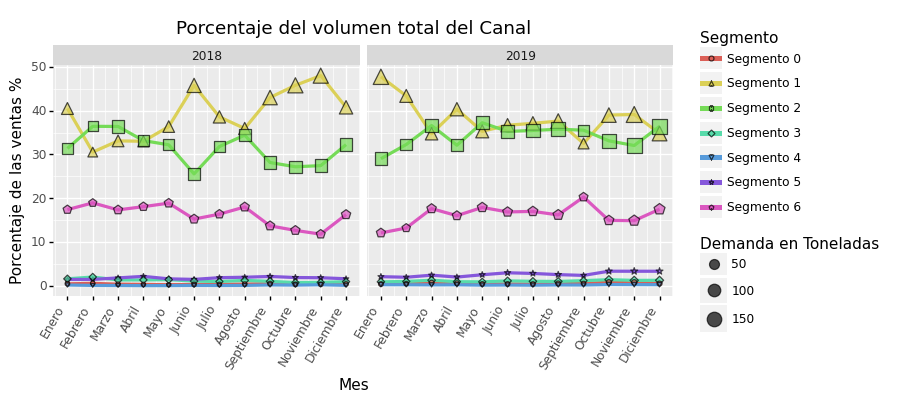

[<ggplot: (142417620453)>]

In [79]:
#inicia listado con puntos
X_brak=[i for i in range(1,13)]
X_brak_S=[Mes_name(i) for i in range(1,13)]
Año_G='2021'
Graph_Demanda_Cluster=list()

Graph_Demanda_Cluster.append(
    ggplot(     
            # Mean_DF_Volumen_Cluster
            DF_Volumen_Cluster[
                (DF_Volumen_Cluster.Año=='2018')|
                (DF_Volumen_Cluster.Año=='2019')
                ]
                        ,aes(x='Mes_num',
                            y='Porcentaje de las ventas %'
                            # 'Volumen de venta \n total del Segmento KG'
                            ,fill='Segmento'
                    ))\
                # + facet_grid()
                +facet_grid('.~Año')

                + geom_line( aes(shape='Segmento'
                                    ,color='Segmento'
                                    # ,size='Demanda en Toneladas')
                                )
                                ,size=1.3
                                )
                
                + geom_point( aes(shape='Segmento'
                    ,size='Demanda en Toneladas')
                    ,alpha=0.7
                    )
                    # 'Volumen de venta \n total del Segmento KG'
                                # Porcentaje promedio de \n   las ventas del mes [%]'
                 
                 #aes(color='Cluster de Clientes'))\
                + labs(#y='',
                        x='Mes')\
                +ggtitle('Porcentaje del volumen total del Canal')
                #     ('Participación en la Demanda Total'+
                #     ' \n para cada Mes de cada año'
                #     )
                    # ('Peso Promedio de los Clusters de Clientes'+' \n Para Cada Mes')
                    # )\

                +theme(axis_text_x = element_text(angle=60, hjust=1)
                       ,figure_size=(8,3))
                 + scale_x_continuous(breaks=X_brak,labels=X_brak_S)
    )
Graph_Demanda_Cluster

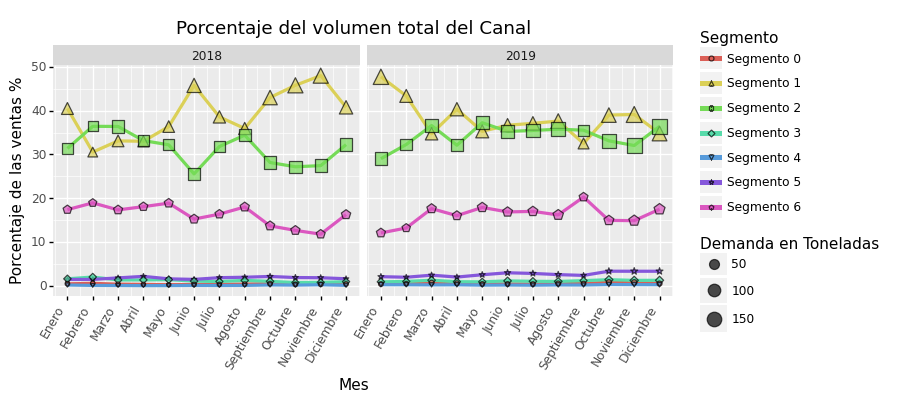

c:\Users\user\anaconda3\lib\site-packages\plotnine\geoms\geom_path.py:75: PlotnineWarning: geom_path: Removed 2 rows containing missing values.
c:\Users\user\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 14 rows containing missing values.


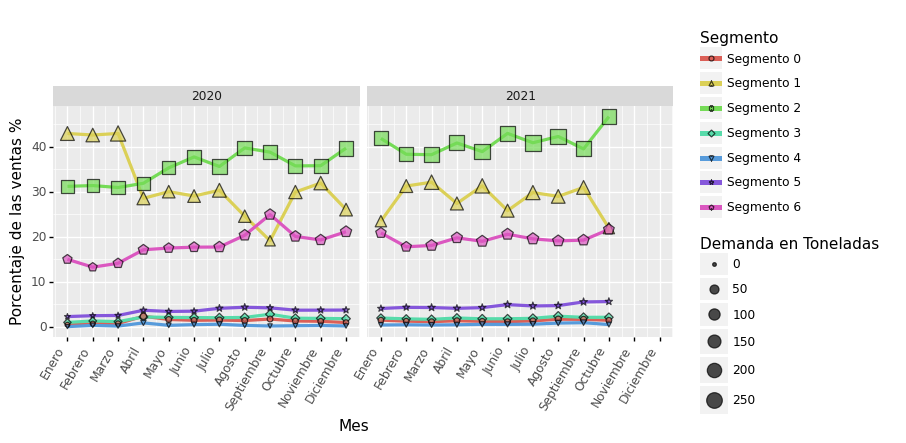

[<ggplot: (142417620453)>, <ggplot: (142422358495)>]

In [80]:
X_brak=[i for i in range(1,13)]
X_brak_S=[Mes_name(i) for i in range(1,13)]
Año_G='2021'
# Graph_Demanda_Cluster=list()

Graph_Demanda_Cluster.append(
    ggplot(     
            # Mean_DF_Volumen_Cluster
            DF_Volumen_Cluster[
                (DF_Volumen_Cluster.Año=='2020')|
                (DF_Volumen_Cluster.Año=='2021')
                ]
                        ,aes(x='Mes_num',
                            y='Porcentaje de las ventas %'
                            # 'Volumen de venta \n total del Segmento KG'
                            ,fill='Segmento'
                    ))\
                # + facet_grid()
                +facet_grid('.~Año')
                + geom_line( aes(shape='Segmento'
                                    ,color='Segmento'
                                    # ,size='Demanda en Toneladas')
                                ),size=1.3)
                
                + geom_point( aes(shape='Segmento'
                    ,size='Demanda en Toneladas')
                    ,alpha=0.7
                    )
                    # 'Volumen de venta \n total del Segmento KG'
                                # Porcentaje promedio de \n   las ventas del mes [%]'
                 
                 #aes(color='Cluster de Clientes'))\
                + labs(#y='',
                        x='Mes')\
                # +ggtitle(
                #     ('Participación en la Demanda Total'+
                #     ' \n para cada Mes de cada año'
                #     ))\
                    # ('Peso Promedio de los Clusters de Clientes'+' \n Para Cada Mes')
                    

                +theme(axis_text_x = element_text(angle=60, hjust=1)
                       ,figure_size=(8,3))
                 + scale_x_continuous(breaks=X_brak,labels=X_brak_S)
    )
Graph_Demanda_Cluster

### Grafico Columnas como porcentaje de demanda

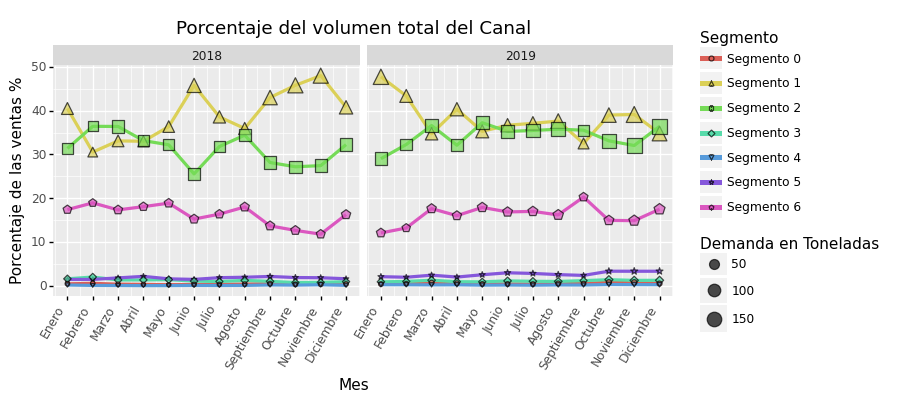

c:\Users\user\anaconda3\lib\site-packages\plotnine\geoms\geom_path.py:75: PlotnineWarning: geom_path: Removed 2 rows containing missing values.
c:\Users\user\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 14 rows containing missing values.


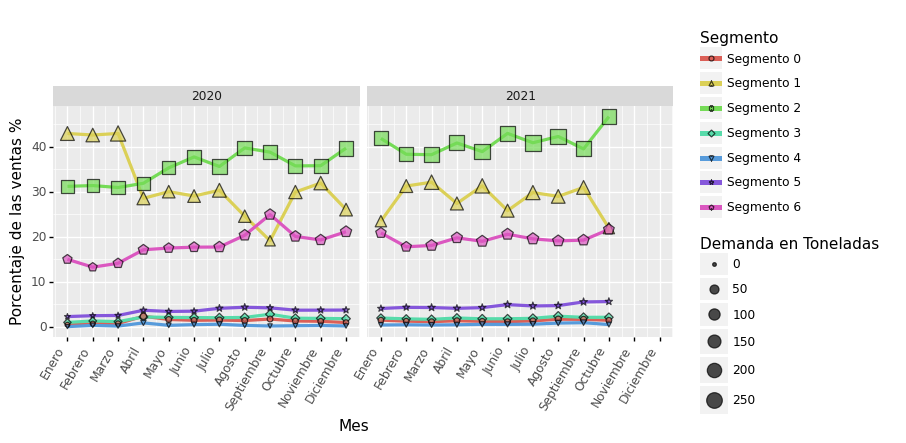

c:\Users\user\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_col : Removed 14 rows containing missing values.


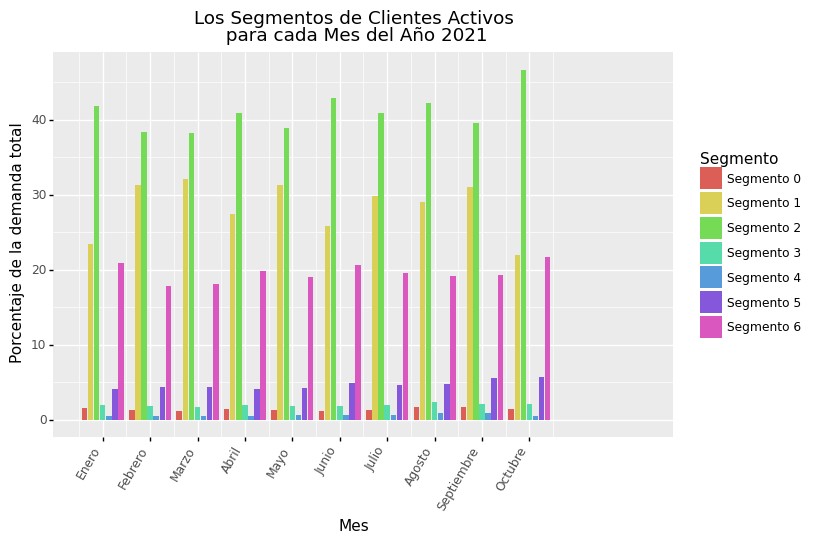

[<ggplot: (142417620453)>, <ggplot: (142422358495)>, <ggplot: (142417611704)>]

In [81]:
X_brak=[i for i in range(1,11)]
X_brak_S=[Mes_name(i) for i in range(1,11)]
# Año_G='2021'
Graph_Demanda_Cluster.append(
    ggplot(     
            # Mean_DF_Volumen_Cluster
            DF_Volumen_Cluster[DF_Volumen_Cluster.Año==Año_G]
                        ,aes(x='Mes_num',
                            y='Porcentaje de las ventas %'
                            # 'Volumen de venta \n total del Segmento KG'
                            ,fill='Segmento'
                    ))\
                +geom_col(position = "dodge2")
                    # position = position_dodge2(preserve = "single") )
                + labs(y='Porcentaje de la demanda total',
                        x='Mes')\
                +ggtitle(( #'Incluencia en la demanda de '
                            'Los Segmentos de Clientes Activos'
                            +'\n para cada Mes del Año '+ Año_G ))\

                +theme(axis_text_x = element_text(angle=60, hjust=1)
                       ,figure_size=(8,5))
                 + scale_x_continuous(breaks=X_brak,labels=X_brak_S)
    )
Graph_Demanda_Cluster

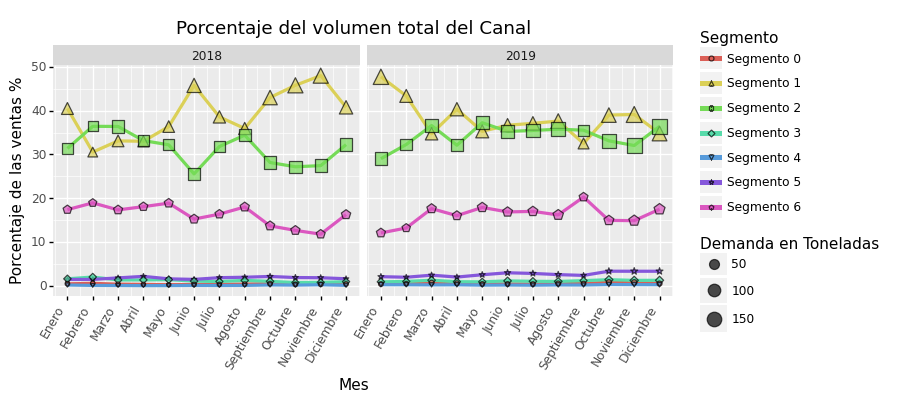

c:\Users\user\anaconda3\lib\site-packages\plotnine\geoms\geom_path.py:75: PlotnineWarning: geom_path: Removed 2 rows containing missing values.
c:\Users\user\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 14 rows containing missing values.


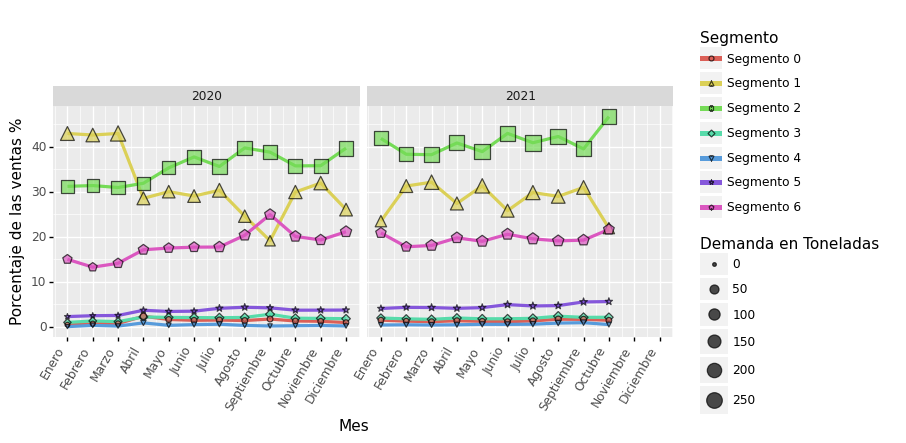

c:\Users\user\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_col : Removed 14 rows containing missing values.


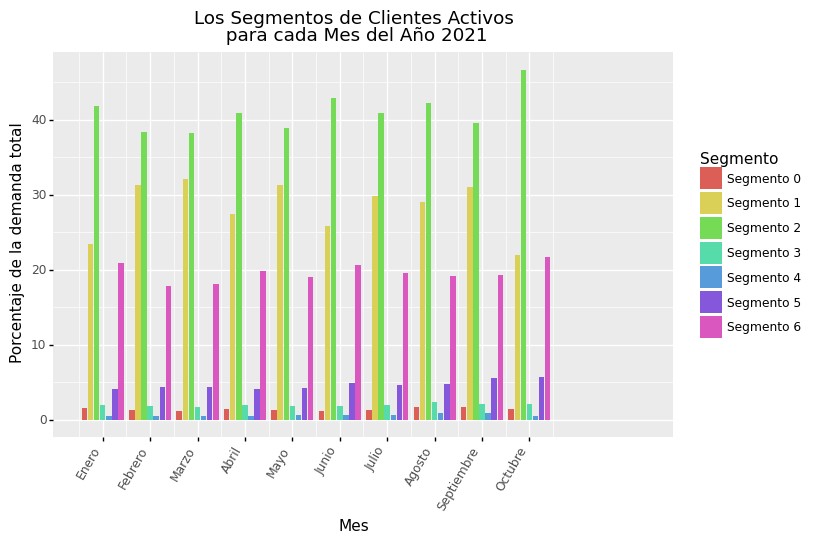

c:\Users\user\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_col : Removed 14 rows containing missing values.


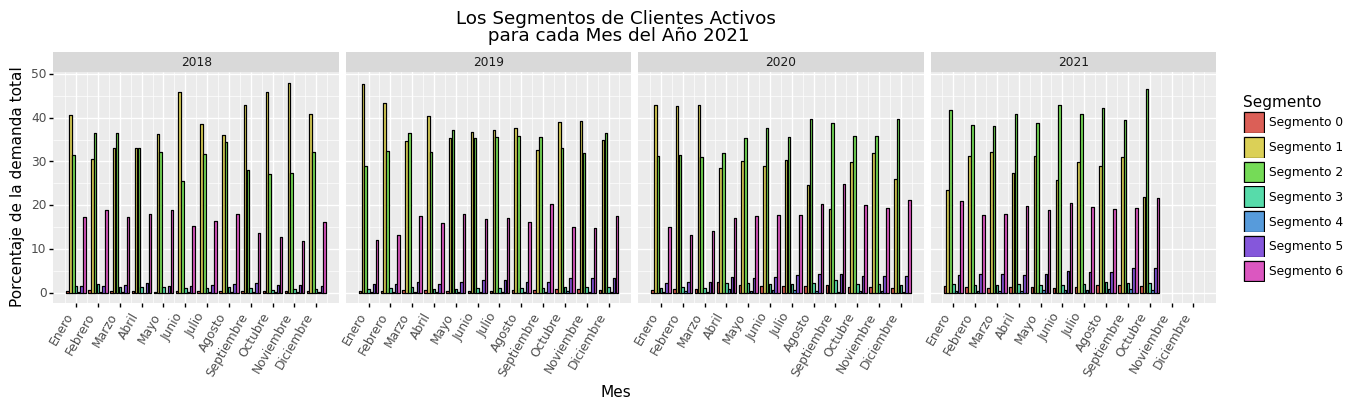

[<ggplot: (142417620453)>,
 <ggplot: (142422358495)>,
 <ggplot: (142417611704)>,
 <ggplot: (142409925476)>]

In [82]:
X_brak=[i for i in range(1,13)]
X_brak_S=[Mes_name(i) for i in range(1,13)]
# Año_G='2021'
Graph_Demanda_Cluster.append(
    ggplot(     
            # Mean_DF_Volumen_Cluster
            DF_Volumen_Cluster
                        ,aes(x='Mes_num',
                            y='Porcentaje de las ventas %'
                            # 'Volumen de venta \n total del Segmento KG'
                            ,fill='Segmento'
                    ))\
                +facet_grid('.~Año')
                +geom_col(color='black',position = "dodge2")
                    # position = position_dodge2(preserve = "single") )
                + labs(y='Porcentaje de la demanda total',
                        x='Mes')\
                +ggtitle(( #'Incluencia en la demanda de '
                            'Los Segmentos de Clientes Activos'
                            +'\n para cada Mes del Año '+ Año_G ))\

                +theme(axis_text_x = element_text(angle=60, hjust=1)
                       ,figure_size=(15,3))
                 + scale_x_continuous(breaks=X_brak,labels=X_brak_S)
    )
Graph_Demanda_Cluster

### SAVE

In [83]:
# ```python
#============================
# W_F y W_F con la dispersion de los clusters generados
#============================
file_name=('Demanda en Ton clientes activos Mes Cluster RFM_val')
    
# pngfill= Png_file_direct_Graphic_Canal_Material+"\\Cluster\\Val"
K_numbers=str(len(df_C_Customers.identified_clusters.unique()))
s_K_numbers='K_'+K_numbers
pngfill= Png_file_direct_Graphic_Canal_Material+"\\Cluster\\Val"#+"\\k_NUM\\"+s_K_numbers


start_time = time.time()
save_as_pdf_pages(
                  
                Graph_Demanda_Cluster
                  
                    ,pngfill 
            +"\\"+ file_name + ".pdf")
time_convert(time.time()-start_time)
# ```

c:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\Cluster\Val\Demanda en Ton clientes activos Mes Cluster RFM_val.pdf
c:\Users\user\anaconda3\lib\site-packages\plotnine\geoms\geom_path.py:75: PlotnineWarning: geom_path: Removed 2 rows containing missing values.
c:\Users\user\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 14 rows containing missing values.
c:\Users\user\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_col : Removed 14 rows containing missing values.
c:\Users\user\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_col : Removed 14 rows containing missing values.


Time Lapsed = 0:0:2.8636012077331543 
 H:m:s


## Cantidad de clientes grafica
__Histograma__ 
Cantidad de clientes en cada Cluster activos Valor generico, descrictivo

### Cliente Activos Totales

Idealmente, se utilizaría datos sin filtrar, pero como no es el caso, eliminar parte de Clientes sin cluster


In [84]:
#===============================================
# Data a usar
# >`df_C_fact`
# >`df_C_Customers`

"""
Df para hacer un grafico de columnas, con el porcentaje
 de los clientes "Activos" que pertenece cada cluster de clientes.
"""
print(df_C_Customers.shape)

N_total_clientes=len(df_C_Customers.Cliente.unique())
N_total_clientes

dfx=df_C_Customers.groupby('Segmento').count()['Cliente'].reset_index()\
    .rename(columns={'Cliente':'Cantidad de clientes'})
dfx['Porcentaje de los clientes Activos']=\
    dfx['Cantidad de clientes'].apply(lambda z:
       str("%.0f" % round((  (z / N_total_clientes )*100  ),0 ) ) + ' %'
    )
dfx

(3222, 43)


Segmento  Cantidad de clientes Porcentaje de los clientes Activos
0  Segmento 0                   749                               23 %
1  Segmento 1                   126                                4 %
2  Segmento 2                   402                               12 %
3  Segmento 3                   545                               17 %
4  Segmento 4                   370                               11 %
5  Segmento 5                   450                               14 %
6  Segmento 6                   580                               18 %

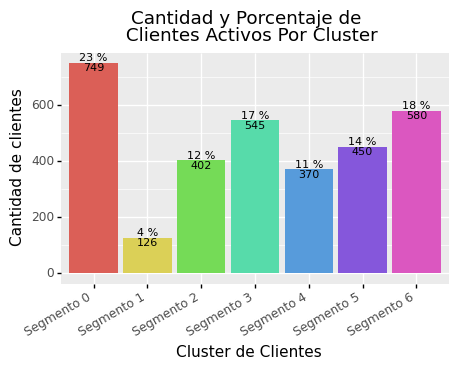

<ggplot: (142422276015)>

In [85]:
Gplot_cant=(
        ggplot(dfx, aes(x='Segmento',
                        y='Cantidad de clientes'
                        ,fill='Segmento'
                         ))\
                    #+ geom_point()\
                    + geom_col()\
                    
                    +ggtitle('Cantidad y Porcentaje de \n Clientes Activos'+' Por Cluster')\
                    +labs(x='Cluster de Clientes')
                   #+theme(axis_text_x = element_text(angle=90, hjust=1))\

        + geom_text(aes(label='Porcentaje de los clientes Activos'),   # new
         position=position_dodge(width=0.9),
         size=8, va='bottom')
            
        + geom_text(aes(label='Cantidad de clientes'),   # new
         position=position_dodge(width=0.9),
         size=8, va='top',ha='center',color='black')
        +theme(
                legend_position='none',
                axis_text_x = element_text(angle=30, hjust=1)
                       ,figure_size=(5,3))
   
            
            )
Gplot_cant

### SAVE

In [86]:
df_C_Customers
# ```python
#============================
# Cantidad de clientes por cluster
#============================
file_name=('Cantidad de cliente de cada Cluster RFM_Val')
K_numbers=str(len(df_C_Customers.identified_clusters.unique()))
s_K_numbers='K_'+K_numbers
pngfill= Png_file_direct_Graphic_Canal_Material+"\\Cluster\\Val"#+"\\k_NUM\\"+s_K_numbers

start_time = time.time()
save_as_pdf_pages(
                  
                  [Gplot_cant]
                    ,pngfill 
            +"\\"+ file_name + ".pdf")
time_convert(time.time()-start_time)
# ```

c:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\Cluster\Val\Cantidad de cliente de cada Cluster RFM_Val.pdf


Time Lapsed = 0:0:0.4844398498535156 
 H:m:s


## Incorporación mensual durante el año 2021

__GRafico de Puntos__ muestra la incorporación de los clientes a lo largo del tiempo

### Data FRame a usar

In [87]:
df_C_fact[df_C_fact.Año=='2021']\
    .groupby(['Segmento','Mes','Cliente']).count().reset_index()\
    .head()
    # .groupby(['Segmento','Mes'])\
    # .count()

Segmento    Mes   Cliente  Fecha ultima Compra  Recency Actual  \
0  Segmento 0  Abril  10007508                    0               0   
1  Segmento 0  Abril  10017269                    0               0   
2  Segmento 0  Abril  10023880                    0               0   
3  Segmento 0  Abril  10028999                    1               1   
4  Segmento 0  Abril  10032204                    0               0   

   Fecha Creacion  Frecuency Actual del Cliente  Kilos Venta KG Promedio  \
0               0                             0                        0   
1               0                             0                        0   
2               0                             0                        0   
3               1                             1                        1   
4               0                             0                        0   

   Precio Promedio  Año Creación Promedio  ...  Categoría Cliente  \
0                0                      0  ...                  0   
1                0                      0  ...                  0   
2                0                      0  ...                  0   
3                1                      1  ...                  1   
4                0                      0  ...                  0   

   Año Creación  Material Favorito  Frecuencia Historica  Mes_num  Recency  \
0             0                  0                     0        0        0   
1             0                  0                     0        0        0   
2             0                  0                     0        0        0   
3             1                  1                     1        1        1   
4             0                  0                     0        0        0   

   Frecuency_Row  Ingreso de Venta CLP  Monetary  Recency días  
0              0                     0         0             0  
1              0                     0         0             0  
2              0                     0         0             0  
3              1                     1         1             1  
4              0                     0         0             0  

[5 rows x 54 columns]

In [88]:

df_total_clientes=df_C_Customers.groupby('Segmento')\
    .count()['Cliente'].reset_index()\
        .rename(columns={'Cliente':'Total de clientes'})\
            

df_total_clientes

Segmento  Total de clientes
0  Segmento 0                749
1  Segmento 1                126
2  Segmento 2                402
3  Segmento 3                545
4  Segmento 4                370
5  Segmento 5                450
6  Segmento 6                580

In [89]:
#===============================================
# Data a usar
# >`df_C_fact`
# >`df_C_Customers`

"""
Df para hacer un grafico de columnas, con el porcentaje
 de los clientes "Activos" que pertenece cada cluster de clientes.
"""
print(df_C_Customers.shape)

df_total_clientes_Seg=df_C_Customers.groupby('Segmento')\
    .count()#.Cliente.unique())
df_total_clientes


# [df_C_fact.Año=='2021']
Cluster_df_vol=df_C_fact\
    .groupby(['Segmento','Mes','Cliente','Año']).count()\
        .reset_index()
Cluster_df_vol=Cluster_df_vol\
    [Cluster_df_vol['Recency Actual']>0]    

Cluster_df_vol=Cluster_df_vol.groupby(['Segmento','Año','Mes'])\
    .count()['Cliente'].reset_index()\
    .rename(columns={'Cliente':'Cantidad de clientes'})

Cluster_df_vol['Mes_num']=\
        Cluster_df_vol.Mes.apply(lambda x: Month_NUM_dic[x])

#---------------------------------------------------------
Cluster_df_vol=\
    pd.merge(Cluster_df_vol,
    df_total_clientes
    ,how='left')
Cluster_df_vol['Porcentaje de los clientes Activos']=\
    Cluster_df_vol.apply(lambda z:
       np.round(( 
           (z['Cantidad de clientes'] /z['Total de clientes']\
            )*100  ),0 ) 
    ,axis=1)


Cluster_df_vol.head()

(3222, 43)


Segmento   Año        Mes  Cantidad de clientes  Mes_num  \
0  Segmento 0  2018      Abril                    23        4   
1  Segmento 0  2018     Agosto                    32        8   
2  Segmento 0  2018  Diciembre                    38       12   
3  Segmento 0  2018      Enero                    33        1   
4  Segmento 0  2018    Febrero                    31        2   

   Total de clientes  Porcentaje de los clientes Activos  
0                749                                 3.0  
1                749                                 4.0  
2                749                                 5.0  
3                749                                 4.0  
4                749                                 4.0

In [90]:
#===============================================
# Data a usar
# >`df_C_fact`
# >`df_C_Customers`

"""
Df para hacer un grafico de columnas, con el porcentaje
 de los clientes "Activos" que pertenece cada cluster de clientes.
"""
# [df_C_fact.Año=='2021']
Cluster_df_Val=df_C_fact.groupby(['Segmento','Año','Mes'])\
    .mean().reset_index()\
    .rename(columns={'Precio':'Precio Promedio'
                         })

# print(Cluster_df_Val.columns)
Cluster_df_vol=\
    pd.merge(Cluster_df_vol,
    Cluster_df_Val[['Segmento', 'Mes','Precio Promedio']]
    ,how='left')

Cluster_df_vol=Cluster_df_vol[Cluster_df_vol['Cantidad de clientes']>0 ]

Cluster_df_vol.dtypes

Segmento                              category
Año                                     object
Mes                                     object
Cantidad de clientes                     int64
Mes_num                                  int64
Total de clientes                        int64
Porcentaje de los clientes Activos     float64
Precio Promedio                        float64
Precio Promedio                        float64
dtype: object

### Grafico cantidad de clientes Mensual (No usado)

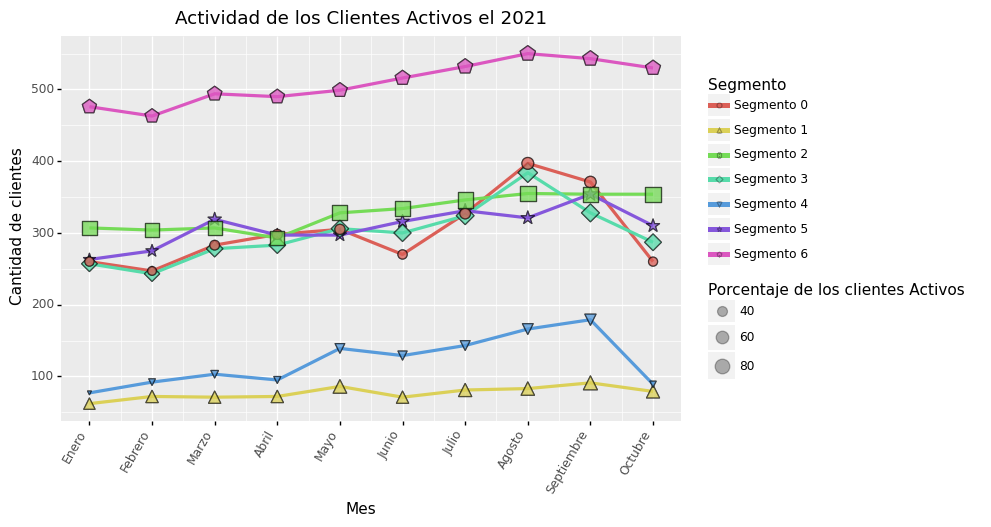

<ggplot: (142423221881)>

In [91]:
X_brak=[i for i in range(1,13)]
X_brak_S=[Mes_name(i) for i in range(1,13)]
Año_G='2021'
GRaph_Disp_cluster=(
    ggplot(Cluster_df_vol\
    [Cluster_df_vol.Año==Año_G]
    , aes(x='Mes_num',
                               y= 'Cantidad de clientes'
                               ,fill='Segmento'
                            # 'Precio Promedio'
                               ))\
                + labs(
                # y='Disposición a pagar',
                x='Mes')

                + geom_line(aes(shape='Segmento'
                     ,color='Segmento'
                     )
                     ,size=1.3
                     )

                + geom_point(aes(
                    shape='Segmento'
                    ,size='Porcentaje de los clientes Activos'
                    # ,color='Segmento'
                    # 'Precio Promedio'
                      )
                      ,alpha=0.3
                      )\

                +ggtitle('Actividad de los Clientes Activos el 2021')
                #    ('Cantidad de Clientes del Clusters '+
                        #  ' \n que Compran en Cada Mes')
                +theme(axis_text_x = element_text(angle=60, hjust=1)
                       ,figure_size=(8,5))
                 + scale_x_continuous(breaks=X_brak,labels=X_brak_S)
    )
GRaph_Disp_cluster

### Porcentaje de los clientes de cada segmento activo
(Usado)

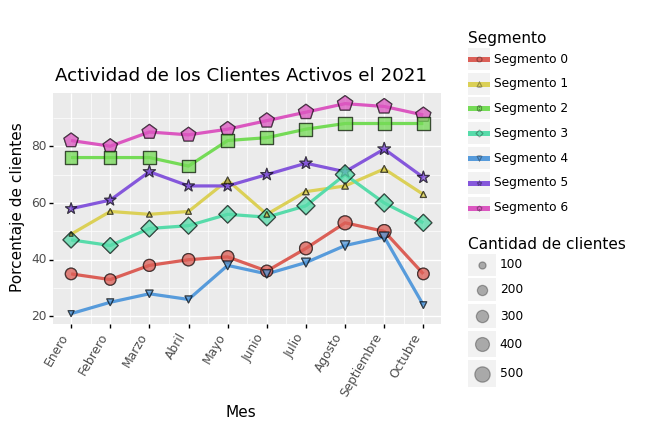

[<ggplot: (142424206538)>]

In [92]:
#Grarafica inicial precios
X_brak=[i for i in range(1,13)]
X_brak_S=[Mes_name(i) for i in range(1,13)]

X_G='Mes_num'
X_label='Mes'
Y_G='Porcentaje de los clientes Activos'
Y_label='Porcentaje de clientes'

Fill_G='Segmento'
Color_G='Segmento'
Shape_G='Segmento'
Size_G='Cantidad de clientes'
Año_G='2021'
GRaph_Actv_Cluster=list()
GRaph_Actv_Cluster.append(
    ggplot(Cluster_df_vol\
    [Cluster_df_vol.Año==Año_G]
    , aes(x=X_G,
                               y= Y_G
                            #    'Cantidad de clientes'
                               ,fill=Fill_G
                            # 'Precio Promedio'
                               ))\
                + labs(
                    y= Y_label,
                x=X_label)\

                + geom_line(aes(shape=Shape_G
                     ,color=Color_G
                     )
                     ,size=1.3
                     )\

                + geom_point(aes(
                    shape=Shape_G
                    ,size=Size_G
                    # ,color='Segmento'
                    # 'Precio Promedio'
                      )
                      ,alpha=0.3
                      )\

                +ggtitle('Actividad de los Clientes Activos el 2021')
                    # ('Peso Promedio de los Clusters de Clientes'+
                        #   ' \n Para Cada Semana'))\
                +theme(axis_text_x = element_text(angle=60, hjust=1)
                       ,figure_size=(5,3))
                 + scale_x_continuous(breaks=X_brak,labels=X_brak_S)
    )
GRaph_Actv_Cluster

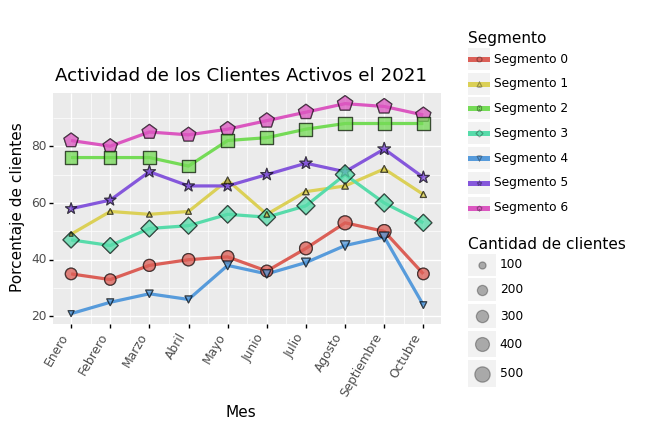

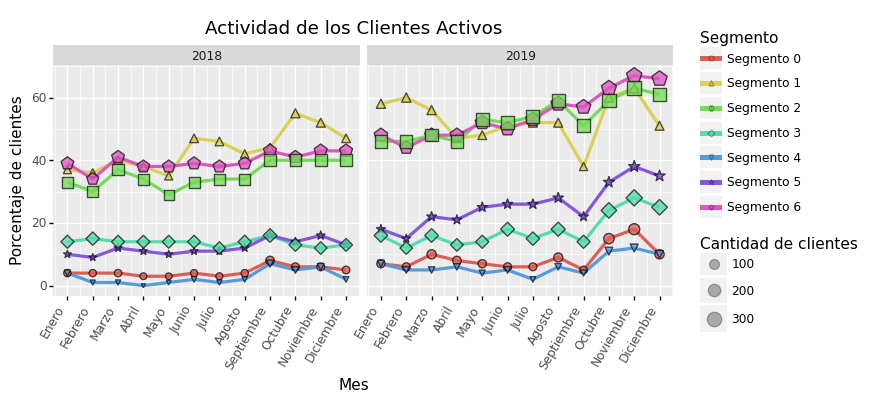

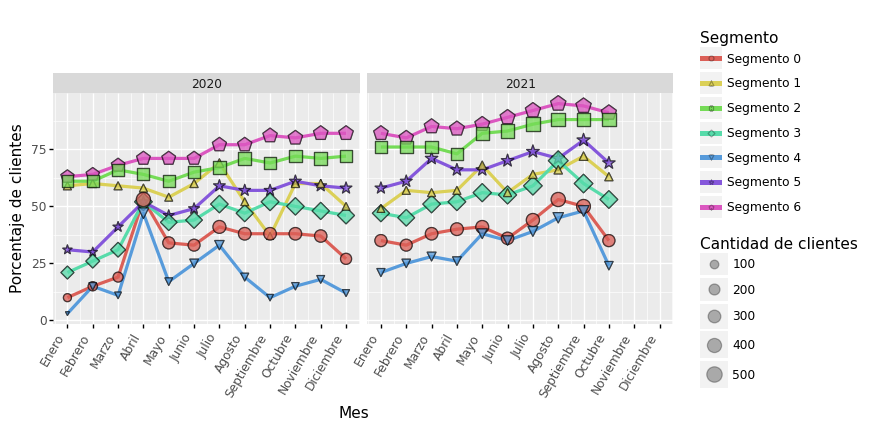

[<ggplot: (142424206538)>, <ggplot: (142417789712)>, <ggplot: (142410002065)>]

In [93]:
# Listado de graficos, con los diferentes años
X_brak=[i for i in range(1,13)]
X_brak_S=[Mes_name(i) for i in range(1,13)]

X_G='Mes_num'
X_label='Mes'
Y_G='Porcentaje de los clientes Activos'
Y_label='Porcentaje de clientes'

Fill_G='Segmento'
Color_G='Segmento'
Shape_G='Segmento'
Size_G='Cantidad de clientes'
Tupla_theme=(8,3)

GRaph_Actv_Cluster.append(
    ggplot(Cluster_df_vol\
        [(Cluster_df_vol.Año=='2018')
        |(Cluster_df_vol.Año=='2019')
        ]
        , aes(x=X_G,
                               y= Y_G
                            #    'Cantidad de clientes'
                               ,fill=Fill_G
                            # 'Precio Promedio'
                               ))\
                +facet_grid('.~Año')
                + labs(
                    y= Y_label,
                x=X_label)\

            + geom_line(aes(shape=Shape_G
                     ,color=Color_G
                     )
                     ,size=1.3
                     )\

                + geom_point(aes(
                    shape=Shape_G
                    ,size=Size_G
                    # ,color='Segmento'
                    # 'Precio Promedio'
                      )
                      ,alpha=0.3
                      )\

                +ggtitle('Actividad de los Clientes Activos')
                    # ('Peso Promedio de los Clusters de Clientes'+
                        #   ' \n Para Cada Semana'))\
                +theme(axis_text_x = element_text(angle=60, hjust=1)
                       ,figure_size=Tupla_theme)
                       #(8,3)
                 + scale_x_continuous(breaks=X_brak,labels=X_brak_S)
    )
GRaph_Actv_Cluster.append(
    ggplot(Cluster_df_vol\
        [(Cluster_df_vol.Año=='2020')
        |(Cluster_df_vol.Año=='2021')
        ]
        , aes(x=X_G,
                               y= Y_G
                            #    'Cantidad de clientes'
                               ,fill=Fill_G
                            # 'Precio Promedio'
                               ))\
                +facet_grid('.~Año')
                
                + labs(
                    y= Y_label,
                x=X_label)\
                
            + geom_line(aes(shape=Shape_G
                     ,color=Color_G
                     )
                        ,size=1.3
                     )\

                + geom_point(aes(
                    shape=Shape_G
                    ,size=Size_G
                    # ,color='Segmento'
                    # 'Precio Promedio'
                      )
                      ,alpha=0.3
                      )\

                # +ggtitle('Actividad de los Clientes Activos el 2021')
                    # ('Peso Promedio de los Clusters de Clientes'+
                        #   ' \n Para Cada Semana'))\
                +theme(axis_text_x = element_text(angle=60, hjust=1)
                       ,figure_size=Tupla_theme)
                 + scale_x_continuous(breaks=X_brak,labels=X_brak_S)
    )

GRaph_Actv_Cluster

### SAVE

In [94]:
# ```python
#============================
# W_F y W_F con la dispersion de los clusters generados
#============================
file_name=('Porcentaje de clientes activos Mes Cluster RFM_val')
    
# pngfill= Png_file_direct_Graphic_Canal_Material+"\\Cluster\\Val"
K_numbers=str(len(df_C_Customers.identified_clusters.unique()))
s_K_numbers='K_'+K_numbers
pngfill= Png_file_direct_Graphic_Canal_Material+"\\Cluster\\Val"#+"\\k_NUM\\"+s_K_numbers

start_time = time.time()
save_as_pdf_pages(
                  
                   GRaph_Actv_Cluster 
                    ,pngfill 
            +"\\"+ file_name + ".pdf")
time_convert(time.time()-start_time)
# ```

c:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\Cluster\Val\Porcentaje de clientes activos Mes Cluster RFM_val.pdf


Time Lapsed = 0:0:2.0008177757263184 
 H:m:s


## Precio promedio ponderado

### Data 
data complementaria a la anterior

In [95]:
#===============================================
# Data a usar
# >`df_C_fact`
# >`df_C_Customers`

"""
Df para hacer un grafico de columnas, con el porcentaje
 de los clientes "Activos" que pertenece cada cluster de clientes.
"""
df_fac_copy=df_C_fact.copy()#[df_C_fact.Año=='2021']
df_fac_copy['Ingreso_Venta']=df_fac_copy.apply(lambda x:
x.Precio*x['Kilos Venta KG']
,axis=1)
Cluster_df_Val_Pond=df_fac_copy\
    .groupby(['Segmento','Año','Mes'])\
    .sum().reset_index()\
    .rename(columns={'Kilos Venta KG':'Kilos Venta KG Totales'
                        ,'Ingreso_Venta':'Ingreso de Venta Total'
    })

# print(Cluster_df_Val.columns)
# Cluster_df_vol=\
#     pd.merge(Cluster_df_vol,
#     Cluster_df_Val[['Segmento', 'Mes','Precio Promedio']]
#     ,how='left')
# Cluster_df_vol.dtypes
print(len(Cluster_df_Val_Pond.columns))
Cluster_df_Val_Pond['Precio promedio ponderado']=\
    Cluster_df_Val_Pond['Ingreso de Venta Total']\
        /Cluster_df_Val_Pond['Kilos Venta KG Totales']

Cluster_df_Val_Pond['Toneladas de Demanda']=\
    Cluster_df_Val_Pond['Kilos Venta KG Totales'].apply(lambda x: 
                int(x/10**3)
    )

Cluster_df_Val_Pond[['Segmento','Año','Mes']
                    +['Kilos Venta KG Totales']
                    +['Ingreso de Venta Total']
                    +['Precio promedio ponderado']
                    +['Toneladas de Demanda']
                    ].head()

35


Segmento   Año        Mes  Kilos Venta KG Totales  \
0  Segmento 0  2018      Abril                     638   
1  Segmento 0  2018     Agosto                     923   
2  Segmento 0  2018  Diciembre                    1144   
3  Segmento 0  2018      Enero                     902   
4  Segmento 0  2018    Febrero                     814   

   Ingreso de Venta Total  Precio promedio ponderado  Toneladas de Demanda  
0                  785224                1230.758621                     0  
1                 1156478                1252.955580                     0  
2                 1406900                1229.807692                     1  
3                 1060400                1175.609756                     0  
4                 1069574                1313.972973                     0

### Grafico

#### Grafico 2021

c:\Users\user\anaconda3\lib\site-packages\plotnine\geoms\geom_path.py:75: PlotnineWarning: geom_path: Removed 2 rows containing missing values.
c:\Users\user\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 14 rows containing missing values.


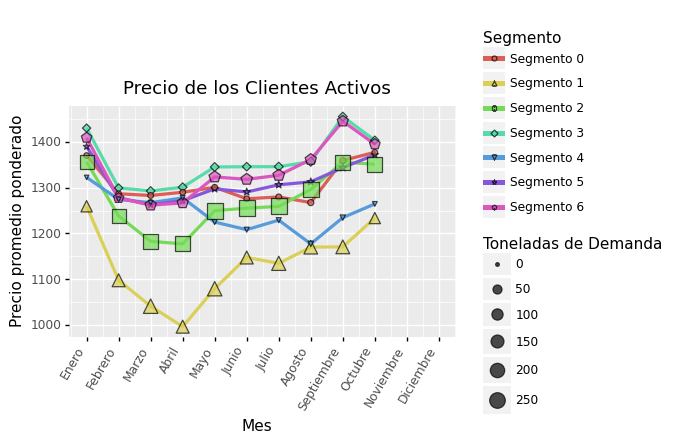

[<ggplot: (142417634771)>]

In [96]:
X_brak=[i for i in range(1,13)]
X_brak_S=[Mes_name(i) for i in range(1,13)]

df_G=pd.merge(
    Cluster_df_Val,
    Cluster_df_Val_Pond[['Segmento','Año','Mes']
                    +['Kilos Venta KG Totales']
                    +['Ingreso de Venta Total']
                    +['Precio promedio ponderado']
                    +['Toneladas de Demanda']
                    ]
,how='left')

df_G['Mes_num']=\
        df_G.Mes.apply(lambda x: Month_NUM_dic[x])

X_G='Mes_num'
Y_G='Precio promedio ponderado'
Fill_G='Segmento'
Color_G='Segmento'
Shape_G='Segmento'
Size_G= 'Toneladas de Demanda'
# 'Kilos Venta KG Totales'
Año_G='2021'
Graph_Precio_pond_cluster=[]
Graph_Precio_pond_cluster.append(
    ggplot(df_G\
        [df_G.Año==Año_G]
        , aes(x=X_G,
                               y= Y_G
                            #    'Cantidad de clientes'
                               ,fill=Fill_G
                            # 'Precio Promedio'
                               ))\
                + labs(x='Mes'
                # y='Disposición a pagar',
                )\

                 + geom_line(aes(shape=Shape_G
                     ,color=Color_G)
                     ,size=1.3
                     ) 

            + geom_point(aes(
                    shape=Shape_G
                    ,size=Size_G
                    # ,color='Segmento'
                    # 'Precio Promedio'
                      )
                      ,alpha=0.7
                      )

                +ggtitle('Precio de los Clientes Activos')
                    # # ('Peso Promedio de los Clusters de Clientes'+
                    # #   ' \n Para Cada Semana'))\
                +theme(axis_text_x = element_text(angle=60, hjust=1)
                       ,figure_size=(5,3))
                 + scale_x_continuous(breaks=X_brak,labels=X_brak_S)
    )
Graph_Precio_pond_cluster

#### Listado GRAFICOS para cada año

c:\Users\user\anaconda3\lib\site-packages\plotnine\geoms\geom_path.py:75: PlotnineWarning: geom_path: Removed 2 rows containing missing values.
c:\Users\user\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 14 rows containing missing values.


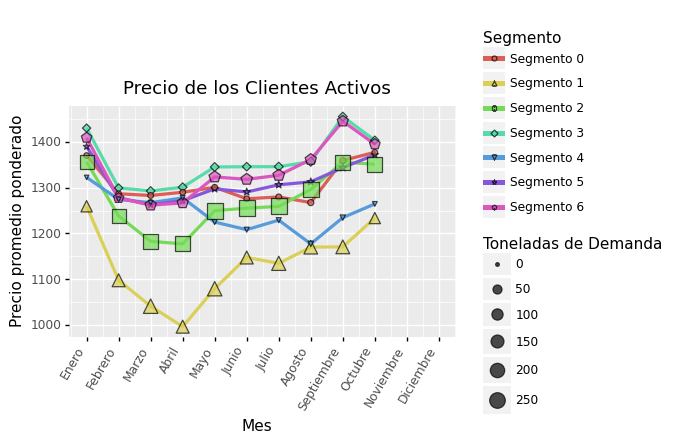

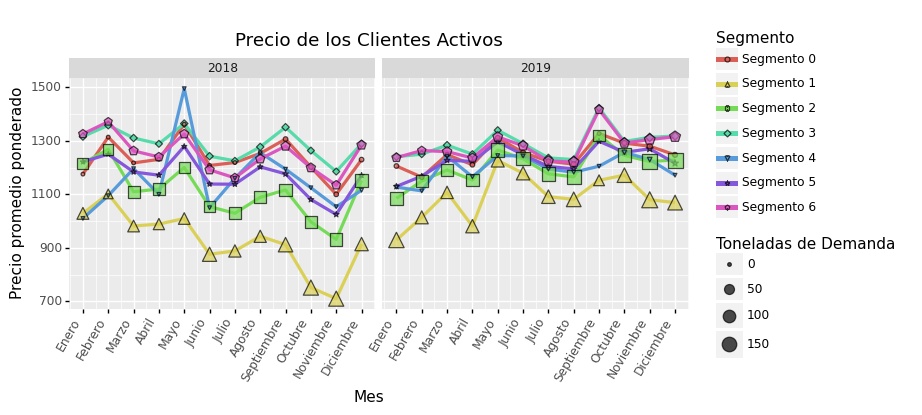

c:\Users\user\anaconda3\lib\site-packages\plotnine\geoms\geom_path.py:75: PlotnineWarning: geom_path: Removed 2 rows containing missing values.
c:\Users\user\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 14 rows containing missing values.


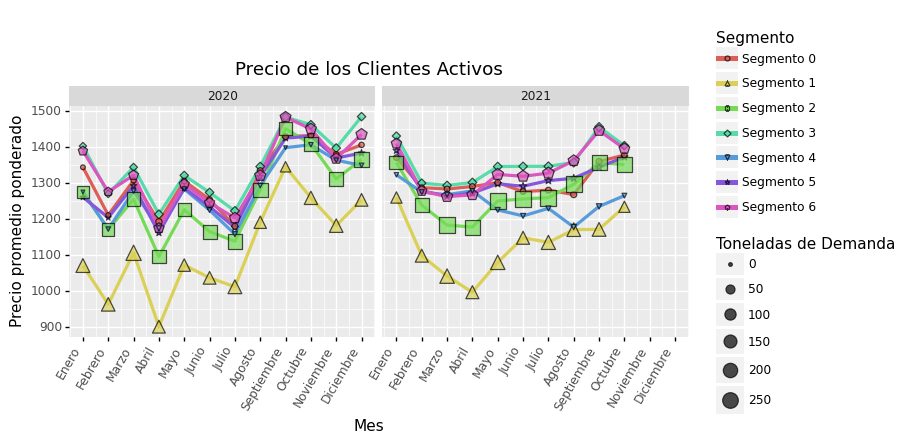

[<ggplot: (142417634771)>, <ggplot: (142418257128)>, <ggplot: (142418453733)>]

In [97]:
#Listado de Precios hisotrico promedio ponderado 
X_brak=[i for i in range(1,13)]
X_brak_S=[Mes_name(i) for i in range(1,13)]

df_G=pd.merge(
    Cluster_df_Val,
    Cluster_df_Val_Pond[['Segmento','Año','Mes']
                    +['Kilos Venta KG Totales']
                    +['Ingreso de Venta Total']
                    +['Precio promedio ponderado']
                    +['Toneladas de Demanda']
                    ]
,how='left')

df_G['Mes_num']=\
        df_G.Mes.apply(lambda x: Month_NUM_dic[x])

X_G='Mes_num'
Y_G='Precio promedio ponderado'
Fill_G='Segmento'
Color_G='Segmento'
Shape_G='Segmento'
Size_G= 'Toneladas de Demanda'
# 'Kilos Venta KG Totales'
# Año_G='2021'
Tupla_theme=(8,3)
Graph_Precio_pond_cluster.append(

ggplot(df_G\
    [(df_G.Año=='2018')
    |(df_G.Año=='2019')]
    , aes(x=X_G,
        y= Y_G
    #    'Cantidad de clientes'
        ,fill=Fill_G
    # 'Precio Promedio'
        ))

    + labs(x='Mes'
    # y='Disposición a pagar',
    )\

    +facet_grid('.~Año')

    + geom_line(aes(shape=Shape_G
        ,color=Color_G)
        ,size=1.3)

    + geom_point(aes(
            shape=Shape_G
            ,size=Size_G
            # ,color='Segmento'
            # 'Precio Promedio'
                )
                ,alpha=0.7
                )

    +ggtitle('Precio de los Clientes Activos')
    # # ('Peso Promedio de los Clusters de Clientes'+
    # #   ' \n Para Cada Semana'))\
    +theme(axis_text_x = element_text(angle=60, hjust=1)
    ,figure_size=Tupla_theme)
    + scale_x_continuous(breaks=X_brak,labels=X_brak_S)
)


Graph_Precio_pond_cluster.append(
    ggplot(df_G\
        [(df_G.Año=='2020')
        |(df_G.Año=='2021')]
            , aes(x=X_G,
        y= Y_G
    #    'Cantidad de clientes'
        ,fill=Fill_G
    # 'Precio Promedio'
        ))

    + labs(x='Mes'
    # y='Disposición a pagar',
    )\

    +facet_grid('.~Año')

    + geom_line(aes(shape=Shape_G
        ,color=Color_G)
        ,size=1.3)

    + geom_point(aes(
            shape=Shape_G
            ,size=Size_G
            # ,color='Segmento'
            # 'Precio Promedio'
                )
                ,alpha=0.7
                )

    +ggtitle('Precio de los Clientes Activos')
    # # ('Peso Promedio de los Clusters de Clientes'+
    # #   ' \n Para Cada Semana'))\
    +theme(axis_text_x = element_text(angle=60, hjust=1)
    ,figure_size=Tupla_theme)
    + scale_x_continuous(breaks=X_brak,labels=X_brak_S)
)
Graph_Precio_pond_cluster

### SAVE

In [98]:
# ```python
#============================
# W_F y W_F con la dispersion de los clusters generados
#============================
file_name=('Precio de clientes activos Mes Cluster RFM_Val')
    
# pngfill= Png_file_direct_Graphic_Canal_Material+"\\Cluster\\Val"
K_numbers=str(len(df_C_Customers.identified_clusters.unique()))
s_K_numbers='K_'+K_numbers
pngfill= Png_file_direct_Graphic_Canal_Material+"\\Cluster\\Val"#+"\\k_NUM\\"+s_K_numbers

start_time = time.time()
save_as_pdf_pages(
                  
                  Graph_Precio_pond_cluster
                    ,pngfill 
            +"\\"+ file_name + ".pdf")
time_convert(time.time()-start_time)
# ```

c:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\Cluster\Val\Precio de clientes activos Mes Cluster RFM_Val.pdf
c:\Users\user\anaconda3\lib\site-packages\plotnine\geoms\geom_path.py:75: PlotnineWarning: geom_path: Removed 2 rows containing missing values.
c:\Users\user\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 14 rows containing missing values.
c:\Users\user\anaconda3\lib\site-packages\plotnine\geoms\geom_path.py:75: PlotnineWarning: geom_path: Removed 2 rows containing missing values.
c:\Users\user\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 14 rows containing missing values.


Time Lapsed = 0:0:1.897723913192749 
 H:m:s


X_brak=[i for i in range(1,13)]
X_brak_S=[str(i) for i in range(1,13)]
X_df=df_prom#[df_prom['Cluster de Clientes']!='Sin Cluster']
GRaph_Disp_cluster=(
    ggplot(X_df
           , aes(x='Mes',
                               y='Precio promedio CLP '))\
                #+ labs(y='Disposición a pagar',x='Tipo de Semana')\
                + geom_point(aes(color='Cluster de Clientes',size='Toneladas de Venta TG Total'
                     ))\
                 + geom_line(aes(color='Cluster de Clientes'))\
                +ggtitle(('Precio Promedio mensual '+
                         ' \n de los Clusters '))\
                #+theme(axis_text_x = element_text(angle=90, hjust=1))
                       #,figure_size=(15,8)
                 + scale_x_continuous(breaks=X_brak,labels=X_brak_S)
    )
GRaph_Disp_cluster

# Descripción atributos 

## Data
<!--  `rfm_clust_x=df_C_Customers.copy()` -->

>`df_C_fact`

>`df_C_Customers`

In [99]:
# Promedio de los clientes
#-----------------------------------------------------------------------
df_fac_copy=df_C_fact.copy()#[df_C_fact.Año=='2021']
df_fac_copy['Ingreso_Venta']=df_fac_copy.apply(lambda x:
x.Precio*x['Kilos Venta KG']
,axis=1)

<AxesSubplot:>

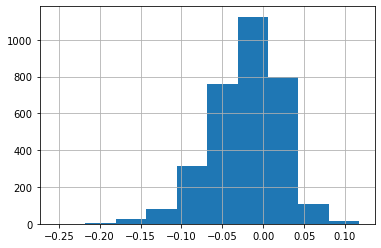

In [100]:
df_C_Customers_Copy=df_C_Customers.copy()
df_C_Customers_Copy['%△Valoración Promedio']=\
        df_C_Customers_Copy.apply(lambda x:
        np.mean([x['%△Valoración Promedio \n Tipo de Semana 0']
                ,x['%△Valoración Promedio \n Tipo de Semana 1']
                ,x['%△Valoración Promedio \n Tipo de Semana 2']
                ,x['%△Valoración Promedio \n Tipo de Semana 3']
                ,x['%△Valoración Promedio \n Tipo de Semana 4']])
        ,axis=1
        )
df_C_Customers_Copy['%△Valoración Promedio'].hist()

### Promedio de cada cliente

In [101]:
# Promedio de los clientes Con Año
#-----------------------------------------------------------------------
df_G_A_clietes=df_fac_copy.groupby(
    ['Segmento','Cliente','Año','Mes']
    ).mean()\
        [['Kilos Venta KG','Precio','Ingreso_Venta']]\
        .reset_index()\
    .rename(columns={'Kilos Venta KG':'Kilos Venta KG Promedio'
                        ,'Precio':'Precio Promedio'
    })\
    .dropna()


df_G_H_clietes=df_fac_copy.groupby(
    ['Segmento','Cliente','Mes']
    ).mean()\
        [['Kilos Venta KG','Precio','Ingreso_Venta']]\
        .reset_index()\
    .rename(columns={'Kilos Venta KG':'Kilos Venta KG Promedio'
                        ,'Precio':'Precio Promedio'
    })\
    .dropna()
df_G_A_clietes.head() 

Segmento   Cliente   Año        Mes  Kilos Venta KG Promedio  \
165  Segmento 0  10028999  2019  Noviembre                     22.0   
170  Segmento 0  10028999  2020  Diciembre                     22.0   
173  Segmento 0  10028999  2020      Julio                     22.0   
174  Segmento 0  10028999  2020      Junio                     22.0   
175  Segmento 0  10028999  2020      Marzo                     22.0   

     Precio Promedio  Ingreso_Venta  
165           1300.0        28600.0  
170           1400.0        30800.0  
173           1250.0        27500.0  
174           1290.0        28380.0  
175           1390.0        30580.0

## Grafico 3D

### Todos los clientes

In [102]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [103]:
df_C_Customers_Copy.columns

Index(['Cliente', 'Fecha ultima Compra', 'Recency Actual', 'Fecha Creacion',
       'Frecuency Actual del Cliente', 'Kilos Venta KG Promedio',
       'Precio Promedio', 'Año Creación Promedio',
       'Frecuencia Historica Promedio', 'Monetary Actual', 'Ticket std Actual',
       '$F^{-1}$ Actual', 'Actividad del cliente',
       'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '%△Valoración Promedio \n Tipo de Semana 0 (Normalizado)',
       '%△Valoración Promedio \n Tipo de Semana 1 (Normalizado)',
       '%△Valoración Promedio \n Tipo de Semana 2 (Normalizado)',
       '%△Valoración Promedio \n Tipo de Semana 3 (Normalizado)',
       '%△Valoración Promedio \n Tipo de Semana 4 (Normalizado)',
       'Kilos Venta KG Promedio \n Tipo de Semana 0 (Escala ln) (Normalizado)',
       'Kilos Venta KG Promedio \n Tipo de Semana 1 (Escala ln) (Normalizado)',
       'Kilos Venta KG Promedio \n Tipo de Semana 2 (Escala ln) (Nor

In [212]:
# df_C_Customers_Copy
L_xyz=[
'F-1'
,'%△Valoración Promedio'
,'Monetary Actual (Escala ln) (Normalizado)'
,'Ticket Promedio Actual'
]

In [213]:
L_color=df_C_Customers_Copy['Segmento'].to_list()

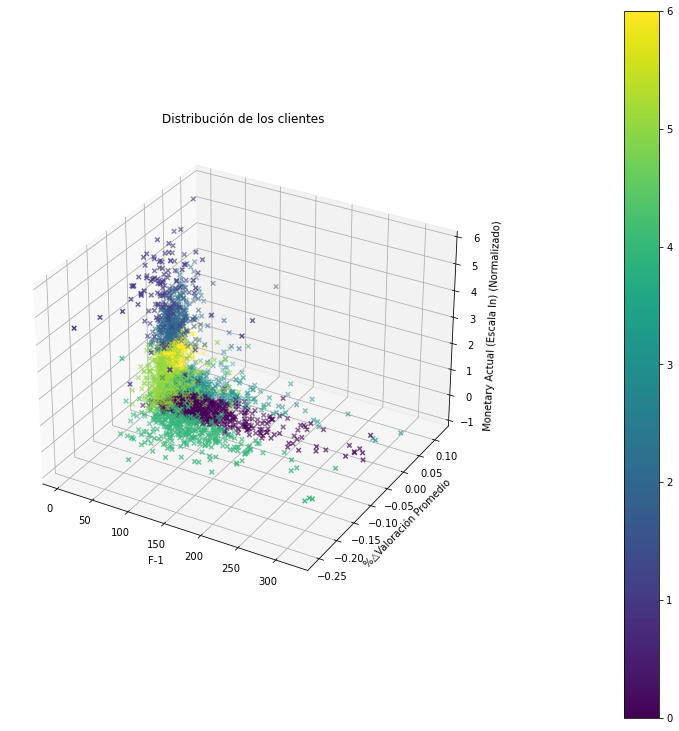

In [214]:
#Grafico escala colores gradual como entero
#===========================================

# fig = plt.figure(figsize=(4,4))

# ax = fig.add_subplot(111, projection='3d')
# np.random.seed(42)

L_color_list=df_C_Customers_Copy['identified_clusters'].to_list()
L_color_unique=df_C_Customers_Copy['identified_clusters'].unique()

xs =df_C_Customers_Copy[
L_xyz[0]].to_list()
#  np.random.random(100)*10+20

ys =df_C_Customers_Copy[
L_xyz[1]].to_list()
#  np.random.random(100)*5+7

zs = df_C_Customers_Copy[
L_xyz[2]].to_list()
# np.random.random(100)*15+50

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

# ax.scatter(xs,ys,zs)
# ax.scatter(xs,ys,zs, marker="x", c="red")
scat_plot=ax.scatter(xs,ys,zs, marker="x", c=L_color_list)

#----------------------------------------------
#Labels
ax.set_title("Distribución de los clientes")

ax.set_xlabel(L_xyz[0])

ax.set_ylabel(L_xyz[1])

ax.set_zlabel(L_xyz[2])

fig.set_size_inches(13, 13)
#------------------------------------------------

cb = plt.colorbar(scat_plot, pad=0.2)
# cb.set_ticks(L_color_unique)
# [L_color_unique]
# cb.set_ticklabels([ i for i in RFM_Dic_Cluster['Activo'] ])

plt.show()

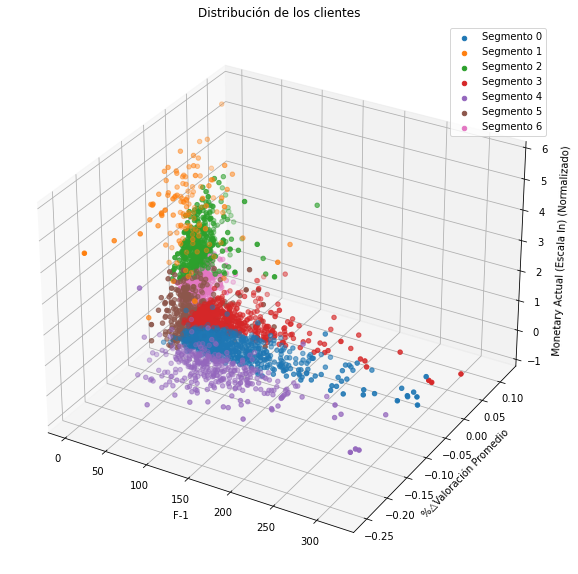

In [215]:
# Grafico de dispersión F-1 M y Valor%
#======================================
Disp_MF=[]

s_col_list='Segmento'
# 'identified_clusters'
# L_color_list=df_C_Customers_Copy[s_col_list].to_list()
L_color_unique=RFM_Dic_Cluster['Activo']
# df_C_Customers_Copy[s_col_list].unique()


fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
for l in L_color_unique:
        xs_l =df_C_Customers_Copy[df_C_Customers_Copy[s_col_list]==l][
        L_xyz[0]].to_list()

        ys_l=df_C_Customers_Copy[df_C_Customers_Copy[s_col_list]==l][
        L_xyz[1]].to_list()
        

        zs_l = df_C_Customers_Copy[df_C_Customers_Copy[s_col_list]==l][
        L_xyz[2]].to_list()

        bmi = [ 
        np.log(i)*10  
        for i in 
        df_C_Customers_Copy[df_C_Customers_Copy[s_col_list]==l][L_xyz[3]].to_list() ]

        ax.scatter(xs=xs_l,ys=ys_l,zs=zs_l
        , marker="o", label=l
        # ,s=bmi
        )




#----------------------------------------------
#Labels
ax.set_title("Distribución de los clientes")

ax.set_xlabel(L_xyz[0])

ax.set_ylabel(L_xyz[1])

ax.set_zlabel(L_xyz[2])

fig.set_size_inches(10, 10)

ax.legend(loc="best")

#------------------------------------------------

# cb = plt.colorbar(scat_plot, pad=0.2)
# cb.set_ticks(L_color_unique)
# [L_color_unique]
# cb.set_ticklabels([ i for i in RFM_Dic_Cluster['Activo'] ])

Disp_MF.append(plt.gcf())

plt.show()

In [216]:
# df_C_Customers_Copy
L_xyz=[

# 'F-1'
'Frecuency Actual del Cliente (Escala ln) (Normalizado)'
,'%△Valoración Promedio'
,'Monetary Actual (Escala ln) (Normalizado)'
,'Ticket Promedio Actual'

]

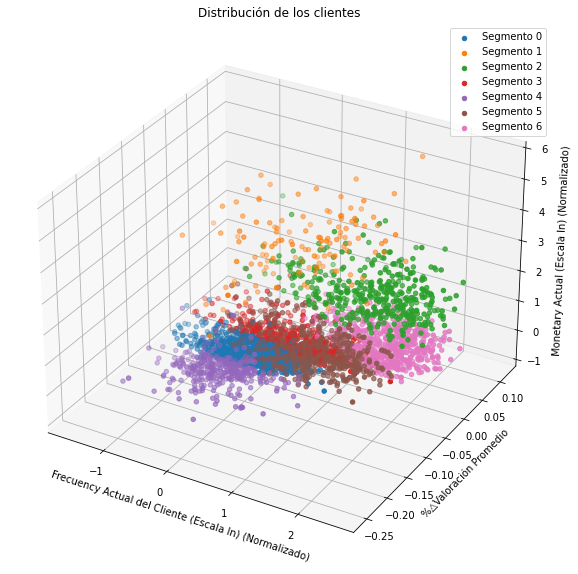

In [217]:
# Grafico de dispersión F M y Valor%
#======================================
# Disp_MF=[]


s_col_list='Segmento'
# 'identified_clusters'
# L_color_list=df_C_Customers_Copy[s_col_list].to_list()
L_color_unique=RFM_Dic_Cluster['Activo']
# df_C_Customers_Copy[s_col_list].unique()


fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
for l in L_color_unique:
        xs_l =df_C_Customers_Copy[df_C_Customers_Copy[s_col_list]==l][
        L_xyz[0]].to_list()

        ys_l=df_C_Customers_Copy[df_C_Customers_Copy[s_col_list]==l][
        L_xyz[1]].to_list()
        

        zs_l = df_C_Customers_Copy[df_C_Customers_Copy[s_col_list]==l][
        L_xyz[2]].to_list()

        bmi = [ 
        np.log(i)*10  
        for i in 
        df_C_Customers_Copy[df_C_Customers_Copy[s_col_list]==l][L_xyz[3]].to_list() ]

        ax.scatter(xs=xs_l,ys=ys_l,zs=zs_l
        , marker="o", label=l
        # ,s=bmi
        )




#----------------------------------------------
#Labels
ax.set_title("Distribución de los clientes")

ax.set_xlabel(L_xyz[0])

ax.set_ylabel(L_xyz[1])

ax.set_zlabel(L_xyz[2])

fig.set_size_inches(10, 10)

ax.legend(loc='best')
# "best"
#------------------------------------------------

# cb = plt.colorbar(scat_plot, pad=0.2)
# cb.set_ticks(L_color_unique)
# [L_color_unique]
# cb.set_ticklabels([ i for i in RFM_Dic_Cluster['Activo'] ])
Disp_MF.append(plt.gcf())
plt.show()

### Valores promedio

#### Datos

In [228]:
#===================================================
# Valor promedio de cada segmento
#===================================================

#===================================================
# Definir las columnas
L_color=df_C_Customers_Copy['Segmento'].to_list()
L_xyz=[
'F-1'
,'%△Valoración Promedio'
,'Monetary Actual (Escala ln) (Normalizado)'
,'Ticket Promedio Actual'
]
# --------------------------------------------------
# Dataframe centroide
df_centroid=df_C_Customers_Copy.groupby('Segmento')\
    .mean()[L_xyz].reset_index()

df_Count=df_C_Customers_Copy.groupby('Segmento')\
            .count()['Cliente'].reset_index()
df_Count[df_Count.Segmento==l].iloc[0,1]
# .to_list()

749

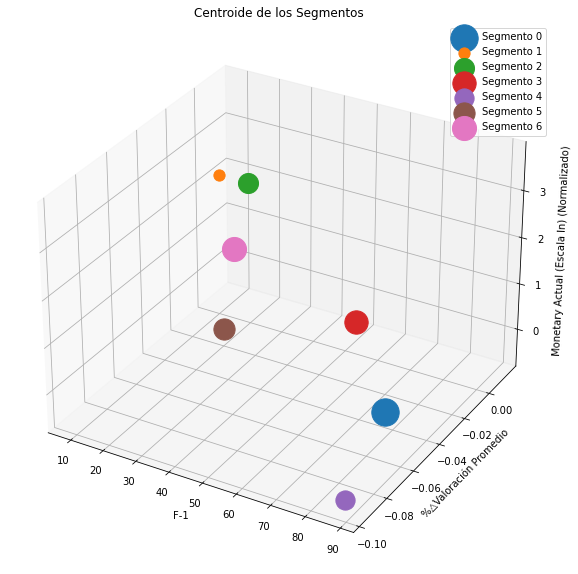

In [232]:
# Figura
#======================================


s_col_list='Segmento'
# 'identified_clusters'
# L_color_list=df_C_Customers_Copy[s_col_list].to_list()
L_color_unique=RFM_Dic_Cluster['Activo']
# df_C_Customers_Copy[s_col_list].unique()


fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
for l in L_color_unique:
        xs_l =df_centroid[df_centroid[s_col_list]==l][
        L_xyz[0]].to_list()

        ys_l=df_centroid[df_centroid[s_col_list]==l][
        L_xyz[1]].to_list()
        

        zs_l = df_centroid[df_centroid[s_col_list]==l][
        L_xyz[2]].to_list()
        
        bmi=df_Count[df_Count.Segmento==l].iloc[0,1]

        ax.scatter(xs=xs_l,ys=ys_l,zs=zs_l
                , marker="o", label=l,s=bmi)




#----------------------------------------------
#Labels
ax.set_title("Centroide de los Segmentos")

ax.set_xlabel(L_xyz[0])

ax.set_ylabel(L_xyz[1])

ax.set_zlabel(L_xyz[2])

fig.set_size_inches(10, 10)

ax.legend(loc="best")

#------------------------------------------------

# cb = plt.colorbar(scat_plot, pad=0.2)
# cb.set_ticks(L_color_unique)
# [L_color_unique]
# cb.set_ticklabels([ i for i in RFM_Dic_Cluster['Activo'] ])
Disp_MF_mean=(plt.gcf())
plt.show()

#### SAVE

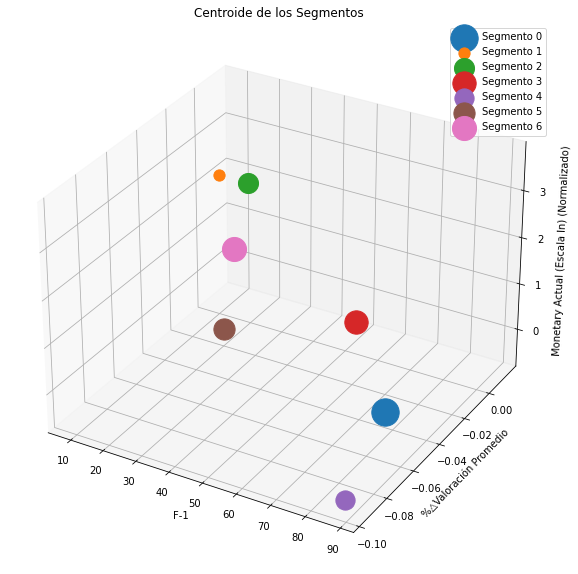

In [234]:
Disp_MF[1]
Disp_MF_mean

In [235]:
#  ```python
# from matplotlib.backends.backend_pdf import PdfPages
# 
# Nombre del archivo
file_name=('Dispersion 3D RFM_VAL')
print(file_name)
pngfill= Png_file_direct_Graphic_Canal_Material+"\\Cluster\\Val\\"
print(pngfill+file_name)

# pp = PdfPages('foo.pdf')
pp = PdfPages(pngfill+file_name+'.pdf')
pp.savefig(Disp_MF[0])
pp.savefig(Disp_MF[1])
pp.savefig(Disp_MF_mean)

pp.close()
# ```

Dispersion 3D RFM_VAL
C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\Cluster\Val\Dispersion 3D RFM_VAL


## Tabla de distribución 

### Atributos

In [110]:
#Columnas ademas de RFM
Week_Val_Col_list=[
    '%△Valoración Promedio \n Tipo de Semana 0',
    '%△Valoración Promedio \n Tipo de Semana 1',
    '%△Valoración Promedio \n Tipo de Semana 2',
    '%△Valoración Promedio \n Tipo de Semana 3',
    '%△Valoración Promedio \n Tipo de Semana 4']
Week_KG_Col_list=[
    'Kilos Venta KG Promedio \n Tipo de Semana 0',
    'Kilos Venta KG Promedio \n Tipo de Semana 1',
    'Kilos Venta KG Promedio \n Tipo de Semana 2',
    'Kilos Venta KG Promedio \n Tipo de Semana 3',
    'Kilos Venta KG Promedio \n Tipo de Semana 4']
Ticket_Col_list=['Ticket Promedio Actual', 'Ticket CV Actual']


#### Valoración

##### Descriptivo

In [111]:
df_U=df_C_Customers.copy()



L_C=len(Week_Val_Col_list)
L_round= 4 #[2 for i in L_C]

List_Tab=list()
for i in range(L_C):
    c=Week_Val_Col_list[i]
    # Se construye una tabla descriptiva de la columna especifica
    List_Tab.append(
        df_U[['Segmento', c ]]\
        .groupby('Segmento').describe()\
        [c].reset_index()\
        .round(L_round))

    List_Tab[i]['Atributo']=[c.split(' \n ')[1] for j in range(L_clusters_A)]
    List_Tab[i].set_index('Atributo')

pd.concat(List_Tab )\
    .set_index(['Atributo','Segmento']).head().drop(columns='count')

mean     std     min     25%     50%     75%  \
Atributo         Segmento                                                     
Tipo de Semana 0 Segmento 0 -0.0412  0.0359 -0.1617 -0.0629 -0.0382 -0.0199   
                 Segmento 1 -0.0351  0.0393 -0.2100 -0.0549 -0.0301 -0.0130   
                 Segmento 2  0.0125  0.0246 -0.0644 -0.0028  0.0124  0.0237   
                 Segmento 3  0.0032  0.0326 -0.0987 -0.0171  0.0025  0.0204   
                 Segmento 4 -0.0679  0.0422 -0.1977 -0.0962 -0.0694 -0.0380   

                                max  
Atributo         Segmento            
Tipo de Semana 0 Segmento 0  0.1216  
                 Segmento 1  0.1321  
                 Segmento 2  0.1090  
                 Segmento 3  0.2419  
                 Segmento 4  0.0547

In [112]:
print(
pd.concat(List_Tab )\
    .set_index(['Atributo','Segmento'])\
        .drop(columns='count')\
.to_latex( float_format='{:,.1%}'.format))

\begin{tabular}{llrrrrrrr}
\toprule
                 &            &   mean &  std &    min &    25\% &    50\% &   75\% &   max \\
Atributo & Segmento &        &      &        &        &        &       &       \\
\midrule
Tipo de Semana 0 & Segmento 0 &  -4.1\% & 3.6\% & -16.2\% &  -6.3\% &  -3.8\% & -2.0\% & 12.2\% \\
                 & Segmento 1 &  -3.5\% & 3.9\% & -21.0\% &  -5.5\% &  -3.0\% & -1.3\% & 13.2\% \\
                 & Segmento 2 &   1.2\% & 2.5\% &  -6.4\% &  -0.3\% &   1.2\% &  2.4\% & 10.9\% \\
                 & Segmento 3 &   0.3\% & 3.3\% &  -9.9\% &  -1.7\% &   0.2\% &  2.0\% & 24.2\% \\
                 & Segmento 4 &  -6.8\% & 4.2\% & -19.8\% &  -9.6\% &  -6.9\% & -3.8\% &  5.5\% \\
                 & Segmento 5 &  -1.5\% & 3.0\% & -14.0\% &  -3.2\% &  -1.2\% &  0.3\% & 13.6\% \\
                 & Segmento 6 &   1.2\% & 2.1\% &  -8.8\% &  -0.2\% &   1.2\% &  2.4\% & 11.5\% \\
Tipo de Semana 1 & Segmento 0 &  -4.2\% & 4.2\% & -16.2\% &  -6.3\% &  -4.0\% & -1.9\

#### KG

In [113]:
df_U=df_C_Customers.copy()



L_C=len(Ticket_Col_list)
L_round= 2 #[2 for i in L_C]

List_Tab=list()
for i in range(L_C):
    c=Ticket_Col_list[i]
    # Se construye una tabla descriptiva de la columna especifica
    List_Tab.append(
        df_U[['Segmento', c ]]\
        .groupby('Segmento').describe()\
        [c].reset_index()\
        .round(L_round))

    List_Tab[i]['Atributo']=[c
    for j in range(L_clusters_A)]

    # List_Tab[i].set_index('Atributo')

pd.concat(List_Tab )\
    .set_index(['Atributo','Segmento'])\
        .head().drop(columns='count')

mean     std     min     25%     50%  \
Atributo               Segmento                                             
Ticket Promedio Actual Segmento 0   22.63    2.28   21.33   22.00   22.00   
                       Segmento 1  712.02  433.30  126.00  346.61  652.46   
                       Segmento 2  142.01   70.31   62.40   90.88  121.92   
                       Segmento 3   23.53    3.71   18.00   22.00   22.00   
                       Segmento 4   24.27   12.57   21.80   22.00   22.00   

                                      75%      max  
Atributo               Segmento                     
Ticket Promedio Actual Segmento 0   22.00    44.00  
                       Segmento 1  978.67  2443.10  
                       Segmento 2  172.06   489.43  
                       Segmento 3   23.44    55.12  
                       Segmento 4   22.09   244.00

In [114]:
List_Tab[0]

Segmento  count    mean     std     min     25%     50%     75%      max  \
0  Segmento 0  749.0   22.63    2.28   21.33   22.00   22.00   22.00    44.00   
1  Segmento 1  126.0  712.02  433.30  126.00  346.61  652.46  978.67  2443.10   
2  Segmento 2  402.0  142.01   70.31   62.40   90.88  121.92  172.06   489.43   
3  Segmento 3  545.0   23.53    3.71   18.00   22.00   22.00   23.44    55.12   
4  Segmento 4  370.0   24.27   12.57   21.80   22.00   22.00   22.09   244.00   
5  Segmento 5  450.0   37.53   19.23   21.99   24.44   29.93   44.18   127.56   
6  Segmento 6  580.0   40.39   13.74   22.00   28.62   37.25   50.80    75.55   

                 Atributo  
0  Ticket Promedio Actual  
1  Ticket Promedio Actual  
2  Ticket Promedio Actual  
3  Ticket Promedio Actual  
4  Ticket Promedio Actual  
5  Ticket Promedio Actual  
6  Ticket Promedio Actual

In [115]:
print(
pd.concat(List_Tab )\
    .set_index(['Atributo','Segmento'])\
        .drop(columns='count')\
.to_latex( float_format='{:,.1f}'.format))
# .to_latex( float_format='{:,.1%}'.format))


\begin{tabular}{llrrrrrrr}
\toprule
                 &            &  mean &   std &   min &   25\% &   50\% &   75\% &     max \\
Atributo & Segmento &       &       &       &       &       &       &         \\
\midrule
Ticket Promedio Actual & Segmento 0 &  22.6 &   2.3 &  21.3 &  22.0 &  22.0 &  22.0 &    44.0 \\
                 & Segmento 1 & 712.0 & 433.3 & 126.0 & 346.6 & 652.5 & 978.7 & 2,443.1 \\
                 & Segmento 2 & 142.0 &  70.3 &  62.4 &  90.9 & 121.9 & 172.1 &   489.4 \\
                 & Segmento 3 &  23.5 &   3.7 &  18.0 &  22.0 &  22.0 &  23.4 &    55.1 \\
                 & Segmento 4 &  24.3 &  12.6 &  21.8 &  22.0 &  22.0 &  22.1 &   244.0 \\
                 & Segmento 5 &  37.5 &  19.2 &  22.0 &  24.4 &  29.9 &  44.2 &   127.6 \\
                 & Segmento 6 &  40.4 &  13.7 &  22.0 &  28.6 &  37.2 &  50.8 &    75.5 \\
Ticket CV Actual & Segmento 0 &   0.1 &   0.1 &   0.0 &   0.0 &   0.0 &   0.0 &     0.6 \\
                 & Segmento 1 &   0.6 &   0.3 

In [116]:
print(
pd.concat(List_Tab )\
    .set_index(['Atributo','Segmento'])\
        .drop(columns='count')\
.to_latex( float_format='{:,.1%}'.format))
# .to_latex( float_format='{:,.1%}'.format))


\begin{tabular}{llrrrrrrr}
\toprule
                 &            &      mean &       std &       min &       25\% &       50\% &       75\% &        max \\
Atributo & Segmento &           &           &           &           &           &           &            \\
\midrule
Ticket Promedio Actual & Segmento 0 &  2,263.0\% &    228.0\% &  2,133.0\% &  2,200.0\% &  2,200.0\% &  2,200.0\% &   4,400.0\% \\
                 & Segmento 1 & 71,202.0\% & 43,330.0\% & 12,600.0\% & 34,661.0\% & 65,246.0\% & 97,867.0\% & 244,310.0\% \\
                 & Segmento 2 & 14,201.0\% &  7,031.0\% &  6,240.0\% &  9,088.0\% & 12,192.0\% & 17,206.0\% &  48,943.0\% \\
                 & Segmento 3 &  2,353.0\% &    371.0\% &  1,800.0\% &  2,200.0\% &  2,200.0\% &  2,344.0\% &   5,512.0\% \\
                 & Segmento 4 &  2,427.0\% &  1,257.0\% &  2,180.0\% &  2,200.0\% &  2,200.0\% &  2,209.0\% &  24,400.0\% \\
                 & Segmento 5 &  3,753.0\% &  1,923.0\% &  2,199.0\% &  2,444.0\% &  2,993.0\% 

#### KValoración

In [117]:
df_U=df_C_Customers.copy()



L_C=len(Week_Val_Col_list)
L_round= 2 #[2 for i in L_C]

List_Tab=list()
for i in range(L_C):
    c=Week_Val_Col_list[i]
    # Se construye una tabla descriptiva de la columna especifica
    List_Tab.append(
        df_U[['Segmento', c ]]\
        .groupby('Segmento').describe()\
        [c].reset_index()\
        .round(L_round))

    List_Tab[i]['Atributo']=[c for j in range(L_clusters_A)]
    List_Tab[i].set_index('Atributo')

pd.concat(List_Tab  ).set_index(['Atributo','Segmento'])

count  mean   std   min  \
Atributo                                  Segmento                              
%△Valoración Promedio \n Tipo de Semana 0 Segmento 0  749.0 -0.04  0.04 -0.16   
                                          Segmento 1  126.0 -0.04  0.04 -0.21   
                                          Segmento 2  402.0  0.01  0.02 -0.06   
                                          Segmento 3  545.0  0.00  0.03 -0.10   
                                          Segmento 4  370.0 -0.07  0.04 -0.20   
                                          Segmento 5  450.0 -0.01  0.03 -0.14   
                                          Segmento 6  580.0  0.01  0.02 -0.09   
%△Valoración Promedio \n Tipo de Semana 1 Segmento 0  749.0 -0.04  0.04 -0.16   
                                          Segmento 1  126.0 -0.04  0.05 -0.20   
                                          Segmento 2  402.0  0.02  0.03 -0.09   
                                          Segmento 3  545.0  0.00  0.04 -0.14   
                                          Segmento 4  370.0 -0.10  0.05 -0.25   
                                          Segmento 5  450.0 -0.02  0.04 -0.20   
                                          Segmento 6  580.0  0.01  0.02 -0.12   
%△Valoración Promedio \n Tipo de Semana 2 Segmento 0  749.0 -0.03  0.04 -0.17   
                                          Segmento 1  126.0 -0.04  0.06 -0.21   
                                          Segmento 2  402.0  0.01  0.03 -0.11   
                                          Segmento 3  545.0 -0.00  0.03 -0.17   
                                          Segmento 4  370.0 -0.10  0.05 -0.20   
                                          Segmento 5  450.0 -0.02  0.03 -0.14   
                                          Segmento 6  580.0  0.01  0.02 -0.06   
%△Valoración Promedio \n Tipo de Semana 3 Segmento 0  749.0 -0.05  0.05 -0.23   
                                          Segmento 1  126.0 -0.07  0.09 -0.42   
                                          Segmento 2  402.0  0.01  0.06 -0.19   
                                          Segmento 3  545.0  0.02  0.05 -0.16   
                                          Segmento 4  370.0 -0.12  0.06 -0.23   
                                          Segmento 5  450.0 -0.06  0.06 -0.23   
                                          Segmento 6  580.0  0.03  0.04 -0.13   
%△Valoración Promedio \n Tipo de Semana 4 Segmento 0  749.0 -0.04  0.03 -0.14   
                                          Segmento 1  126.0 -0.04  0.07 -0.38   
                                          Segmento 2  402.0  0.02  0.06 -0.11   
                                          Segmento 3  545.0  0.02  0.04 -0.12   
                                          Segmento 4  370.0 -0.10  0.03 -0.20   
                                          Segmento 5  450.0 -0.06  0.05 -0.26   
                                          Segmento 6  580.0  0.01  0.05 -0.17   

                                                       25%   50%   75%   max  
Atributo                                  Segmento                            
%△Valoración Promedio \n Tipo de Semana 0 Segmento 0 -0.06 -0.04 -0.02  0.12  
                                          Segmento 1 -0.05 -0.03 -0.01  0.13  
                                          Segmento 2 -0.00  0.01  0.02  0.11  
                                          Segmento 3 -0.02  0.00  0.02  0.24  
                                          Segmento 4 -0.10 -0.07 -0.04  0.05  
                                          Segmento 5 -0.03 -0.01  0.00  0.14  
                                          Segmento 6 -0.00  0.01  0.02  0.12  
%△Valoración Promedio \n Tipo de Semana 1 Segmento 0 -0.06 -0.04 -0.02  0.14  
                                          Segmento 1 -0.07 -0.03 -0.01  0.05  
                                          Segmento 2 -0.00  0.02  0.03  0.13  
                                          Segmento 3 -0.02 -0.00  0.02  0.32  
                             

### Facturas

In [118]:
# Facturas
df_fac_copy.groupby(
    'Segmento'
    ).describe()\
        [['Kilos Venta KG','Precio']]\
        # .T

Kilos Venta KG                                                      \
                    count        mean         std   min    25%    50%     75%   
Segmento                                                                        
Segmento 0         8458.0   22.548711    3.572133  12.0   22.0   22.0    22.0   
Segmento 1         8378.0  763.746360  664.690637  15.0  242.0  555.0  1102.0   
Segmento 2        48649.0  141.005858  119.031567   1.0   66.0  111.0   175.0   
Segmento 3        13022.0   23.381662    6.039709  10.0   22.0   22.0    22.0   
Segmento 4         2774.0   23.801730    8.833128  19.0   22.0   22.0    22.0   
Segmento 5        17262.0   37.356737   27.368218   9.0   22.0   22.0    44.0   
Segmento 6        81832.0   41.256086   24.337550   9.0   22.0   44.0    44.0   

                      Precio                                                  \
                max    count         mean         std    min     25%     50%   
Segmento                                                                       
Segmento 0     67.0   8458.0  1296.590920  113.394347  840.0  1208.0  1290.0   
Segmento 1  11004.0   8378.0  1099.060993  157.693020  450.0  1000.0  1100.0   
Segmento 2   2427.0  48649.0  1256.513330  131.029533  300.0  1190.0  1250.0   
Segmento 3    132.0  13022.0  1339.333513  118.665271  900.0  1250.0  1350.0   
Segmento 4    244.0   2774.0  1233.287311  100.747187  990.0  1150.0  1226.0   
Segmento 5    528.0  17262.0  1300.737632  114.054512  300.0  1230.0  1290.0   
Segmento 6    485.0  81832.0  1321.339109  113.866517   61.0  1250.0  1300.0   

                            
               75%     max  
Segmento                    
Segmento 0  1390.0  1850.0  
Segmento 1  1200.0  1823.0  
Segmento 2  1350.0  2250.0  
Segmento 3  1390.0  1876.0  
Segmento 4  1290.0  1650.0  
Segmento 5  1390.0  1850.0  
Segmento 6  1390.0  2350.0

## Histograma

### Kg

In [119]:
DF_G=df_fac_copy.groupby(
    ['Segmento','Cliente']#,'Mes'
    ).mean()\
        [['Kilos Venta KG','Precio','Ingreso_Venta']]\
        .reset_index()\
    .rename(columns={'Kilos Venta KG':'Kilos Venta KG Promedio'
                        ,'Precio':'Precio Promedio'
    }).dropna()[['Segmento','Kilos Venta KG Promedio']]
    # .groupby(
    # 'Segmento').hist()
    
DF_G.head()

Segmento  Kilos Venta KG Promedio
3   Segmento 0                22.000000
4   Segmento 0                22.000000
6   Segmento 0                22.000000
10  Segmento 0                22.041667
16  Segmento 0                22.000000

Segmento
Segmento 0    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
Segmento 1    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
Segmento 2    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
Segmento 3    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
Segmento 4    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
Segmento 5    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
Segmento 6    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
dtype: object

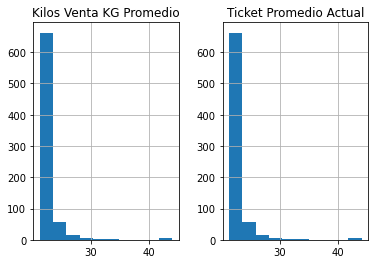

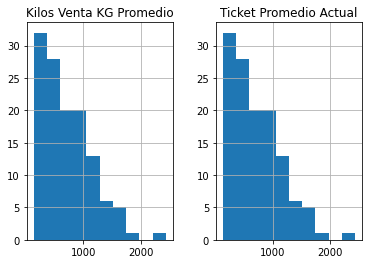

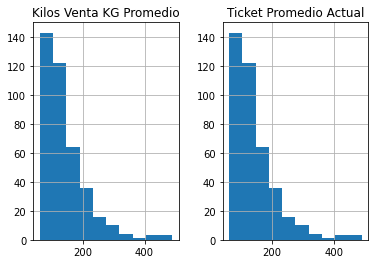

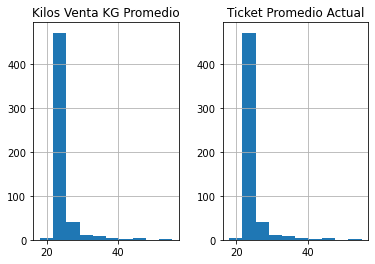

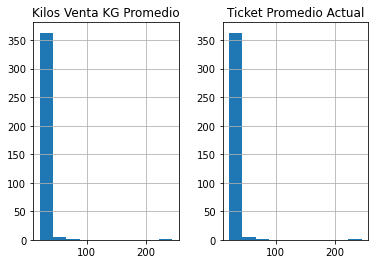

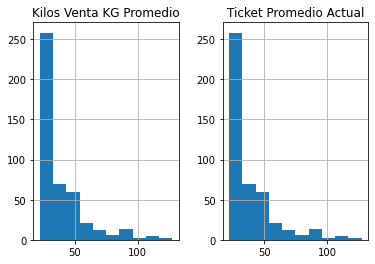

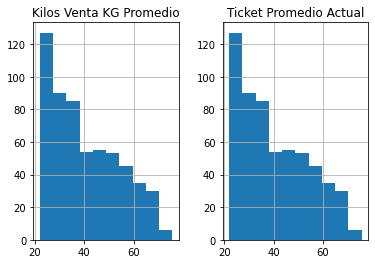

In [120]:
#Histograma df_C_Customers
df_C_Customers.groupby(
    ['Segmento','Cliente']#,'Mes'
    ).mean()\
        [['Kilos Venta KG Promedio'
 ,'Ticket Promedio Actual']]\
        .reset_index()\
    .dropna()[['Segmento','Kilos Venta KG Promedio','Ticket Promedio Actual']]\
    .groupby(
    'Segmento').hist()

Segmento
Segmento 0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Segmento 1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Segmento 2    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Segmento 3    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Segmento 4    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Segmento 5    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Segmento 6    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

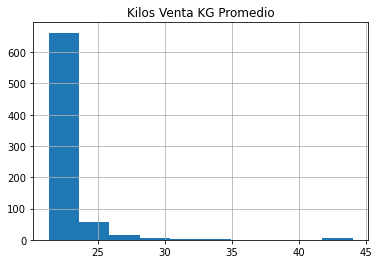

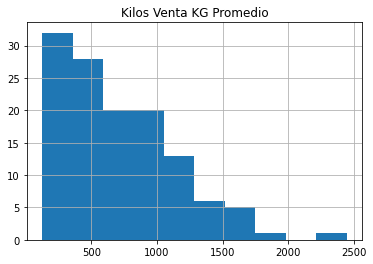

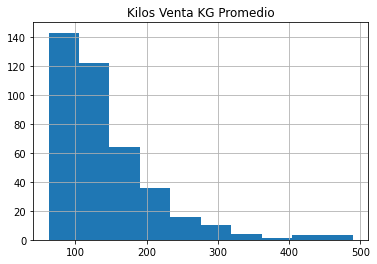

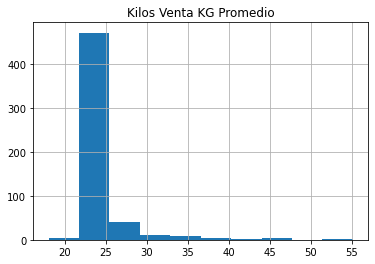

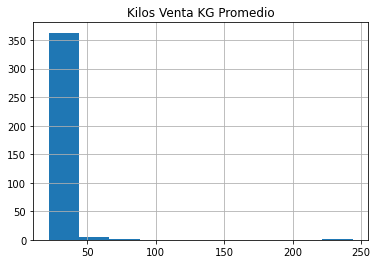

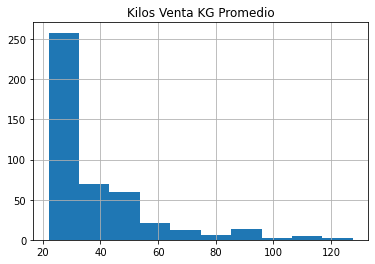

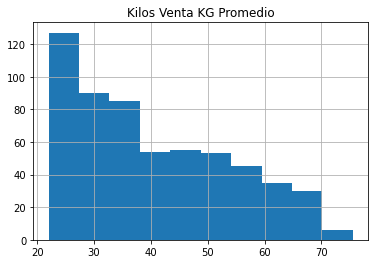

In [121]:
#Histograma df_fac_copy
df_fac_copy.groupby(
    ['Segmento','Cliente']#,'Mes'
    ).mean()\
        [['Kilos Venta KG','Precio','Ingreso_Venta']]\
        .reset_index()\
    .rename(columns={'Kilos Venta KG':'Kilos Venta KG Promedio'
                        ,'Precio':'Precio Promedio'
    }).dropna()[['Segmento','Kilos Venta KG Promedio']]\
    .groupby(
    'Segmento').hist()

In [122]:
# DF_G[DF_G.Segmento==i_s]['Kilos Venta KG Promedio'].mean()

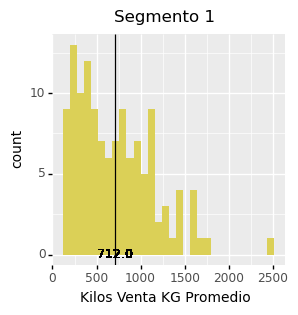

<ggplot: (142417633244)>

In [123]:
#Hitograma Kg
#  +facet_grid('Segmento~.')\
i_s=DF_G.Segmento.unique()[1]
# Hit_gg_L=[
ggplot(
    DF_G\
        [DF_G.Segmento==i_s]
    ,aes(
        x='Kilos Venta KG Promedio'        
        ,fill='Segmento'
    ))\
+geom_histogram(bins=30,alpha=1)\
+theme(#axis_text_x = element_text(angle=90, hjust=1),
            legend_position='none',
            figure_size=(3,3),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            title=element_text(size = 12)
)\
+ggtitle(i_s)\
+geom_vline(aes(xintercept = DF_G[DF_G.Segmento==i_s]['Kilos Venta KG Promedio'].mean()))\
+geom_text(aes(label=round( DF_G[DF_G.Segmento==i_s]['Kilos Venta KG Promedio'].mean(),1)
            ,y=0
            ,x= DF_G[DF_G.Segmento==i_s]['Kilos Venta KG Promedio'].mean()),
            # vjust=-1,
            color='black',size=9)

#  for i_s in DF_G.Segmento.unique()]
# Hit_gg_L

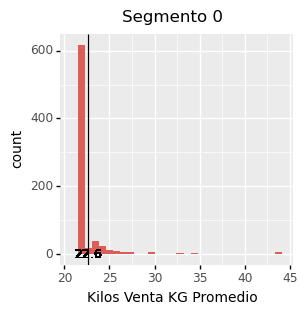

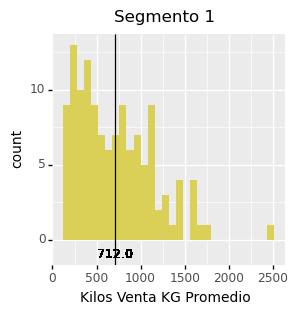

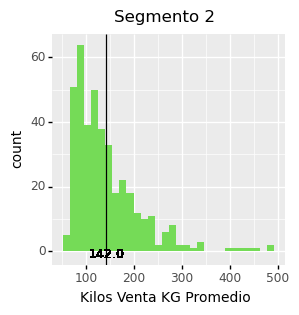

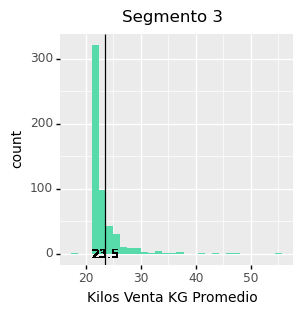

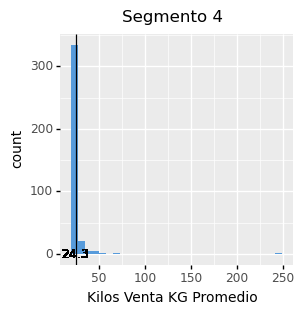

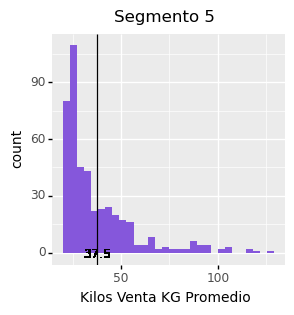

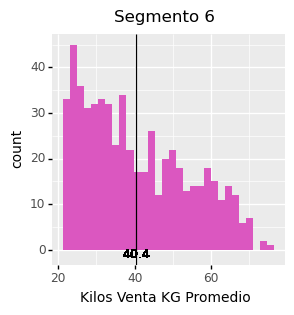

[<ggplot: (142417621983)>,
 <ggplot: (142414473638)>,
 <ggplot: (142422314530)>,
 <ggplot: (142422314659)>,
 <ggplot: (142422316734)>,
 <ggplot: (142419170283)>,
 <ggplot: (142419168121)>]

In [124]:
#Hitograma Kg
#  +facet_grid('Segmento~.')\
i_s=DF_G.Segmento.unique()[1]
Hit_gg_L=[ggplot(
    DF_G\
        [DF_G.Segmento==i_s]
    ,aes(
        x='Kilos Venta KG Promedio'        
        ,fill='Segmento'
    ))\
+geom_histogram(bins=30,alpha=1)\
+theme(#axis_text_x = element_text(angle=90, hjust=1),
            legend_position='none',
            figure_size=(3,3),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            title=element_text(size = 12)
)\
+ggtitle(i_s)\
+geom_vline(aes(xintercept = DF_G[DF_G.Segmento==i_s]['Kilos Venta KG Promedio'].mean()))\
+geom_text(aes(label=round( DF_G[DF_G.Segmento==i_s]['Kilos Venta KG Promedio'].mean(),1)
        ,y=-1
        ,x= DF_G[DF_G.Segmento==i_s]['Kilos Venta KG Promedio'].mean()),
        # vjust=-1,
        color='black',size=9)

 for i_s in DF_G.Segmento.unique()]
Hit_gg_L

### SAVE Histo Kg

In [125]:
# ```python
#============================
# W_F y W_F con la dispersion de los clusters generados
#============================
file_name=('Histo Kg Promedio Cluster RFM_Val')
    
# pngfill= Png_file_direct_Graphic_Canal_Material+"\\Cluster\\Val"
K_numbers=str(len(df_C_Customers.identified_clusters.unique()))
s_K_numbers='K_'+K_numbers
pngfill= Png_file_direct_Graphic_Canal_Material+"\\Cluster\\Val"#+"\\k_NUM\\"+s_K_numbers

start_time = time.time()
save_as_pdf_pages(
                  
                  Hit_gg_L
                    ,pngfill 
            +"\\"+ file_name + ".pdf")
time_convert(time.time()-start_time)
# ```

c:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\Cluster\Val\Histo Kg Promedio Cluster RFM_Val.pdf


Time Lapsed = 0:0:5.424928426742554 
 H:m:s


### Variable

In [126]:
#  'Recency Actual'
#  '$F^{-1}$ Actual'
#  'Monetary Actual'
##---------------------
# 'Ticket Promedio Actual'
# 'Ticket CV Actual'

# df_C_Customers.columns

[
'Recency Actual'
,'$F^{-1}$ Actual'
,'Monetary Actual'
#---------------------
,'Ticket Promedio Actual'
,'Ticket CV Actual'
]

['Recency Actual',
 '$F^{-1}$ Actual',
 'Monetary Actual',
 'Ticket Promedio Actual',
 'Ticket CV Actual']

Segmento
Segmento 0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Segmento 1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Segmento 2    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Segmento 3    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Segmento 4    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Segmento 5    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Segmento 6    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

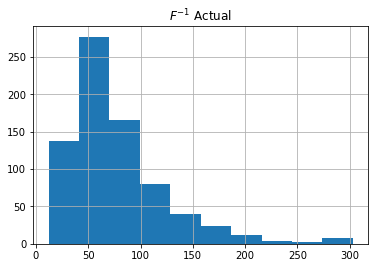

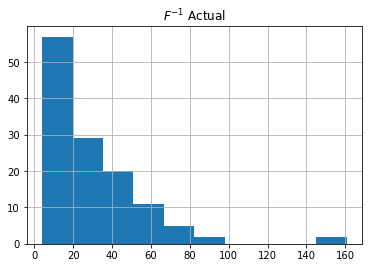

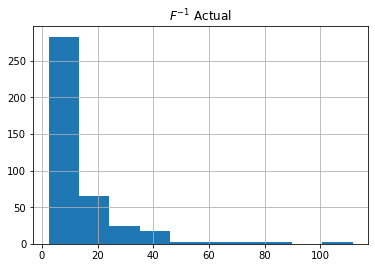

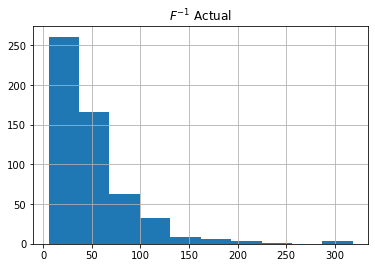

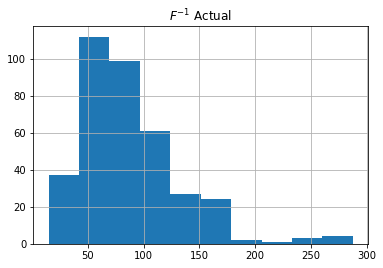

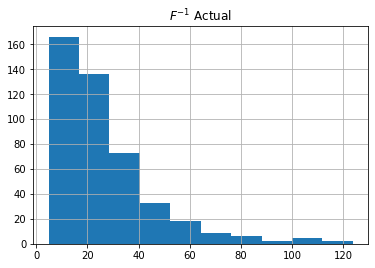

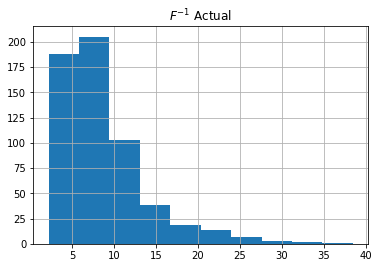

In [127]:
#Histograma df_C_Customers
X_G_H = [
'Recency Actual'
,'$F^{-1}$ Actual'
,'Monetary Actual'
#---------------------
,'Ticket Promedio Actual'
,'Ticket CV Actual'
][1]

df_C_Customers.groupby(
    ['Segmento','Cliente']#,'Mes'
    ).mean()\
        [[X_G_H]]\
        .reset_index()\
    .dropna()[['Segmento',X_G_H]]\
    .groupby(
    'Segmento').hist()

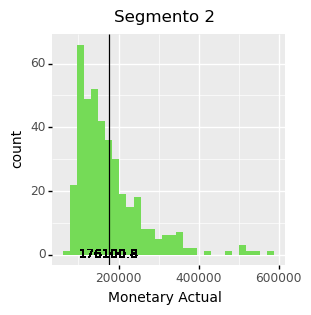

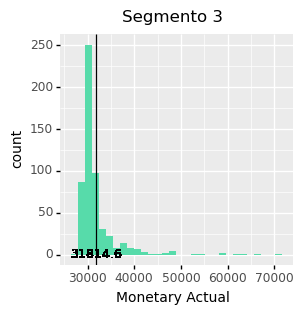

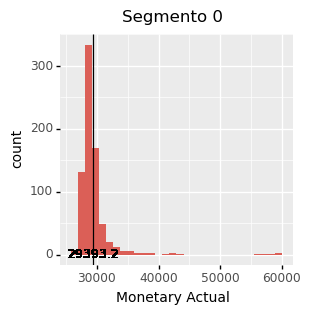

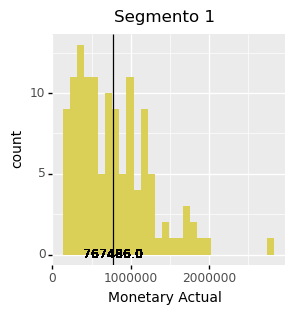

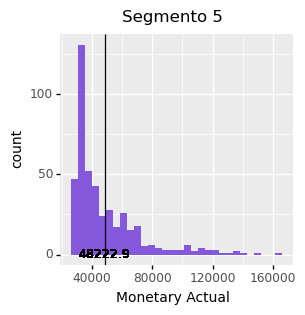

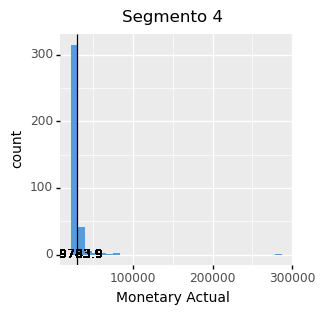

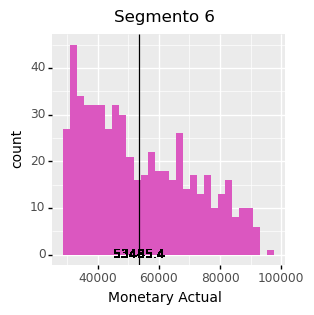

[<ggplot: (142424155841)>,
 <ggplot: (142424221540)>,
 <ggplot: (142422291363)>,
 <ggplot: (142422301118)>,
 <ggplot: (142422299971)>,
 <ggplot: (142418495928)>,
 <ggplot: (142418495895)>]

In [128]:
# Monetary Histo
DF_G=df_C_Customers.copy()
i_s=DF_G.Segmento.unique()[1]
X_G_H='Monetary Actual'
# '$F^{-1}$ Actual'
# 'Kilos Venta KG Promedio'        
# Hit_gg_L=
[
ggplot(
    DF_G\
        [DF_G.Segmento==i_s]
    ,aes(
        x=X_G_H
        ,fill='Segmento'
    ))\
+geom_histogram(bins=30,alpha=1)\
+theme(#axis_text_x = element_text(angle=90, hjust=1),
            legend_position='none',
            figure_size=(3,3),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            title=element_text(size = 12)
)\
+ggtitle(i_s)\
+geom_vline(aes(xintercept = DF_G[DF_G.Segmento==i_s][X_G_H].mean()))\
+geom_text(aes(label=round( DF_G[DF_G.Segmento==i_s][X_G_H].mean(),1)
            ,y=0
            ,x= DF_G[DF_G.Segmento==i_s][X_G_H].mean()),
            # vjust=-1,
            color='black',size=9)
 for i_s in DF_G.Segmento.unique()]

### Valoración Semanal

In [129]:
col_Val=['%△Valoración Promedio \n Tipo de Semana 0',
       '%△Valoración Promedio \n Tipo de Semana 1',
       '%△Valoración Promedio \n Tipo de Semana 2',
       '%△Valoración Promedio \n Tipo de Semana 3',
       '%△Valoración Promedio \n Tipo de Semana 4',]

In [130]:
Df_C=df_C_Customers[['Cliente','Segmento']+col_Val].copy()
# ('%△Valoración Promedio \n Tipo de Semana 0').split(' \n ')

In [131]:
Df_C=df_C_Customers[['Cliente','Segmento']+col_Val].copy()
# ('%△Valoración Promedio \n Tipo de Semana 0').split(' \n ')
L_tupla=[]
for c in Df_C.Cliente.unique():
    for v in col_Val:
        L_tupla.append(  
            (c
             ,Df_C[Df_C.Cliente==c][v].iloc[0]  #Selecciona solo un valor
             , v.split(' \n ')[1] ) 
            )

Df_mean =\
    pd.merge(
    pd.DataFrame(L_tupla
,columns= ['Cliente','%△Valoración Promedio','Tipo de Semana']
),df_C_Customers[['Cliente','Segmento']]
    ,how='left')
Df_mean.head()

Cliente  %△Valoración Promedio    Tipo de Semana    Segmento
0  10007508              -0.007186  Tipo de Semana 0  Segmento 2
1  10007508               0.018077  Tipo de Semana 1  Segmento 2
2  10007508               0.013715  Tipo de Semana 2  Segmento 2
3  10007508               0.024529  Tipo de Semana 3  Segmento 2
4  10007508               0.013856  Tipo de Semana 4  Segmento 2

In [132]:
print(Df_C.groupby('Segmento').mean().T\
.to_latex( float_format='{:,.2%}'.format))

Df_C.groupby('Segmento').mean().T


\begin{tabular}{lrrrrrrr}
\toprule
Segmento &  Segmento 0 &  Segmento 1 &  Segmento 2 &  Segmento 3 &  Segmento 4 &  Segmento 5 &  Segmento 6 \\
\midrule
\%△Valoración Promedio \textbackslash n Tipo de Semana 0 &      -4.12\% &      -3.51\% &       1.25\% &       0.32\% &      -6.79\% &      -1.47\% &       1.17\% \\
\%△Valoración Promedio \textbackslash n Tipo de Semana 1 &      -4.24\% &      -3.91\% &       1.63\% &       0.18\% &      -9.98\% &      -2.30\% &       1.35\% \\
\%△Valoración Promedio \textbackslash n Tipo de Semana 2 &      -2.57\% &      -4.33\% &       1.34\% &      -0.17\% &      -9.80\% &      -1.62\% &       0.83\% \\
\%△Valoración Promedio \textbackslash n Tipo de Semana 3 &      -4.54\% &      -6.98\% &       0.89\% &       2.18\% &     -11.64\% &      -5.93\% &       2.69\% \\
\%△Valoración Promedio \textbackslash n Tipo de Semana 4 &      -4.34\% &      -4.00\% &       1.95\% &       1.69\% &      -9.81\% &      -5.72\% &       1.15\% \\
\bottomrule
\end{tabu

Segmento                                   Segmento 0  Segmento 1  Segmento 2  \
%△Valoración Promedio \n Tipo de Semana 0   -0.041220   -0.035082    0.012493   
%△Valoración Promedio \n Tipo de Semana 1   -0.042377   -0.039085    0.016311   
%△Valoración Promedio \n Tipo de Semana 2   -0.025718   -0.043301    0.013363   
%△Valoración Promedio \n Tipo de Semana 3   -0.045366   -0.069840    0.008884   
%△Valoración Promedio \n Tipo de Semana 4   -0.043402   -0.039998    0.019504   

Segmento                                   Segmento 3  Segmento 4  Segmento 5  \
%△Valoración Promedio \n Tipo de Semana 0    0.003247   -0.067878   -0.014683   
%△Valoración Promedio \n Tipo de Semana 1    0.001825   -0.099825   -0.022983   
%△Valoración Promedio \n Tipo de Semana 2   -0.001718   -0.098016   -0.016195   
%△Valoración Promedio \n Tipo de Semana 3    0.021755   -0.116364   -0.059310   
%△Valoración Promedio \n Tipo de Semana 4    0.016914   -0.098065   -0.057168   

Segmento                                   Segmento 6  
%△Valoración Promedio \n Tipo de Semana 0    0.011656  
%△Valoración Promedio \n Tipo de Semana 1    0.013484  
%△Valoración Promedio \n Tipo de Semana 2    0.008339  
%△Valoración Promedio \n Tipo de Semana 3    0.026933  
%△Valoración Promedio \n Tipo de Semana 4    0.011506

In [133]:
Df_mean

Cliente  %△Valoración Promedio    Tipo de Semana    Segmento
0      10007508              -0.007186  Tipo de Semana 0  Segmento 2
1      10007508               0.018077  Tipo de Semana 1  Segmento 2
2      10007508               0.013715  Tipo de Semana 2  Segmento 2
3      10007508               0.024529  Tipo de Semana 3  Segmento 2
4      10007508               0.013856  Tipo de Semana 4  Segmento 2
...         ...                    ...               ...         ...
16105   9994662              -0.045864  Tipo de Semana 0  Segmento 0
16106   9994662               0.014395  Tipo de Semana 1  Segmento 0
16107   9994662               0.004277  Tipo de Semana 2  Segmento 0
16108   9994662              -0.225782  Tipo de Semana 3  Segmento 0
16109   9994662              -0.063244  Tipo de Semana 4  Segmento 0

[16110 rows x 4 columns]

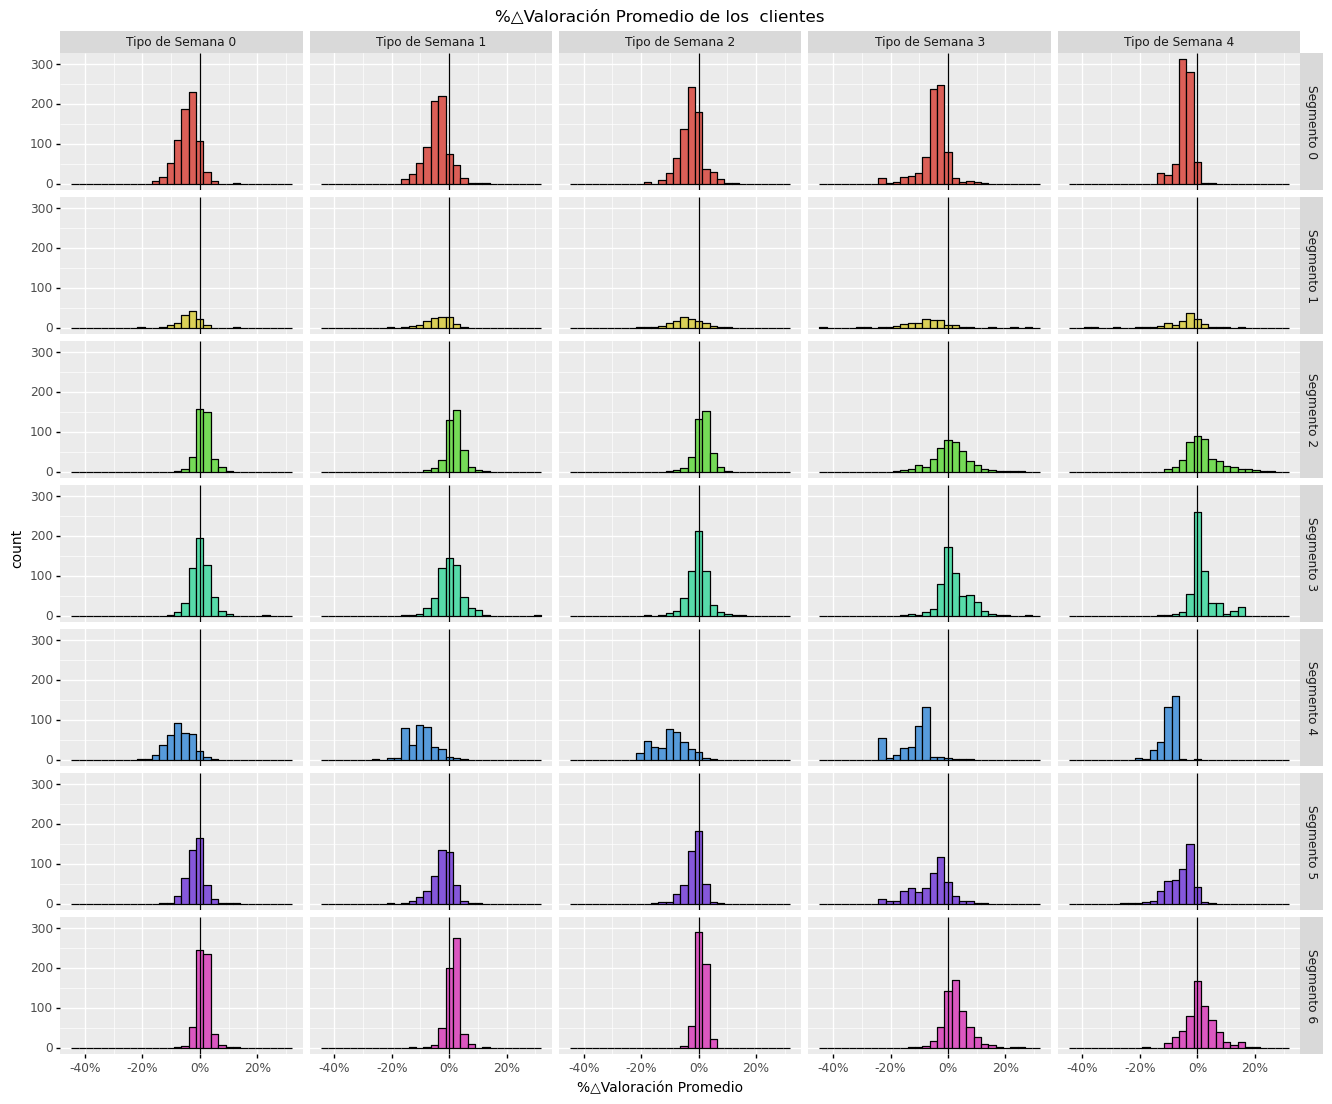

<ggplot: (142424290353)>

In [134]:
Graph_Hist_One=(
    ggplot(
    Df_mean
    ,aes(x='%△Valoración Promedio'
#          ,y=after_stat('width*density')
        ,fill='Segmento'
        # 'Tipo de Semana'
        ))
    
    #configuración histograma
    +geom_histogram(bins=30,alpha=1,color='black')
    # bins=30,alpha=1
    #Escala porcentual en X
     +scale_x_continuous(labels=percent_format())
    
    #Escala porcentual en X
#     + scale_y_continuous(labels=percent_format()) # display labels as a percentage
    
    + facet_grid('Segmento~Tipo de Semana')
#     Dimensiones de cada grafico
    +theme( 
            legend_position='none',
            figure_size=(16,13),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            title=element_text(size = 12))
    
#     +ylab('Porcentaje  de \n los '+ str(list_df[0].shape[0]) +' clientes')
#      +xlab('Ingresos en Miles de CLP')

#     Titulo de cada histograma
     +ggtitle('%△Valoración Promedio' +' de los  clientes')
    
+geom_vline(
    aes(xintercept = 0 )
    )

    )
Graph_Hist_One

In [135]:
Df_mean\
        .groupby(['Tipo de Semana','Segmento']).mean().round(2)

%△Valoración Promedio
Tipo de Semana   Segmento                         
Tipo de Semana 0 Segmento 0                  -0.04
                 Segmento 1                  -0.04
                 Segmento 2                   0.01
                 Segmento 3                   0.00
                 Segmento 4                  -0.07
                 Segmento 5                  -0.01
                 Segmento 6                   0.01
Tipo de Semana 1 Segmento 0                  -0.04
                 Segmento 1                  -0.04
                 Segmento 2                   0.02
                 Segmento 3                   0.00
                 Segmento 4                  -0.10
                 Segmento 5                  -0.02
                 Segmento 6                   0.01
Tipo de Semana 2 Segmento 0                  -0.03
                 Segmento 1                  -0.04
                 Segmento 2                   0.01
                 Segmento 3                  -0.00
                 Segmento 4                  -0.10
                 Segmento 5                  -0.02
                 Segmento 6                   0.01
Tipo de Semana 3 Segmento 0                  -0.05
                 Segmento 1                  -0.07
                 Segmento 2                   0.01
                 Segmento 3                   0.02
                 Segmento 4                  -0.12
                 Segmento 5                  -0.06
                 Segmento 6                   0.03
Tipo de Semana 4 Segmento 0                  -0.04
                 Segmento 1                  -0.04
                 Segmento 2                   0.02
                 Segmento 3                   0.02
                 Segmento 4                  -0.10
                 Segmento 5                  -0.06
                 Segmento 6                   0.01

In [136]:
for sem in Df_mean['Tipo de Semana'].unique():
    print(Df_mean[Df_mean['Tipo de Semana']==sem]\
        .groupby(['Tipo de Semana','Segmento']).mean().T.round(2).to_latex( float_format='{:,.2%}'.format))

\begin{tabular}{lrrrrrrr}
\toprule
Tipo de Semana & \multicolumn{7}{l}{Tipo de Semana 0} \\
Segmento &       Segmento 0 & Segmento 1 & Segmento 2 & Segmento 3 & Segmento 4 & Segmento 5 & Segmento 6 \\
\midrule
\%△Valoración Promedio &           -4.00\% &     -4.00\% &      1.00\% &      0.00\% &     -7.00\% &     -1.00\% &      1.00\% \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrrrr}
\toprule
Tipo de Semana & \multicolumn{7}{l}{Tipo de Semana 1} \\
Segmento &       Segmento 0 & Segmento 1 & Segmento 2 & Segmento 3 & Segmento 4 & Segmento 5 & Segmento 6 \\
\midrule
\%△Valoración Promedio &           -4.00\% &     -4.00\% &      2.00\% &      0.00\% &    -10.00\% &     -2.00\% &      1.00\% \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrrrr}
\toprule
Tipo de Semana & \multicolumn{7}{l}{Tipo de Semana 2} \\
Segmento &       Segmento 0 & Segmento 1 & Segmento 2 & Segmento 3 & Segmento 4 & Segmento 5 & Segmento 6 \\
\midrule
\%△Valoración Promedio &           -3.00\% &     -4.00\%

#### PDF Grafico una pag

In [137]:
# ```python
file_name=('One Histograma Val Client RFM_val')

# pngfill= Png_file_direct_Graphic_Canal_Material+"\\Cluster\\Val"
K_numbers=str(len(df_C_Customers.identified_clusters.unique()))
s_K_numbers='K_'+K_numbers
pngfill= Png_file_direct_Graphic_Canal_Material+"\\Cluster\\Val"#+"\\k_NUM\\"+s_K_numbers

start_time = time.time()
save_as_pdf_pages(
                    [Graph_Hist_One]
                    ,pngfill 
            +"\\"+ file_name + ".pdf")
time_convert(time.time()-start_time)
# ```

c:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\Cluster\Val\One Histograma Val Client RFM_val.pdf


Time Lapsed = 0:0:6.14758563041687 
 H:m:s


### Otro metodo de graficos

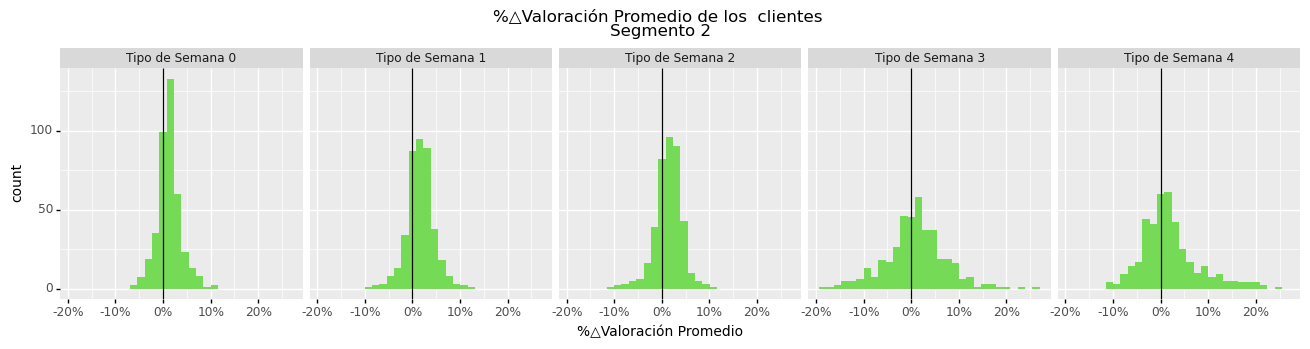

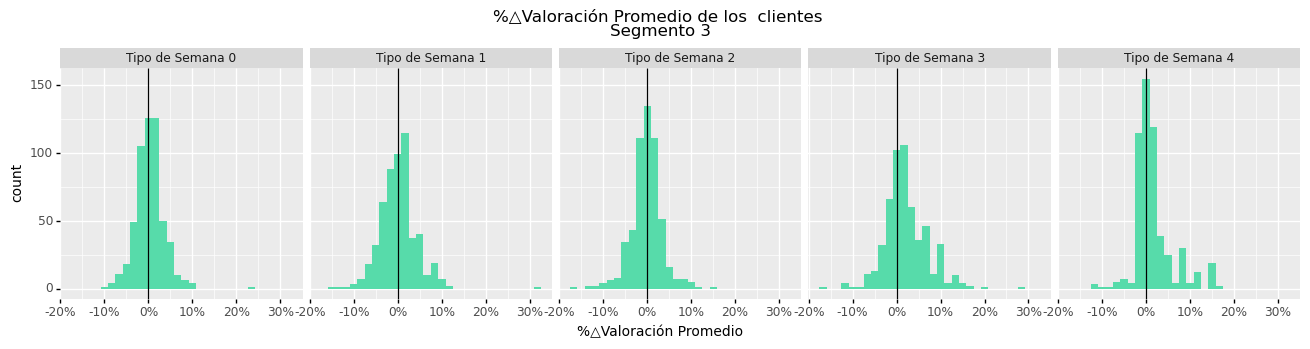

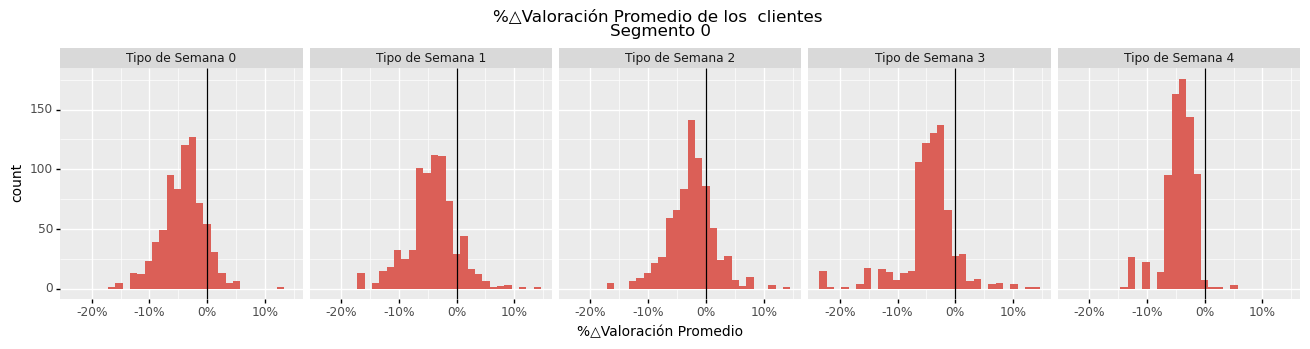

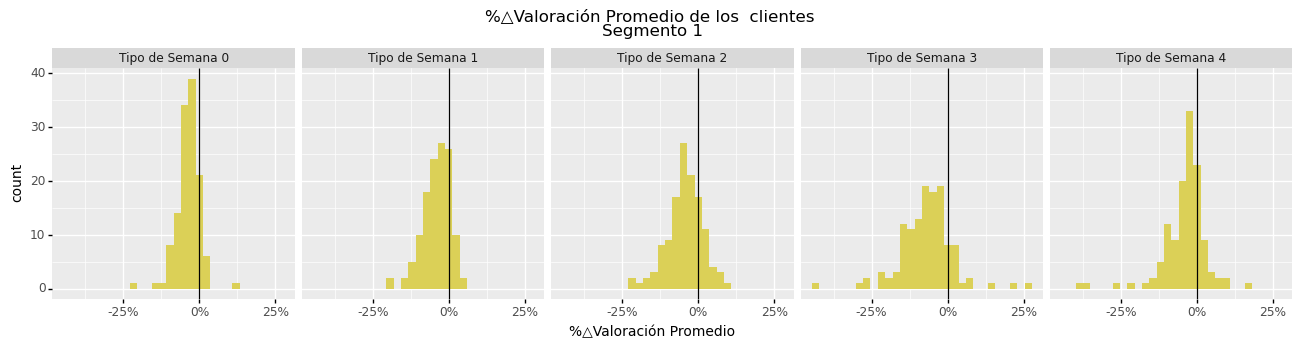

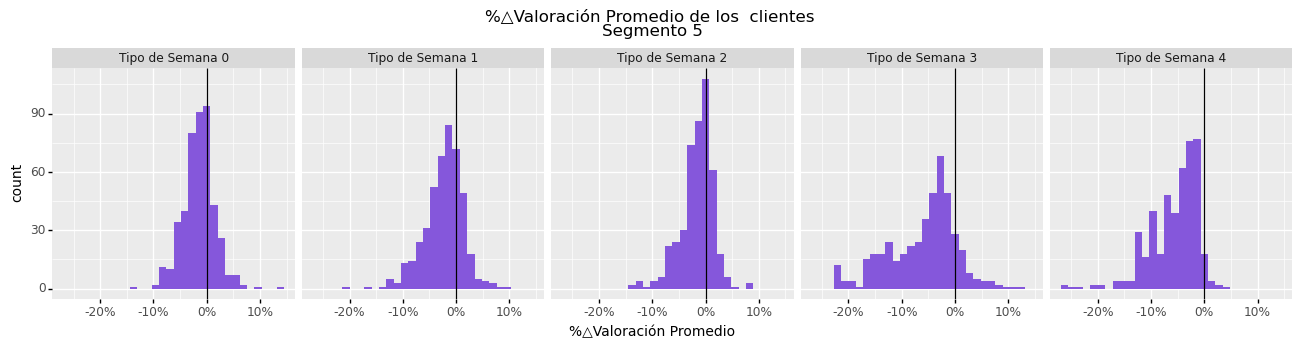

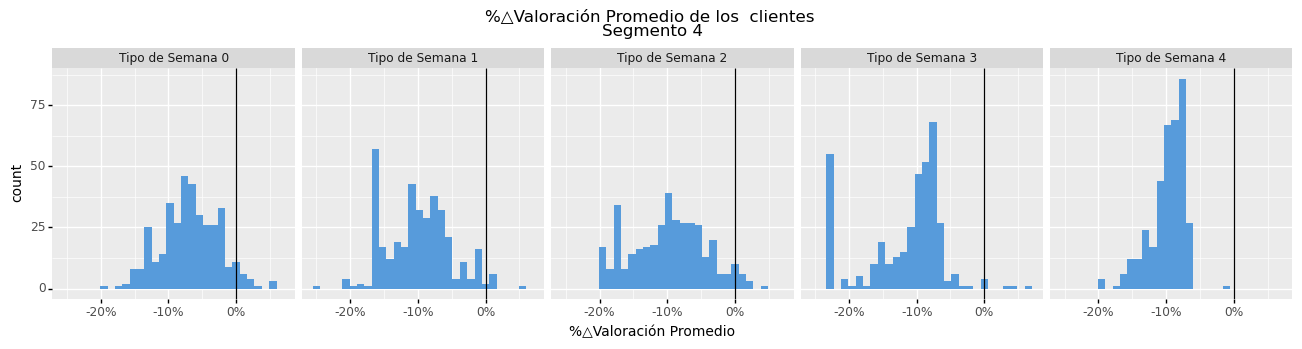

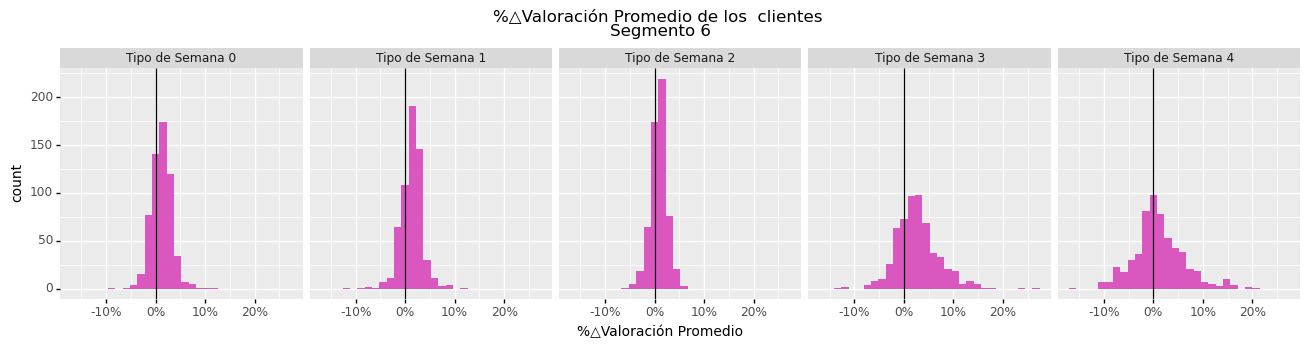

[<ggplot: (142423067377)>,
 <ggplot: (142423077654)>,
 <ggplot: (142423045617)>,
 <ggplot: (142423277243)>,
 <ggplot: (142423270663)>,
 <ggplot: (142423083159)>,
 <ggplot: (142423070455)>]

In [138]:
# Df_mean['Tip_sem_name']=Df_mean['Tipo de Semana'].apply(lambda x: 'Tipo de Semana '+ x )
# i_s='$F$ Alto, $M$ Media Alto'
Graph_Hist_Nan=[(
    ggplot(
    Df_mean[Df_mean.Segmento==i_s]
    ,aes(x='%△Valoración Promedio'
#          ,y=after_stat('width*density')
        ,fill='Segmento'
        # 'Tipo de Semana'
        ))
    
    #configuración histograma
    +geom_histogram( bins=30,alpha=1)
    # bins=30,alpha=1
    #Escala porcentual en X
     +scale_x_continuous(labels=percent_format())
    
    #Escala porcentual en X
#     + scale_y_continuous(labels=percent_format()) # display labels as a percentage
    
    + facet_grid('.~Tipo de Semana')
#     Dimensiones de cada grafico
    +theme( 
            legend_position='none',
            figure_size=(16,3),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            title=element_text(size = 12))
    
#     +ylab('Porcentaje  de \n los '+ str(list_df[0].shape[0]) +' clientes')
#      +xlab('Ingresos en Miles de CLP')

#     Titulo de cada histograma
     +ggtitle('%△Valoración Promedio' +' de los  clientes \n'+i_s)
    
    +geom_vline(
    aes(xintercept = 0 )
    )
    )
for i_s in Df_mean.Segmento.unique()]

Graph_Hist_Nan

In [139]:
i=Df_mean['Tipo de Semana'].unique()[0]
list_df=[ Df_mean[Df_mean['Tipo de Semana']==i]
         for i in np.sort(Df_mean['Tipo de Semana'].unique())
        ]

list_Xcol=['%△Valoración Promedio' 
           for i in range(len (list_df))]

List_Colores=['#1F77B4', '#DB6061','#57DB5F','#FF7E0D', '#B266FF']

List_Title=[  '%△Valoración Promedio' +' de los  \n clientes en el '+i
         for i in np.sort(Df_mean['Tipo de Semana'].unique())]

In [140]:
list_df[1]

Cliente  %△Valoración Promedio    Tipo de Semana    Segmento
1      10007508               0.018077  Tipo de Semana 1  Segmento 2
6      10017269               0.019898  Tipo de Semana 1  Segmento 3
11     10023880               0.052141  Tipo de Semana 1  Segmento 3
16     10028999              -0.050272  Tipo de Semana 1  Segmento 0
21     10032204              -0.067572  Tipo de Semana 1  Segmento 0
...         ...                    ...               ...         ...
16086   9988772              -0.066843  Tipo de Semana 1  Segmento 0
16091   9991757               0.001673  Tipo de Semana 1  Segmento 2
16096   9992154              -0.015503  Tipo de Semana 1  Segmento 6
16101   9993925               0.030315  Tipo de Semana 1  Segmento 2
16106   9994662               0.014395  Tipo de Semana 1  Segmento 0

[3222 rows x 4 columns]

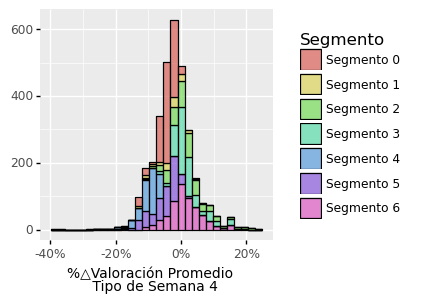

<ggplot: (142424354783)>

In [141]:
(
    
    ggplot(
    Df_C
    ,aes(x= col_Val[4]
        #  ,y=after_stat('width*density')
         ,fill='Segmento'
        ))
    
    #configuración histograma
    +geom_histogram(#fill=List_Colores[3],
                    bins=30,alpha=0.7,color='black')
    #Escala porcentual en X
     +scale_x_continuous(labels=percent_format())
    
    
#     Estiqueta en el eje Y
    # +ylab('Porcentaje  de \n los '+ str(list_df[3].shape[0]) +' clientes')
    +ylab(''
        # 'Porcentaje de los clientes'
        )
#      +xlab('Ingresos en Miles de CLP')
    
#     Titulo de cada histograma
    #  +ggtitle(List_Title[3].split(' \n ')[1])
    
    #Escala porcentual en X
    # + scale_y_continuous(labels=percent_format()) # display labels as a percentage
    
#     Dimensiones de cada grafico
    +theme(#axis_text_x = element_text(angle=90, hjust=1),
           figure_size=(3,3),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            title=element_text(size = 12)
            # ,legend_position='none'
    )#theme
    
 )

In [142]:
list_histo_val=[]
# i=0
list_histo_val.append(
    
    ggplot(
    Df_C
    ,aes(x= col_Val[0]
        #  ,y=after_stat('width*density')
         ,fill='Segmento'
        ))
    
    #configuración histograma
    +geom_histogram(#fill=List_Colores[i],
                    bins=30,alpha=1)
    #Escala porcentual en X
     +scale_x_continuous(labels=percent_format())
    
    
#     Estiqueta en el eje Y
    +ylab('Cantidad de clientes')
    # +ylab('Porcentaje  de \n los '+ str(list_df[i].shape[0]) +' clientes')
#      +xlab('Ingresos en Miles de CLP')
    
#     Titulo de cada histograma
    #  +ggtitle(List_Title[i].split(' \n ')[1])
    
    #Escala porcentual en X
    # + scale_y_continuous(labels=percent_format()) # display labels as a percentage
    
#     Dimensiones de cada grafico
    +theme(#axis_text_x = element_text(angle=90, hjust=1),
           figure_size=(3,3),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            title=element_text(size = 12)
            ,legend_position='none'
    )#theme
    
 )
for i in [1,2,3]:
    list_histo_val.append(
    
    ggplot(
    Df_C
    ,aes(x= col_Val[i]
        #  ,y=after_stat('width*density')
         ,fill='Segmento'
        ))
    
    #configuración histograma
    +geom_histogram(#fill=List_Colores[i],
                    bins=30,alpha=1)
    #Escala porcentual en X
     +scale_x_continuous(labels=percent_format())
    
    
#     Estiqueta en el eje Y
    +ylab('')
    # +ylab('Porcentaje  de \n los '+ str(list_df[i].shape[0]) +' clientes')
#      +xlab('Ingresos en Miles de CLP')
    
#     Titulo de cada histograma
    #  +ggtitle(List_Title[i].split(' \n ')[1])
    
    #Escala porcentual en X
    # + scale_y_continuous(labels=percent_format()) # display labels as a percentage
    
#     Dimensiones de cada grafico
    +theme(#axis_text_x = element_text(angle=90, hjust=1),
           figure_size=(3,3),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            title=element_text(size = 12)
            ,legend_position='none'
    )#theme
    
 )
#  for i in range(len(col_Val)-1)]#len(list_df)


list_histo_val.append(
(
    
    ggplot(
    Df_C
    ,aes(x= col_Val[4]
        #  ,y=after_stat('width*density')
         ,fill='Segmento'
        ))
    
    #configuración histograma
    +geom_histogram(#fill=List_Colores[3],
                    bins=30,alpha=1)
    #Escala porcentual en X
     +scale_x_continuous(labels=percent_format())
    
    
#     Estiqueta en el eje Y
    # +ylab('Porcentaje  de \n los '+ str(list_df[3].shape[0]) +' clientes')
    +ylab(''
        # 'Porcentaje de los clientes'
        )
#      +xlab('Ingresos en Miles de CLP')
    
#     Titulo de cada histograma
    #  +ggtitle(List_Title[3].split(' \n ')[1])
    
    #Escala porcentual en X
    # + scale_y_continuous(labels=percent_format()) # display labels as a percentage
    
#     Dimensiones de cada grafico
    +theme(#axis_text_x = element_text(angle=90, hjust=1),
           figure_size=(3,3),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            title=element_text(size = 12)
            # ,legend_position='none'
    )#theme
    
 )

 )

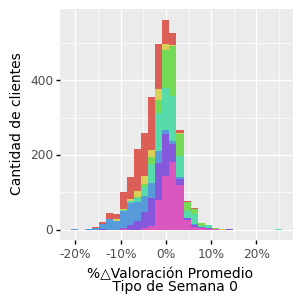

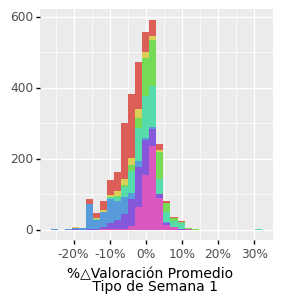

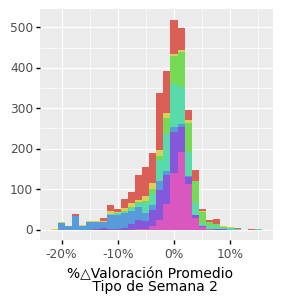

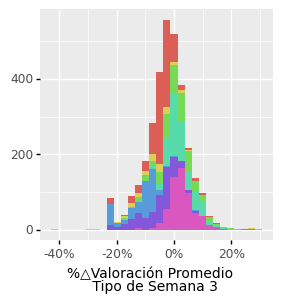

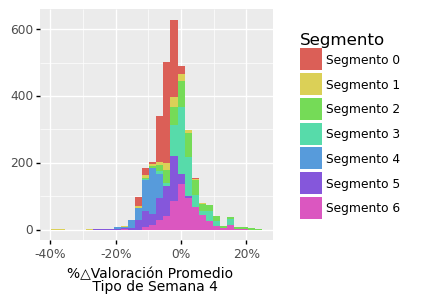

[<ggplot: (142424426204)>,
 <ggplot: (142424423488)>,
 <ggplot: (142424476148)>,
 <ggplot: (142424481455)>,
 <ggplot: (142424470754)>]

In [143]:
list_histo_val

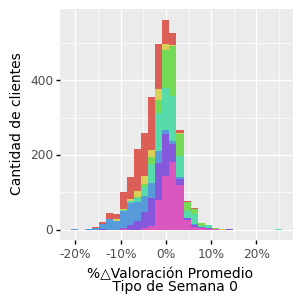

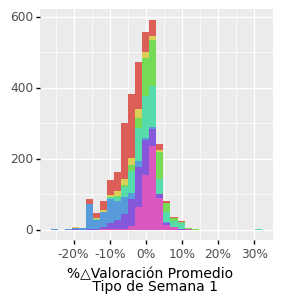

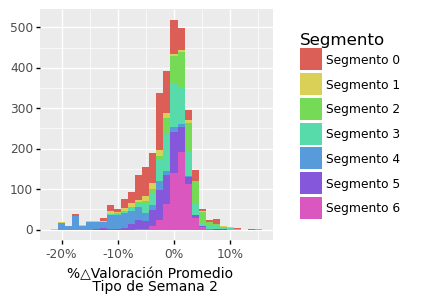

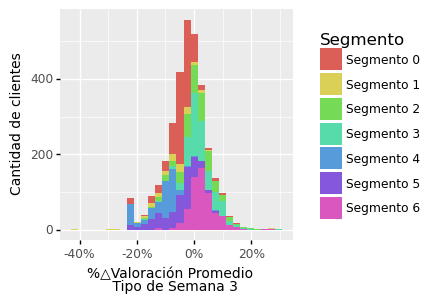

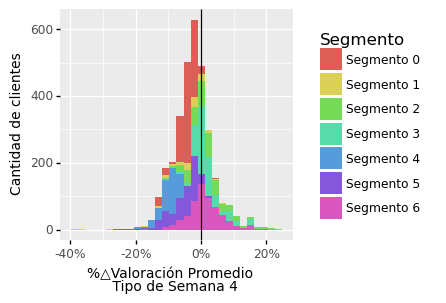

[<ggplot: (142423598824)>,
 <ggplot: (142424547091)>,
 <ggplot: (142417785751)>,
 <ggplot: (142423340081)>,
 <ggplot: (142425144507)>]

In [144]:
list_histo_val=[]
# i=0
list_histo_val.append(
    
    ggplot(
    Df_C
    ,aes(x= col_Val[0]
        #  ,y=after_stat('width*density')
         ,fill='Segmento'
        ))
    
    #configuración histograma
    +geom_histogram(#fill=List_Colores[i],
                    bins=30,alpha=1)
    #Escala porcentual en X
     +scale_x_continuous(labels=percent_format())
    
    
#     Estiqueta en el eje Y
    +ylab('Cantidad de clientes')
  
    
#     Dimensiones de cada grafico
    +theme(#axis_text_x = element_text(angle=90, hjust=1),
           figure_size=(3,3),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            title=element_text(size = 12)
            ,legend_position='none'
    )#theme
    
 )
list_histo_val.append(
    
    ggplot(
    Df_C
    ,aes(x= col_Val[1]
        #  ,y=after_stat('width*density')
         ,fill='Segmento'
        ))
    
    #configuración histograma
    +geom_histogram(#fill=List_Colores[i],
                    bins=30,alpha=1)
    #Escala porcentual en X
     +scale_x_continuous(labels=percent_format())
    
    
#     Estiqueta en el eje Y
    +ylab('')
    
#     Dimensiones de cada grafico
    +theme(#axis_text_x = element_text(angle=90, hjust=1),
           figure_size=(3,3),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            title=element_text(size = 12)
            ,legend_position='none'
    )#theme
    
 )

# -------------------------------------------------------------
list_histo_val.append(
    
    ggplot(
    Df_C
    ,aes(x= col_Val[2]
        #  ,y=after_stat('width*density')
         ,fill='Segmento'
        ))
    
    #configuración histograma
    +geom_histogram(#fill=List_Colores[i],
                    bins=30,alpha=1)
    #Escala porcentual en X
     +scale_x_continuous(labels=percent_format())
    
    
#     Estiqueta en el eje Y
    +ylab('')
    
#     Dimensiones de cada grafico
    +theme(#axis_text_x = element_text(angle=90, hjust=1),
           figure_size=(3,3),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            title=element_text(size = 12)
            # ,legend_position='none'
    )#theme
    
 )


list_histo_val.append(
(
    
    ggplot(
    Df_C
    ,aes(x= col_Val[3]
        #  ,y=after_stat('width*density')
         ,fill='Segmento'
        ))
    
    #configuración histograma
    +geom_histogram(#fill=List_Colores[3],
                    bins=30,alpha=1)
    #Escala porcentual en X
     +scale_x_continuous(labels=percent_format())
    
    
#     Estiqueta en el eje Y
    # +ylab('Porcentaje  de \n los '+ str(list_df[3].shape[0]) +' clientes')
    +ylab('Cantidad de clientes')
#      +xlab('Ingresos en Miles de CLP')
    
#     Titulo de cada histograma
    #  +ggtitle(List_Title[3].split(' \n ')[1])
    
    #Escala porcentual en X
    # + scale_y_continuous(labels=percent_format()) # display labels as a percentage
    
#     Dimensiones de cada grafico
    +theme(#axis_text_x = element_text(angle=90, hjust=1),
           figure_size=(3,3),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            title=element_text(size = 12)
            # ,legend_position='none'
    )#theme
    
 )
 )
#  ----------------------------------------------------------------------------------------
list_histo_val.append(
(
    
    ggplot(
    Df_C
    ,aes(x= col_Val[4]
        #  ,y=after_stat('width*density')
         ,fill='Segmento'
        ))
    
    #configuración histograma
    +geom_histogram(#fill=List_Colores[3],
                    bins=30,alpha=1)
    #Escala porcentual en X
     +scale_x_continuous(labels=percent_format())
    
    
#     Estiqueta en el eje Y
    # +ylab('Porcentaje  de \n los '+ str(list_df[3].shape[0]) +' clientes')
    +ylab('Cantidad de clientes')
#      +xlab('Ingresos en Miles de CLP')
    
#     Titulo de cada histograma
    #  +ggtitle(List_Title[3].split(' \n ')[1])
    
    #Escala porcentual en X
    # + scale_y_continuous(labels=percent_format()) # display labels as a percentage
    
#     Dimensiones de cada grafico
    +theme(#axis_text_x = element_text(angle=90, hjust=1),
           figure_size=(3,3),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            title=element_text(size = 12)
            # ,legend_position='none'
    )#theme
    +geom_vline(
    aes(xintercept = 0 )
    )
 )

 )
list_histo_val

#### PDF 

In [145]:
# ```python
file_name=('Histograma Val Client RFM_val')

# pngfill= Png_file_direct_Graphic_Canal_Material+"\\Cluster\\Val"
K_numbers=str(len(df_C_Customers.identified_clusters.unique()))
s_K_numbers='K_'+K_numbers
pngfill= Png_file_direct_Graphic_Canal_Material+"\\Cluster\\Val"#+"\\k_NUM\\"+s_K_numbers

start_time = time.time()
save_as_pdf_pages(
                    list_histo_val
                    ,pngfill 
            +"\\"+ file_name + ".pdf")
time_convert(time.time()-start_time)
# ```

c:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\Cluster\Val\Histograma Val Client RFM_val.pdf


Time Lapsed = 0:0:1.8096435070037842 
 H:m:s


## KG Boxplot

### Kg Fact

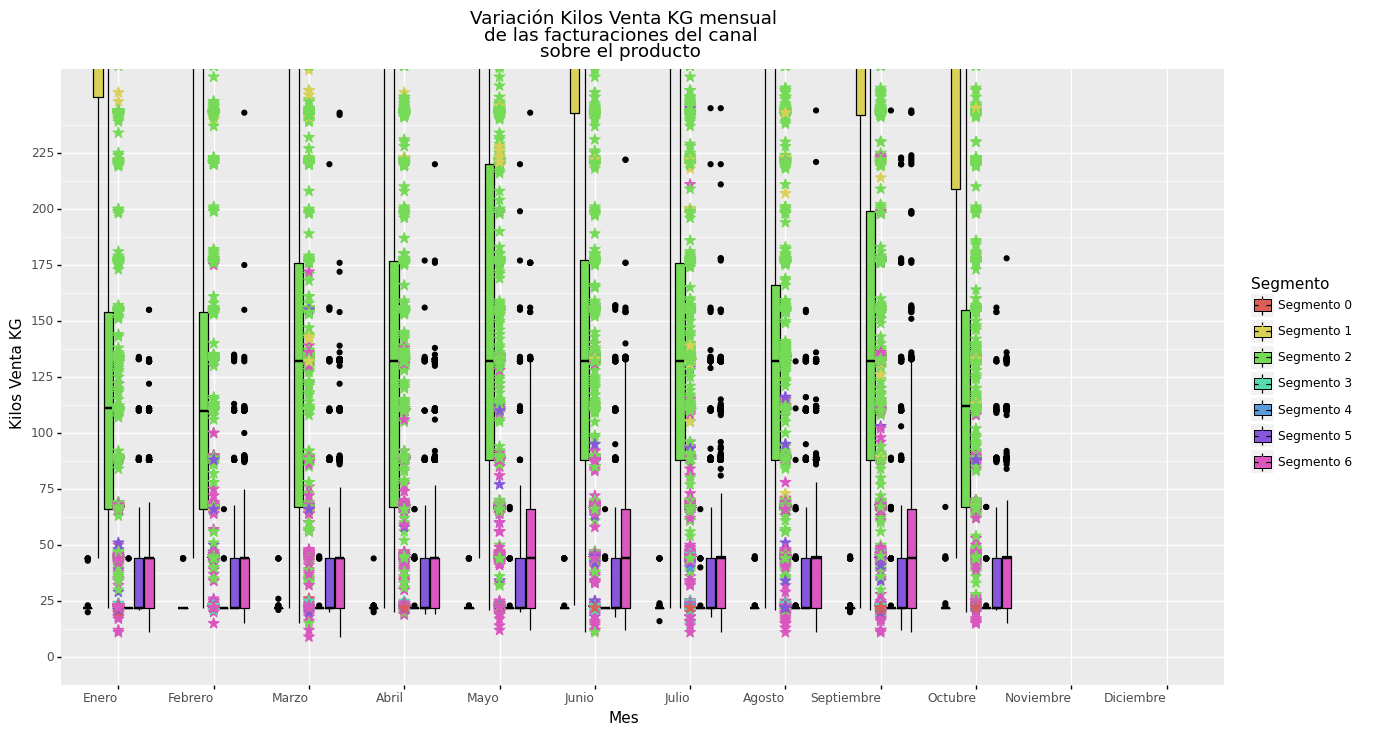

<ggplot: (142414581800)>

In [146]:
# +coord_cartesian(ylim = [0,250])
# Y_Graph='Kilos Venta KG'
X_G='Mes'
# 'Mes_num'
Y_G='Kilos Venta KG'
Fill_G='Segmento'
Color_G='Segmento'
Shape_G='Segmento'


Año_G='2021'

Col_G=[Y_G]


df_G=\
R_FM_Func.data_Norm_satandar(
                (R_FM_Func.data_ln( df_fac_copy\
                    [df_fac_copy.Año==Año_G].copy()
                    ,Col_G
                    ,False
                    ))
                    ,[Y_G+' (Escala ln)']
                    ,False
)

# df_G= df_fac_copy\
#     [df_fac_copy.Año==Año_G].copy()

df_G['Mes_num']=\
        df_G.Mes.apply(lambda x: Month_NUM_dic[x])

Graph_KG_mes=(
ggplot(
    df_G
    ,aes(
        x=X_G
        ,y= Y_G
        #  +' (Escala ln)'+' (Normalizado)'
         
        ,color=Color_G,
        fill=Fill_G
    ))

# +facet_grid('Segmento~.')


+ geom_boxplot(color='black')
    
+ geom_point(df_G
             ,shape='*',
             size=4)
             #,
             #fill=df['Año'],
             #color='black')#df['Año'])

+ggtitle('Variación '+ Y_G + ' mensual' +'\n'
      +'de las facturaciones del canal '+'\n'
      +'sobre el producto '
              )

+coord_cartesian(ylim = [0,250])
    
+scale_y_continuous(#limits=(0,250),
                    breaks=range(0,250,25))
    
    
+theme(axis_text_x = element_text(hjust=1),figure_size=(15,8))

+scale_x_discrete(limits= ['Enero','Febrero','Marzo','Abril',
'Mayo','Junio','Julio','Agosto',
'Septiembre','Octubre',
'Noviembre','Diciembre'])

)

#+ggtitle
# print('El poducto de estudio es '+ + ' sobre el canal '+ Tipo_de_Cliente
#              +'\n variacion de '+'las facturaciones del ' +Y_G + ' mensual')
Graph_KG_mes

### Kg Promedio cliente

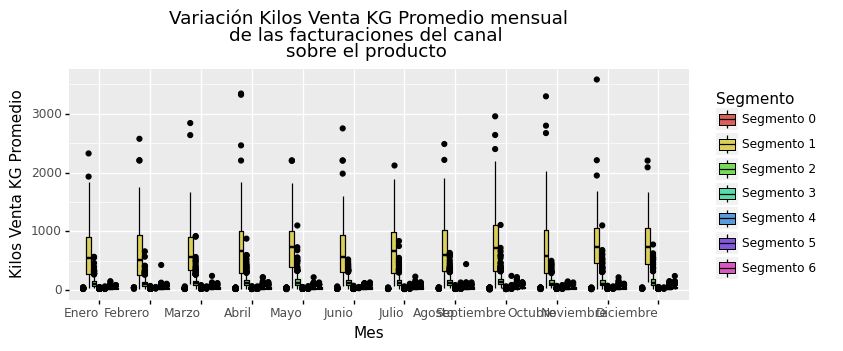

<ggplot: (142423213343)>

In [147]:
# Grafico sin margenes
# Y_Graph='Kilos Venta KG'
X_G='Mes'
# 'Mes_num'
Y_G='Kilos Venta KG Promedio'
# 'Kilos Venta KG'
Fill_G='Segmento'
Color_G='Segmento'
Shape_G='Segmento'


Año_G='2021'

Col_G=[Y_G]


df_G=\
df_G_H_clietes.copy()
# R_FM_Func.data_Norm_satandar(
#                 (R_FM_Func.data_ln( df_G_A_clietes
#                     # [df_fac_copy.Año==Año_G].copy()
#                     ,Col_G
#                     ,False
#                     ))
#                     ,[Y_G+' (Escala ln)']
#                     ,False
# )

# df_G= df_fac_copy\
#     [df_fac_copy.Año==Año_G].copy()

df_G['Mes_num']=\
        df_G.Mes.apply(lambda x: Month_NUM_dic[x])

Graph_KG_mes=(
ggplot(
    df_G
    ,aes(
        x=X_G
        ,y= Y_G
        #  +' (Escala ln)'+' (Normalizado)'
         
        ,color=Color_G,
        fill=Fill_G
    ))

# +facet_grid('Año~.')


+ geom_boxplot(color='black')
    
# + geom_point(df_G
#              ,shape='*',
#              size=4)
#              #,
#              #fill=df['Año'],
#              #color='black')#df['Año'])

+ggtitle('Variación '+ Y_G + ' mensual' +'\n'
      +'de las facturaciones del canal '+'\n'
      +'sobre el producto '
              )

# +coord_cartesian(ylim = [0,250])
    
# +scale_y_continuous(limits=(0,250), breaks=range(0,250,25))
    
    
+theme(axis_text_x = element_text(hjust=1),figure_size=(8,3))

+scale_x_discrete(limits= ['Enero','Febrero','Marzo','Abril',
'Mayo','Junio','Julio','Agosto',
'Septiembre','Octubre',
'Noviembre','Diciembre'])

)

#+ggtitle
# print('El poducto de estudio es '+ + ' sobre el canal '+ Tipo_de_Cliente
#              +'\n variacion de '+'las facturaciones del ' +Y_G + ' mensual')
Graph_KG_mes

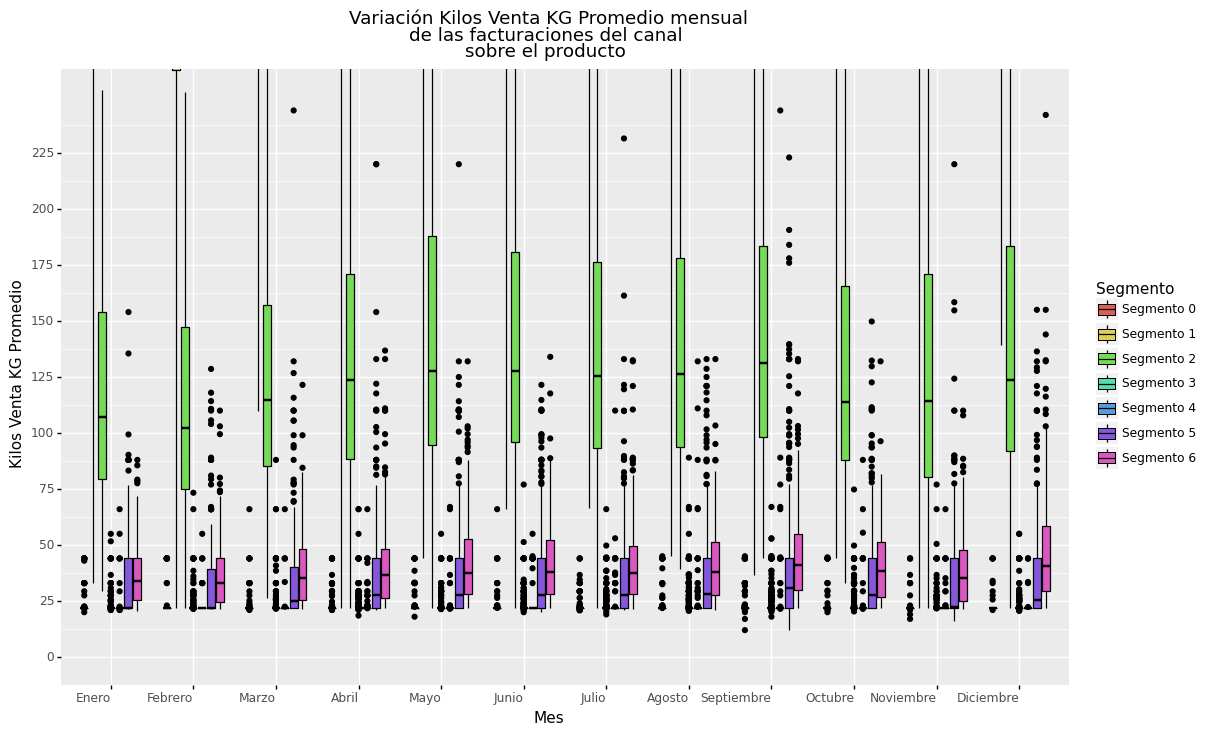

<ggplot: (142417758931)>

In [148]:
# +coord_cartesian(ylim = [0,250])
# Y_Graph='Kilos Venta KG'
X_G='Mes'
# 'Mes_num'
Y_G='Kilos Venta KG Promedio'
# 'Kilos Venta KG'
Fill_G='Segmento'
Color_G='Segmento'
Shape_G='Segmento'


Año_G='2021'

Col_G=[Y_G]


df_G=\
df_G_H_clietes.copy()
# R_FM_Func.data_Norm_satandar(
#                 (R_FM_Func.data_ln( df_G_A_clietes
#                     # [df_fac_copy.Año==Año_G].copy()
#                     ,Col_G
#                     ,False
#                     ))
#                     ,[Y_G+' (Escala ln)']
#                     ,False
# )

# df_G= df_fac_copy\
#     [df_fac_copy.Año==Año_G].copy()

df_G['Mes_num']=\
        df_G.Mes.apply(lambda x: Month_NUM_dic[x])

Graph_KG_mes=(
ggplot(
    df_G
    ,aes(
        x=X_G
        ,y= Y_G
        #  +' (Escala ln)'+' (Normalizado)'
         
        ,color=Color_G,
        fill=Fill_G
    ))

# +facet_grid('Año~.')


+ geom_boxplot(color='black')
    
# + geom_point(df_G
#              ,shape='*',
#              size=4)
#              #,
#              #fill=df['Año'],
#              #color='black')#df['Año'])

+ggtitle('Variación '+ Y_G + ' mensual' +'\n'
      +'de las facturaciones del canal '+'\n'
      +'sobre el producto '
              )

+coord_cartesian(ylim = [0,250])
    
+scale_y_continuous(
# # limits=(0,250), 
breaks=range(0,250,25))
    
    
+theme(axis_text_x = element_text(hjust=1),figure_size=(13,8))

+scale_x_discrete(limits= ['Enero','Febrero','Marzo','Abril',
'Mayo','Junio','Julio','Agosto',
'Septiembre','Octubre',
'Noviembre','Diciembre'])

)

#+ggtitle
# print('El poducto de estudio es '+ + ' sobre el canal '+ Tipo_de_Cliente
#              +'\n variacion de '+'las facturaciones del ' +Y_G + ' mensual')
Graph_KG_mes

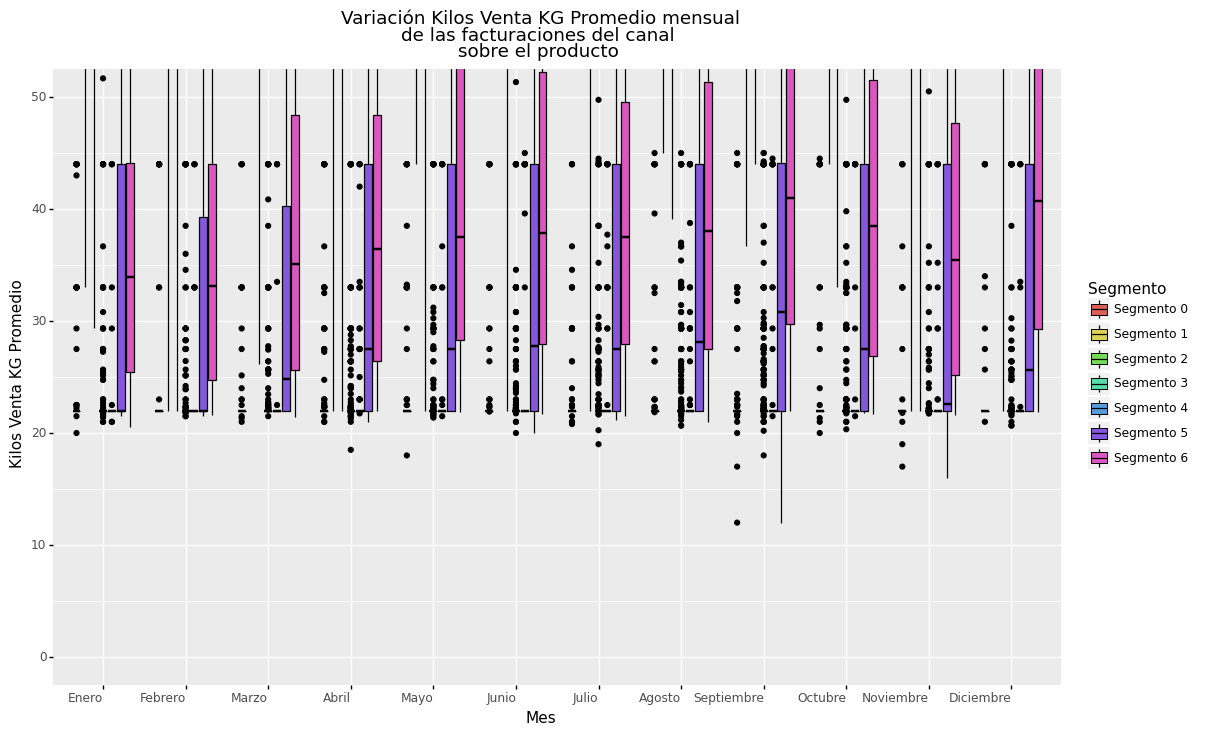

<ggplot: (142423186815)>

In [149]:
# s=data_i['Material (Nombre)'].unique()[0]
# Y_Graph='Kilos Venta KG'
X_G='Mes'
# 'Mes_num'
Y_G='Kilos Venta KG Promedio'
# 'Kilos Venta KG'
Fill_G='Segmento'
Color_G='Segmento'
Shape_G='Segmento'


Año_G='2021'

Col_G=[Y_G]


df_G=\
df_G_H_clietes.copy()
# R_FM_Func.data_Norm_satandar(
#                 (R_FM_Func.data_ln( df_G_A_clietes
#                     # [df_fac_copy.Año==Año_G].copy()
#                     ,Col_G
#                     ,False
#                     ))
#                     ,[Y_G+' (Escala ln)']
#                     ,False
# )

# df_G= df_fac_copy\
#     [df_fac_copy.Año==Año_G].copy()

df_G['Mes_num']=\
        df_G.Mes.apply(lambda x: Month_NUM_dic[x])

Graph_KG_mes=(
ggplot(
    df_G
    ,aes(
        x=X_G
        ,y= Y_G
        #  +' (Escala ln)'+' (Normalizado)'
         
        ,color=Color_G,
        fill=Fill_G
    ))

# +facet_grid('Año~.')


+ geom_boxplot(color='black')
    
# + geom_point(df_G
#              ,shape='*',
#              size=4)
#              #,
#              #fill=df['Año'],
#              #color='black')#df['Año'])

+ggtitle('Variación '+ Y_G + ' mensual' +'\n'
      +'de las facturaciones del canal '+'\n'
      +'sobre el producto '
              )

+coord_cartesian(ylim = [0,50])
    
# +scale_y_continuous(
# # # limits=(0,250), 
# breaks=range(0,250,25))
    
    
+theme(axis_text_x = element_text(hjust=1),figure_size=(13,8))

+scale_x_discrete(limits= ['Enero','Febrero','Marzo','Abril',
'Mayo','Junio','Julio','Agosto',
'Septiembre','Octubre',
'Noviembre','Diciembre'])

)

#+ggtitle
# print('El poducto de estudio es '+ + ' sobre el canal '+ Tipo_de_Cliente
#              +'\n variacion de '+'las facturaciones del ' +Y_G + ' mensual')
Graph_KG_mes

## Precio Boxplot

### Precio Fact

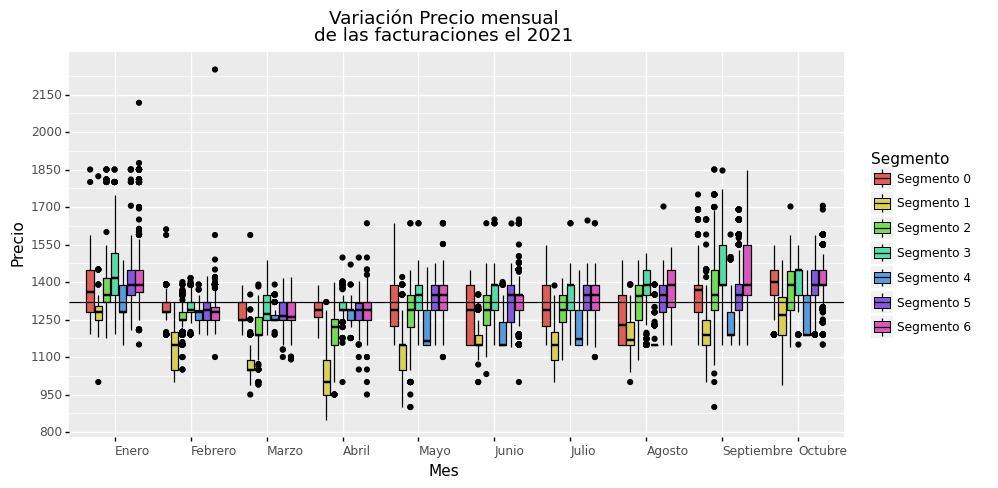

[<ggplot: (142419595192)>]

In [150]:
# +coord_cartesian(ylim = [0,250])
# Y_Graph='Kilos Venta KG'
X_G='Mes'
# 'Mes_num'
Y_G='Precio'
Fill_G='Segmento'
Color_G='Segmento'
Shape_G='Segmento'


Año_G='2021'

Col_G=[Y_G]


df_G=\
R_FM_Func.data_Norm_satandar(
                (R_FM_Func.data_ln( df_fac_copy\
                    [df_fac_copy.Año==Año_G].copy()
                    ,Col_G
                    ,False
                    ))
                    ,[Y_G+' (Escala ln)']
                    ,False
)

# df_G= df_fac_copy\
#     [df_fac_copy.Año==Año_G].copy()

df_G['Mes_num']=\
        df_G.Mes.apply(lambda x: Month_NUM_dic[x])
Graph_Precio_mes=[]
Graph_Precio_mes.append(
ggplot(
    df_G
    ,aes(
        x=X_G
        ,y= Y_G
        #  +' (Escala ln)'+' (Normalizado)'
         
        ,color=Color_G,
        fill=Fill_G
    ))

# +facet_grid('Segmento~.')


+ geom_boxplot(color='black')
    
# + geom_point(df_G
#              ,shape='*',
#              size=4)
#              #,
#              #fill=df['Año'],
#              #color='black')#df['Año'])

+ggtitle('Variación '+ Y_G + ' mensual' +'\n'
      +'de las facturaciones el 2021'
              )

# +coord_cartesian(ylim = [0,250])
    
# +scale_y_continuous(#limits=(0,250),
#                     breaks=range(0,250,25))
    
    
+theme(axis_text_x = element_text(hjust=0),figure_size=(10,5))

+scale_x_discrete(limits= ['Enero','Febrero','Marzo','Abril',
'Mayo','Junio','Julio','Agosto',
'Septiembre','Octubre',
# 'Noviembre','Diciembre'
])


# +coord_cartesian(ylim = [0,2000])
+scale_y_continuous( breaks=range(350,2300,150))


+geom_hline(
    aes(yintercept = df_G[Y_G].mean())
    )

# 'Promedio: '+ str
# +geom_text(
#             label= ( (round( df_G[Y_G].mean(),0)))
#             ,y=df_G[Y_G].mean()
#             # ,x= 'Enero'
#             # vjust=-1,
#             ,color='black',size=9)


)

#+ggtitle
# print('El poducto de estudio es '+ + ' sobre el canal '+ Tipo_de_Cliente
#              +'\n variacion de '+'las facturaciones del ' +Y_G + ' mensual')
Graph_Precio_mes

### Precio Promedio cliente

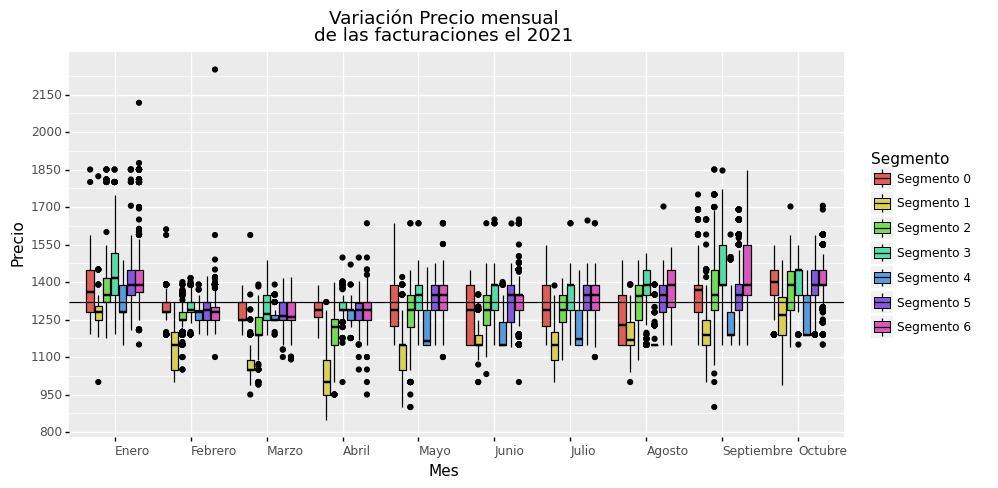

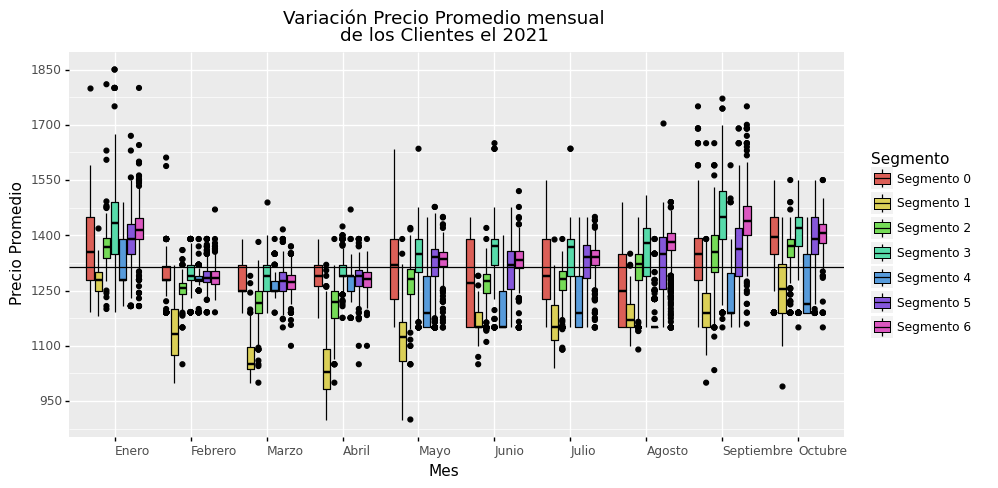

[<ggplot: (142419595192)>, <ggplot: (142423223763)>]

In [151]:
# +coord_cartesian(ylim = [0,250])
# Y_Graph='Kilos Venta KG'
X_G='Mes'
# 'Mes_num'
Y_G='Precio'+' Promedio'
Fill_G='Segmento'
Color_G='Segmento'
Shape_G='Segmento'


Año_G='2021'

Col_G=[Y_G]


df_G=\
df_G_A_clietes[
df_G_A_clietes.Año==Año_G
].copy()

# df_G= df_fac_copy\
#     [df_fac_copy.Año==Año_G].copy()

df_G['Mes_num']=\
        df_G.Mes.apply(lambda x: Month_NUM_dic[x])

Graph_Precio_mes.append(
ggplot(
    df_G
    ,aes(
        x=X_G
        ,y= Y_G
        #  +' (Escala ln)'+' (Normalizado)'
         
        ,color=Color_G,
        fill=Fill_G
    ))

# +facet_grid('Segmento~.')


+ geom_boxplot(color='black')
    
# + geom_point(df_G
#              ,shape='*',
#              size=4)
#              #,
#              #fill=df['Año'],
#              #color='black')#df['Año'])

+ggtitle('Variación '+ Y_G + ' mensual' +'\n'
      +'de los Clientes el 2021'
              )

    
+theme(axis_text_x = element_text(hjust=0),figure_size=(10,5))

+scale_x_discrete(limits= ['Enero','Febrero','Marzo','Abril',
'Mayo','Junio','Julio','Agosto',
'Septiembre','Octubre'
# ,'Noviembre','Diciembre'
])


# +coord_cartesian(ylim = [0,2000])
+scale_y_continuous( breaks=range(350,2300,150))


+geom_hline(
    aes(yintercept = df_G[Y_G].mean())
    )

# 'Promedio: '+ str
# +geom_text(
#             label= ( (round( df_G[Y_G].mean(),0)))
#             ,y=df_G[Y_G].mean()
#             # ,x= 'Enero'
#             # vjust=-1,
#             ,color='black',size=9)

)

#+ggtitle
# print('El poducto de estudio es '+ + ' sobre el canal '+ Tipo_de_Cliente
#              +'\n variacion de '+'las facturaciones del ' +Y_G + ' mensual')
Graph_Precio_mes

### SAVE Boxplot

In [152]:
# ```python
#============================
# W_F y W_F con la dispersion de los clusters generados
#============================
file_name=('Boxplot Precio Promedio 2021 Cluster Mes RFM_val')
    
# pngfill= Png_file_direct_Graphic_Canal_Material+"\\Cluster\\Val"
K_numbers=str(len(df_C_Customers.identified_clusters.unique()))
s_K_numbers='K_'+K_numbers
pngfill= Png_file_direct_Graphic_Canal_Material+"\\Cluster\\Val"#+"\\k_NUM\\"+s_K_numbers

start_time = time.time()
save_as_pdf_pages(
                  
                  Graph_Precio_mes
                    ,pngfill 
            +"\\"+ file_name + ".pdf")
time_convert(time.time()-start_time)
# ```

c:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\Cluster\Val\Boxplot Precio Promedio 2021 Cluster Mes RFM_val.pdf


Time Lapsed = 0:0:9.564689874649048 
 H:m:s


# Puntuación del cluster


## Ridge Regresion

Se busca considerar el coeficiente que acompaña a cada segmento de clientes, para decidir que segmento es el que representa un aumento del precio

R+FM

In [153]:
data_rfm
for a in R_FM_Customers.keys():
    print(R_FM_Func.Func_log_log_Tip_ind_cluster(pd.merge(R_FM_Customers[a],data_rfm,how='left'),True))

(0.487, 0.478)
(0.485, 0.487)
(0.584, 0.611)


Clusters con más Atributos

In [154]:
# Atributos a consideras ademas de los de R+FM
Col_Ajuste_otras_var=[
        '%△Valoración Promedio \n Tipo de Semana 0 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 1 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 2 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 3 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 4 (Normalizado)',

        # 'Kilos Venta KG Promedio \n Tipo de Semana 0 (Escala ln) (Normalizado)',
        # 'Kilos Venta KG Promedio \n Tipo de Semana 1 (Escala ln) (Normalizado)',
        # 'Kilos Venta KG Promedio \n Tipo de Semana 2 (Escala ln) (Normalizado)',
        # 'Kilos Venta KG Promedio \n Tipo de Semana 3 (Escala ln) (Normalizado)',
        # 'Kilos Venta KG Promedio \n Tipo de Semana 4 (Escala ln) (Normalizado)',

        'Ticket Promedio Actual (Escala ln) (Normalizado)',
        'Ticket CV Actual (Escala ln) (Normalizado)'
       ]

In [155]:
## Entrega el R test para el modelo que tutiliza las columnas Valoración y Ticket ademas de las RFM

Col_X_test_rfm=[
    'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '$(F \times W_F + M \times W_M)$']

Lis_curv_G=[]
for a_i in R_FM_Customers.keys(): 
    X_rfm= \
        pd.merge(R_FM_Customers[a_i],
                Ajuste_total(Data_Customers_Full)[0],how='left'
                )[['Cliente']+Col_X_test_rfm + Col_Ajuste_otras_var]
    # X_rfm=np.array(X_rfm)
    # R_FM_Func.Curva_kmeans(X_rfm,[Col_X_test_rfm + Col_Ajuste_otras_var],)[0]
    X_KM=R_FM_Func.def_Col_cluster(X_rfm, 
            (Col_X_test_rfm + Col_Ajuste_otras_var)
                ,Numero_de_clusters=30)
    print(R_FM_Func.Func_log_log_Tip_ind_cluster(pd.merge(X_KM,data_rfm,how='left'),True))
    

(0.496, 0.486)
(0.503, 0.504)
(0.612, 0.639)


## Sklearns

[Sklearns links](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)

###  Silhouette Coefficient 2.3.10.5.

#### Apuntes

Si no se conocen las etiquetas de verdad del terreno, la evaluación debe realizarse utilizando el propio modelo. El Coeficiente de silueta (sklearn.metrics.silhouette_score) es un ejemplo de tal evaluación, donde una puntuación más alta del Coeficiente de silueta se relaciona con un modelo con clústeres mejor definidos. El Coeficiente de Silueta se define para cada muestra y se compone de dos puntuaciones:

- a: The mean distance between a sample and all other points in the same class.

- b: The mean distance between a sample and all other points in the next nearest cluster.

El Coeficiente de silueta s para una sola muestra se da como:

<!-- \begine{equation} -->
$s = \frac{b - a}{max(a, b)}$
<!-- \end{equation} -->
The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample.

El Coeficiente de silueta para un conjunto de muestras se proporciona como la media del Coeficiente de silueta para cada muestra.

```python
>>> from sklearn import metrics
>>> from sklearn.metrics import pairwise_distances
>>> from sklearn import datasets
>>> X, y = datasets.load_iris(return_X_y=True)
```

In normal usage, the Silhouette Coefficient is applied to the results of a cluster analysis.

En uso normal, el Coeficiente de silueta se aplica a los resultados de un análisis de conglomerados.

```python
>>> import numpy as np
>>> from sklearn.cluster import KMeans
>>> kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
>>> labels = kmeans_model.labels_
>>> metrics.silhouette_score(X, labels, metric='euclidean')
0.55...
```

References

Peter J. Rousseeuw (1987). “Silhouettes: a Graphical Aid to the Interpretation and Validation of Cluster Analysis” . Computational and Applied Mathematics 20: 53–65.

Advantages
- The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.

- The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.}


Ventajas 
La puntuación está limitada entre -1 para un agrupamiento incorrecto y +1 para un agrupamiento muy denso. Las puntuaciones alrededor de cero indican grupos superpuestos.

La puntuación es más alta cuando los conglomerados son densos y bien separados, lo que se relaciona con un concepto estándar de conglomerado.

Drawbacks
- The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

Inconvenientes 
- El coeficiente de silueta es generalmente más alto para los clústeres convexos que para otros conceptos de clústeres, como los clústeres basados ​​en la densidad como los obtenidos a través de DBSCAN.

#### Ejecución

In [156]:
R_FM_Customers.keys()

dict_keys(['Activo', 'Fugandose', 'Fugando'])

In [157]:
# for a in R_FM_Customers.keys():
pd.merge(R_FM_Customers['Activo'],Data_Customers_Full ,how='left').columns

Index(['Cliente', 'Fecha ultima Compra', 'Recency Actual', 'Fecha Creacion',
       'Frecuency Actual del Cliente', 'Kilos Venta KG Promedio',
       'Precio Promedio', 'Año Creación Promedio',
       'Frecuencia Historica Promedio', 'Monetary Actual', 'Ticket std Actual',
       '$F^{-1}$ Actual', 'Actividad del cliente',
       'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '%△Valoración Promedio \n Tipo de Semana 0 (Normalizado)',
       '%△Valoración Promedio \n Tipo de Semana 1 (Normalizado)',
       '%△Valoración Promedio \n Tipo de Semana 2 (Normalizado)',
       '%△Valoración Promedio \n Tipo de Semana 3 (Normalizado)',
       '%△Valoración Promedio \n Tipo de Semana 4 (Normalizado)',
       'Kilos Venta KG Promedio \n Tipo de Semana 0 (Escala ln) (Normalizado)',
       'Kilos Venta KG Promedio \n Tipo de Semana 1 (Escala ln) (Normalizado)',
       'Kilos Venta KG Promedio \n Tipo de Semana 2 (Escala ln) (Nor

In [158]:
a_i= 'Activo'
Col_X_test_rfm=[
    'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '$(F \times W_F + M \times W_M)$'
]
X_rfm=R_FM_Customers[a_i][Col_X_test_rfm]
# X_rfm=np.array(X_rfm)
y_rfm=R_FM_Customers[a_i].identified_clusters.to_list()

In [159]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
# X, y = datasets.load_iris(return_X_y=True)

In [160]:
# y_rfm

In [161]:
# import numpy as np
# from sklearn.cluster import KMeans
# # kmeans_model = KMeans(n_clusters=5, random_state=1).fit(X)
# # labels = kmeans_model.labels_
# print(metrics.silhouette_score(X_rfm, y_rfm, metric='euclidean'))

In [162]:
from sklearn import metrics
# a_i= 'Activo'
Col_X_test_rfm=[
    'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '$(F \times W_F + M \times W_M)$'
]
for a_i in R_FM_Customers.keys(): 
    X_rfm=R_FM_Customers[a_i][Col_X_test_rfm]
    # X_rfm=np.array(X_rfm)
    y_rfm=R_FM_Customers[a_i].identified_clusters.to_list()
    print(a_i ,'\n silhouette_score',  np.round(metrics.silhouette_score(X_rfm, y_rfm, metric='euclidean' ),4) , '\n' )

Activo 
 silhouette_score 0.0442 

Fugandose 
 silhouette_score -0.0641 

Fugando 
 silhouette_score -0.0726 



### Resultado con todas las columnas

#### Función ajuste columnas 

In [163]:
def Ajuste_total(data_x,Val=True):
    df=data_x.copy()
    Week_Val_Col_list=[
        '%△Valoración Promedio \n Tipo de Semana 0',
        '%△Valoración Promedio \n Tipo de Semana 1',
        '%△Valoración Promedio \n Tipo de Semana 2',
        '%△Valoración Promedio \n Tipo de Semana 3',
        '%△Valoración Promedio \n Tipo de Semana 4']
    Week_KG_Col_list=[
        'Kilos Venta KG Promedio \n Tipo de Semana 0',
        'Kilos Venta KG Promedio \n Tipo de Semana 1',
        'Kilos Venta KG Promedio \n Tipo de Semana 2',
        'Kilos Venta KG Promedio \n Tipo de Semana 3',
        'Kilos Venta KG Promedio \n Tipo de Semana 4']
    Ticket_Col_list=['Ticket Promedio Actual', 'Ticket CV Actual']
    df[Ticket_Col_list[1]]=df[Ticket_Col_list[1]].apply(lambda x: x+1)

    df=R_FM_Func.data_ln(
        df,
        Week_KG_Col_list+Ticket_Col_list
        ,drop_columns=True
    )

    df=R_FM_Func.data_Norm_satandar(df,
                                    Week_Val_Col_list
                                    + [ s + ' (Escala ln)' for s in Week_KG_Col_list]
                                    + [ s_i + ' (Escala ln)' for s_i in Ticket_Col_list]
                                    # + [Ticket_Col_list[0] + ' (Escala ln)' ,Ticket_Col_list[1] + ' (Escala ln)']
                                    ,drop_columns=True
     )

    Col_Ajuste_otras_var=[
        '%△Valoración Promedio \n Tipo de Semana 0 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 1 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 2 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 3 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 4 (Normalizado)',

        'Kilos Venta KG Promedio \n Tipo de Semana 0 (Escala ln) (Normalizado)',
        'Kilos Venta KG Promedio \n Tipo de Semana 1 (Escala ln) (Normalizado)',
        'Kilos Venta KG Promedio \n Tipo de Semana 2 (Escala ln) (Normalizado)',
        'Kilos Venta KG Promedio \n Tipo de Semana 3 (Escala ln) (Normalizado)',
        'Kilos Venta KG Promedio \n Tipo de Semana 4 (Escala ln) (Normalizado)',

        'Ticket Promedio Actual (Escala ln) (Normalizado)',
        'Ticket CV Actual (Escala ln) (Normalizado)'
       ]
    return (df,Col_Ajuste_otras_var)

array([[<AxesSubplot:title={'center':'%△Valoración Promedio \n Tipo de Semana 0 (Normalizado)'}>,
        <AxesSubplot:title={'center':'%△Valoración Promedio \n Tipo de Semana 1 (Normalizado)'}>,
        <AxesSubplot:title={'center':'%△Valoración Promedio \n Tipo de Semana 2 (Normalizado)'}>],
       [<AxesSubplot:title={'center':'%△Valoración Promedio \n Tipo de Semana 3 (Normalizado)'}>,
        <AxesSubplot:title={'center':'%△Valoración Promedio \n Tipo de Semana 4 (Normalizado)'}>,
        <AxesSubplot:title={'center':'Kilos Venta KG Promedio \n Tipo de Semana 0 (Escala ln) (Normalizado)'}>],
       [<AxesSubplot:title={'center':'Kilos Venta KG Promedio \n Tipo de Semana 1 (Escala ln) (Normalizado)'}>,
        <AxesSubplot:title={'center':'Kilos Venta KG Promedio \n Tipo de Semana 2 (Escala ln) (Normalizado)'}>,
        <AxesSubplot:title={'center':'Kilos Venta KG Promedio \n Tipo de Semana 3 (Escala ln) (Normalizado)'}>],
       [<AxesSubplot:title={'center':'Kilos Venta KG Promed

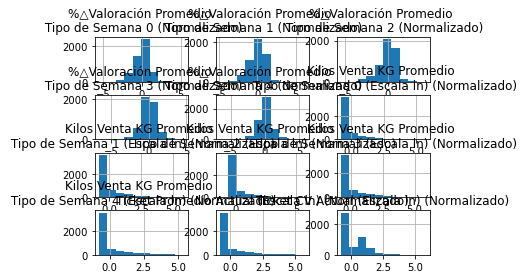

In [164]:
Ajuste_total(Data_Customers_Full)[0][Ajuste_total(Data_Customers_Full)[1]].hist()


In [165]:
# Data_Customers_Full[
#     Week_Val_Col_list
# ].hist()
# -----------------------------------------
#  name 'Week_Val_Col_list' is not defined

array([[<AxesSubplot:title={'center':'Recency Actual'}>,
        <AxesSubplot:title={'center':'Frecuency Actual del Cliente'}>,
        <AxesSubplot:title={'center':'Kilos Venta KG Promedio'}>,
        <AxesSubplot:title={'center':'Precio Promedio'}>,
        <AxesSubplot:title={'center':'Año Creación Promedio'}>,
        <AxesSubplot:title={'center':'Frecuencia Historica Promedio'}>],
       [<AxesSubplot:title={'center':'Monetary Actual'}>,
        <AxesSubplot:title={'center':'Ticket std Actual'}>,
        <AxesSubplot:title={'center':'$F^{-1}$ Actual'}>,
        <AxesSubplot:title={'center':'Frecuency Actual del Cliente (Escala ln) (Normalizado)'}>,
        <AxesSubplot:title={'center':'Monetary Actual (Escala ln) (Normalizado)'}>,
        <AxesSubplot:title={'center':'%△Valoración Promedio \n Tipo de Semana 0 (Normalizado)'}>],
       [<AxesSubplot:title={'center':'%△Valoración Promedio \n Tipo de Semana 1 (Normalizado)'}>,
        <AxesSubplot:title={'center':'%△Valoración Promed

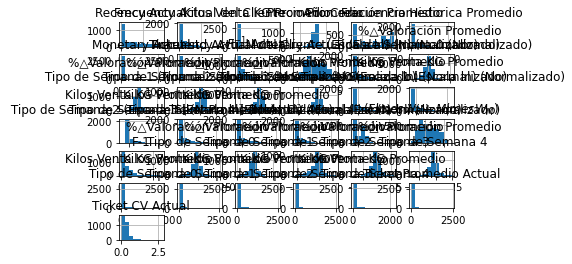

In [166]:
pd.merge(R_FM_Customers['Activo'],Data_Customers_Full ,how='left').hist()




#### Aplicación con todas las columnas

In [167]:
Ajuste_total(Data_Customers_Full)[0]\
            [Ajuste_total(Data_Customers_Full)[1]]#columnas de interes

%△Valoración Promedio \n Tipo de Semana 0 (Normalizado)  \
0                                             -0.788166         
1                                              0.376248         
2                                              1.131110         
3                                             -0.082414         
4                                             -0.007194         
...                                                 ...         
5068                                           0.002403         
5069                                           1.132631         
5070                                          -0.399297         
5071                                          -2.034562         
5072                                          -2.438455         

      %△Valoración Promedio \n Tipo de Semana 1 (Normalizado)  \
0                                             -0.655713         
1                                              0.822433         
2                                              0.854727         
3                                              1.426628         
4                                             -0.389898         
...                                                 ...         
5068                                           0.226814         
5069                                           1.039497         
5070                                           0.757112         
5071                                          -2.364857         
5072                                          -2.115568         

      %△Valoración Promedio \n Tipo de Semana 2 (Normalizado)  \
0                                             -0.761706         
1                                              0.668171         
2                                              0.989681         
3                                              0.802492         
4                                              0.699522         
...                                                 ...         
5068                                           0.182254         
5069                                           1.153976         
5070                                           0.497281         
5071                                           0.409979         
5072                                          -2.251895         

      %△Valoración Promedio \n Tipo de Semana 3 (Normalizado)  \
0                                             -0.525924         
1                                              0.770698         
2                                              0.498776         
3                                              0.598706         
4                                             -0.703175         
...                                                 ...         
5068                                           1.178908         
5069                                           1.400798         
5070                                          -2.844053         
5071                                          -0.977479         
5072                                          -1.714481         

      %△Valoración Promedio \n Tipo de Semana 4 (Normalizado)  \
0                                             -0.604528         
1                                              0.704865         
2                                              0.487972         
3                                              0.595751         
4                                             -0.098218         
...                                                 ...         
5068                                           0.266546         
5069                                           1.027260         
5070                                          -0.571189         
5071                                          -1.122050         
5072                                          -1.966720         

      Kilos Venta KG Promedio \n Tipo de Semana 0 (Escala ln) (Normalizado)  \
0                     

In [168]:
Col_Ajuste_otras_var=[
        '%△Valoración Promedio \n Tipo de Semana 0 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 1 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 2 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 3 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 4 (Normalizado)',

        'Kilos Venta KG Promedio \n Tipo de Semana 0 (Escala ln) (Normalizado)',
        'Kilos Venta KG Promedio \n Tipo de Semana 1 (Escala ln) (Normalizado)',
        'Kilos Venta KG Promedio \n Tipo de Semana 2 (Escala ln) (Normalizado)',
        'Kilos Venta KG Promedio \n Tipo de Semana 3 (Escala ln) (Normalizado)',
        'Kilos Venta KG Promedio \n Tipo de Semana 4 (Escala ln) (Normalizado)',

        'Ticket Promedio Actual (Escala ln) (Normalizado)',
        'Ticket CV Actual (Escala ln) (Normalizado)'
       ]

In [169]:
from sklearn import metrics
# a_i= 'Activo'
Col_X_test_rfm=[
    'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '$(F \times W_F + M \times W_M)$']


for a_i in R_FM_Customers.keys(): 
    X_rfm= \
        pd.merge(R_FM_Customers[a_i],
                Ajuste_total(Data_Customers_Full)[0],how='left'
                )[Col_X_test_rfm + Col_Ajuste_otras_var]
    # X_rfm=np.array(X_rfm)
    
    y_rfm=R_FM_Customers[a_i].identified_clusters.to_list()

    print(a_i ,'\n silhouette_score', 
     np.round(metrics.silhouette_score(X_rfm, y_rfm, metric='euclidean' ),4) , '\n' )

Activo 
 silhouette_score 0.1718 

Fugandose 
 silhouette_score 0.1593 

Fugando 
 silhouette_score 0.2934 



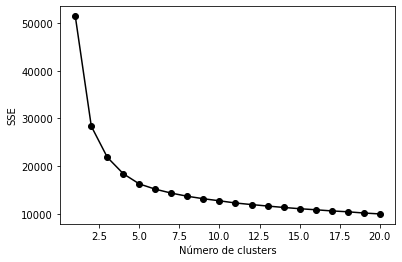

Activo 
 silhouette_score 0.221 



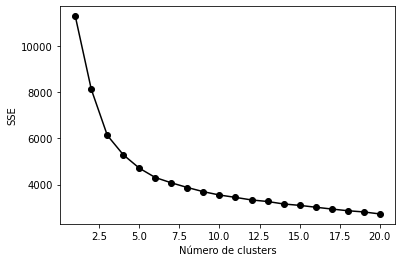

Fugandose 
 silhouette_score 0.2065 



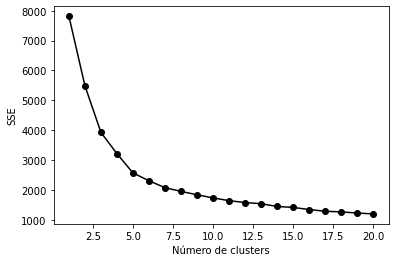

Fugando 
 silhouette_score 0.3183 



In [170]:
# Prueba Clustering con todos los atributos
import numpy as np
from sklearn.cluster import KMeans
Col_X_test_rfm=[
    'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '$(F \times W_F + M \times W_M)$']

Lis_curv_G=[]
for a_i in R_FM_Customers.keys(): 
    X_rfm= \
        pd.merge(R_FM_Customers[a_i],
                Ajuste_total(Data_Customers_Full)[0],how='left'
                )[Col_X_test_rfm + Col_Ajuste_otras_var]
    # X_rfm=np.array(X_rfm)
    # R_FM_Func.Curva_kmeans(X_rfm,[Col_X_test_rfm + Col_Ajuste_otras_var],)[0]
    Lis_curv_G.append(R_FM_Func.Curva_kmeans(X_rfm,X_rfm.columns)[0])
    kmeans_model = KMeans(n_clusters=5, random_state=1).fit(X_rfm)
    labels = kmeans_model.labels_
    print(a_i ,'\n silhouette_score',  
    np.round(metrics.silhouette_score(X_rfm, labels, metric='euclidean' ),4) , '\n' )
    # print(,metrics.silhouette_score(X_rfm, labels, metric='euclidean'))

### Calinski-Harabasz Index  2.3.10.6. 

Si no se conocen las etiquetas de verdad del terreno, se puede usar el índice de Calinski-Harabasz ( sklearn.metrics.calinski_harabasz_score), también conocido como Criterio de relación de varianza, para evaluar el modelo, donde una puntuación más alta de Calinski-Harabasz se relaciona con un modelo con clústeres mejor definidos.

El índice es la relación de la suma de la dispersión entre conglomerados y la dispersión dentro del conglomerado para todos los conglomerados (donde la dispersión se define como la suma de las distancias al cuadrado):

```python
>>> from sklearn import metrics
>>> from sklearn.metrics import pairwise_distances
>>> from sklearn import datasets
>>> X, y = datasets.load_iris(return_X_y=True)
```

En uso normal, el índice de Calinski-Harabasz se aplica a los resultados de un análisis de conglomerados:

```python 
>>> import numpy as np
>>> from sklearn.cluster import KMeans
>>> kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
>>> labels = kmeans_model.labels_
>>> metrics.calinski_harabasz_score(X, labels)
561.62...
```

Ventajas 
- La puntuación es más alta cuando los conglomerados son densos y bien separados, lo que se relaciona con un concepto estándar de conglomerado.

- La puntuación es rápida de calcular.

Inconvenientes 
- El índice de Calinski-Harabasz es generalmente más alto para los conglomerados convexos que para otros conceptos de conglomerados, como los conglomerados basados ​​en la densidad como los obtenidos a través de DBSCAN.

Formulación matemática 
- Para un conjunto de datos $E$ de tamaño $n_E$ que se ha agrupado en $k$ grupos, la puntuación de Calinski-Harabaszse define como la relación entre la dispersión media entre grupos y la dispersión dentro de los grupos:

$S=\dfrac{tr(B_k)}{tr(W_k)}\times\dfrac{n_E-k}{k-1}$

dónde $tr(B_k)$ es la traza de la matriz de dispersión entre grupos y $tr(W_k)$ es la traza de la matriz de dispersión dentro del grupo definida por:

$W_k= \sum_{q=1}^k  \sum_{x \in C_q} (x-c_q) (x- c_q)^T$

$B_k = \sum_{q=1}^k  n_q (c_q-c_E) (c_q- c_E)^T $

con $C_q$ el conjunto de puntos en cluster $q$, $c_q$ el centro del racimo $q$, $c_E$ el centro de $E$, y $n_q$ el número de puntos en el clúster $q$.

Referencias

Caliński, T. y Harabasz, J. (1974). “Un método de dendritas para el análisis de conglomerados” . Comunicaciones en Estadística-teoría y Métodos 3: 1-27 .

### Resultados

#### Solo columnas RFM

In [171]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
# from sklearn import datasets
# X, y = datasets.load_iris(return_X_y=True)
# ```

# En uso normal, el índice de Calinski-Harabasz se aplica a los resultados de un análisis de conglomerados:

# import numpy as np
# from sklearn.cluster import KMeans
# # kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
# labels = kmeans_model.labels_

Col_X_test_rfm=[
    'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '$(F \times W_F + M \times W_M)$']


for a_i in R_FM_Customers.keys(): 
    X_rfm= \
        pd.merge(R_FM_Customers[a_i],
                Ajuste_total(Data_Customers_Full)[0],how='left'
                )[Col_X_test_rfm 
                # + Col_Ajuste_otras_var
                ]
    # X_rfm=np.array(X_rfm)
    
    y_rfm=R_FM_Customers[a_i].identified_clusters.to_list()
    print(a_i ,'\n silhouette_score',  np.round(metrics.silhouette_score(X_rfm, y_rfm, metric='euclidean' ),4)  )
    print(' calinski_harabasz_score',  np.round(metrics.calinski_harabasz_score(X_rfm, y_rfm),4) , '\n' )

Activo 
 silhouette_score 0.0442
 calinski_harabasz_score 1888.2829 

Fugandose 
 silhouette_score -0.0641
 calinski_harabasz_score 328.8229 

Fugando 
 silhouette_score -0.0726
 calinski_harabasz_score 138.7073 



#### Todas las columnas 

In [172]:
Col_Ajuste_otras_var=[
        '%△Valoración Promedio \n Tipo de Semana 0 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 1 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 2 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 3 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 4 (Normalizado)',

        'Kilos Venta KG Promedio \n Tipo de Semana 0 (Escala ln) (Normalizado)',
        'Kilos Venta KG Promedio \n Tipo de Semana 1 (Escala ln) (Normalizado)',
        'Kilos Venta KG Promedio \n Tipo de Semana 2 (Escala ln) (Normalizado)',
        'Kilos Venta KG Promedio \n Tipo de Semana 3 (Escala ln) (Normalizado)',
        'Kilos Venta KG Promedio \n Tipo de Semana 4 (Escala ln) (Normalizado)',

        'Ticket Promedio Actual (Escala ln) (Normalizado)',
        'Ticket CV Actual (Escala ln) (Normalizado)'
       ]

In [173]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
# from sklearn import datasets
# X, y = datasets.load_iris(return_X_y=True)
# ```

# En uso normal, el índice de Calinski-Harabasz se aplica a los resultados de un análisis de conglomerados:

# import numpy as np
# from sklearn.cluster import KMeans
# # kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
# labels = kmeans_model.labels_

Col_X_test_rfm=[
    'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '$(F \times W_F + M \times W_M)$']


for a_i in R_FM_Customers.keys(): 
    X_rfm= \
        pd.merge(R_FM_Customers[a_i],
                Ajuste_total(Data_Customers_Full)[0],how='left'
                )[Col_X_test_rfm 
                + Col_Ajuste_otras_var
                ]
    # X_rfm=np.array(X_rfm)
    
    y_rfm=R_FM_Customers[a_i].identified_clusters.to_list()
    print(a_i ,'\n silhouette_score',  np.round(metrics.silhouette_score(X_rfm, y_rfm, metric='euclidean' ),4) )
    print(' calinski_harabasz_score',  np.round(metrics.calinski_harabasz_score(X_rfm, y_rfm),4) , '\n' )

Activo 
 silhouette_score 0.1718
 calinski_harabasz_score 1280.0616 

Fugandose 
 silhouette_score 0.1593
 calinski_harabasz_score 334.0213 

Fugando 
 silhouette_score 0.2934
 calinski_harabasz_score 255.8627 



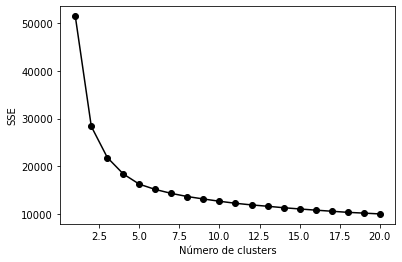

Activo Numero de clusters  5  
 silhouette_score 0.221
calinski_harabasz_score 1735.3293 



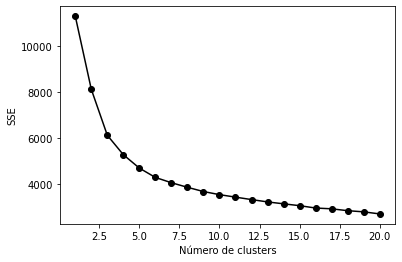

Fugandose Numero de clusters  5  
 silhouette_score 0.2065
calinski_harabasz_score 429.6482 



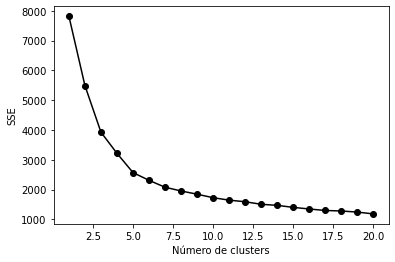

Fugando Numero de clusters  5  
 silhouette_score 0.3183
calinski_harabasz_score 313.6039 



In [174]:
# Prueba Clustering con todos los atributos
import numpy as np
from sklearn.cluster import KMeans
Numero_Clusters=5
Col_X_test_rfm=[
    'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '$(F \times W_F + M \times W_M)$']

Lis_curv_G=[]
for a_i in R_FM_Customers.keys(): 
    X_rfm= \
        pd.merge(R_FM_Customers[a_i],
                Ajuste_total(Data_Customers_Full)[0],how='left'
                )[Col_X_test_rfm + Col_Ajuste_otras_var]
    # X_rfm=np.array(X_rfm)
    # R_FM_Func.Curva_kmeans(X_rfm,[Col_X_test_rfm + Col_Ajuste_otras_var],)[0]
    Lis_curv_G.append(R_FM_Func.Curva_kmeans(X_rfm,X_rfm.columns)[0])
    kmeans_model = KMeans(n_clusters=Numero_Clusters, random_state=1).fit(X_rfm)
    labels = kmeans_model.labels_
    print(a_i ,'Numero de clusters ',Numero_Clusters,' \n silhouette_score', 
     np.round(metrics.silhouette_score(X_rfm, labels, metric='euclidean' ),4) )
    print('calinski_harabasz_score',  np.round(metrics.calinski_harabasz_score(X_rfm, labels),4) , '\n' )
    # print(,metrics.silhouette_score(X_rfm, labels, metric='euclidean'))

### Índice Davies-Bouldin 2.3.10.7.

Si no se conocen las etiquetas de verdad del terreno, sklearn.metrics.davies_bouldin_scorese puede usar el índice de Davies-Bouldin ( ) para evaluar el modelo, donde un índice de Davies-Bouldin más bajo se relaciona con un modelo con una mejor separación entre los grupos.

Este índice significa la 'similitud' promedio entre grupos, donde la similitud es una medida que compara la distancia entre grupos con el tamaño de los grupos mismos.

Cero es la puntuación más baja posible. Los valores más cercanos a cero indican una mejor partición.

En uso normal, el índice de Davies-Bouldin se aplica a los resultados de un análisis de conglomerados de la siguiente manera:

>```python
> from sklearn import datasets
> iris = datasets.load_iris()
> X = iris.data
> from sklearn.cluster import KMeans
> from sklearn.metrics import davies_bouldin_score
> kmeans = KMeans(n_clusters=3, random_state=1).fit(X)
> labels = kmeans.labels_
> davies_bouldin_score(X, labels)
0.6619...
```

Ventajas 
- El cálculo de Davies-Bouldin es más simple que el de las puntuaciones de Silhouette.

- El índice se basa únicamente en cantidades y características inherentes al conjunto de datos, ya que su cálculo solo utiliza distancias puntuales.

Inconvenientes 
- El índice de Davies-Boulding es generalmente más alto para los conglomerados convexos que para otros conceptos de conglomerados, como los conglomerados basados ​​en densidad como los obtenidos de DBSCAN.

- El uso de la distancia centroide limita la métrica de distancia al espacio euclidiano.

Formulación matemática 

El índice se define como la similitud promedio entre cada grupo pory su mas parecido. En el contexto de este índice, la similitud se define como una medidaque se intercambia:

>The index is defined as the average similarity between each cluster  for  and its most similar one . In the context of this index, similarity is defined as a measure  that trades off:

, la distancia promedio entre cada punto del grupoy el centroide de ese grupo, también conocido como diámetro del grupo.

, la distancia entre los centroides de los gruposy.

Una opción simple para construirpara que sea no negativo y simétrico es:

 
Entonces el índice de Davies-Bouldin se define como:

 
 



Referencias

Davies, David L.; Bouldin, Donald W. (1979). "Una medida de separación de grupos" Transacciones IEEE sobre análisis de patrones e inteligencia artificial. PAMI-1 (2): 224-227.

Halkidi, María; Batistakis, Yannis; Vazirgiannis, Michalis (2001). “Sobre técnicas de validación de agrupamiento” Journal of Intelligent Information Systems, 17(2-3), 107-145.

Entrada de Wikipedia para el índice de Davies-Bouldin .


### Resultados

In [175]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
# from sklearn import datasets
# X, y = datasets.load_iris(return_X_y=True)
# ```

# En uso normal, el índice de Calinski-Harabasz se aplica a los resultados de un análisis de conglomerados:

# import numpy as np
# from sklearn.cluster import KMeans
# # kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
# labels = kmeans_model.labels_

Col_X_test_rfm=[
    'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '$(F \times W_F + M \times W_M)$']


for a_i in R_FM_Customers.keys(): 
    X_rfm= \
        pd.merge(R_FM_Customers[a_i],
                Ajuste_total(Data_Customers_Full)[0],how='left'
                )[Col_X_test_rfm 
                # + Col_Ajuste_otras_var
                ]
    # X_rfm=np.array(X_rfm)
    
    y_rfm=R_FM_Customers[a_i].identified_clusters.to_list()

    print(a_i ,'\n silhouette_score',  np.round(metrics.silhouette_score(X_rfm, y_rfm, metric='euclidean' ),4) )
    print(' calinski_harabasz_score',  np.round(metrics.calinski_harabasz_score(X_rfm, y_rfm),4) , )
    print(' davies_bouldin_score',  np.round(metrics.davies_bouldin_score(X_rfm, y_rfm),4) , '\n' )

Activo 
 silhouette_score 0.0442
 calinski_harabasz_score 1888.2829
 davies_bouldin_score 2.55 

Fugandose 
 silhouette_score -0.0641
 calinski_harabasz_score 328.8229
 davies_bouldin_score 4.3407 

Fugando 
 silhouette_score -0.0726
 calinski_harabasz_score 138.7073
 davies_bouldin_score 4.724 



In [176]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
# from sklearn import datasets
# X, y = datasets.load_iris(return_X_y=True)
# ```

# En uso normal, el índice de Calinski-Harabasz se aplica a los resultados de un análisis de conglomerados:

# import numpy as np
# from sklearn.cluster import KMeans
# # kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
# labels = kmeans_model.labels_

Col_X_test_rfm=[
    'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '$(F \times W_F + M \times W_M)$']


for a_i in R_FM_Customers.keys(): 
    X_rfm= \
        pd.merge(R_FM_Customers[a_i],
                Ajuste_total(Data_Customers_Full)[0],how='left'
                )[Col_X_test_rfm 
                + Col_Ajuste_otras_var
                ]
    # X_rfm=np.array(X_rfm)
    
    y_rfm=R_FM_Customers[a_i].identified_clusters.to_list()

    print(a_i ,'\n silhouette_score',  np.round(metrics.silhouette_score(X_rfm, y_rfm, metric='euclidean' ),4) )
    print(' calinski_harabasz_score',  np.round(metrics.calinski_harabasz_score(X_rfm, y_rfm),4) , )
    print(' davies_bouldin_score',  np.round(metrics.davies_bouldin_score(X_rfm, y_rfm),4) , '\n' )

Activo 
 silhouette_score 0.1718
 calinski_harabasz_score 1280.0616
 davies_bouldin_score 1.5121 

Fugandose 
 silhouette_score 0.1593
 calinski_harabasz_score 334.0213
 davies_bouldin_score 1.4647 

Fugando 
 silhouette_score 0.2934
 calinski_harabasz_score 255.8627
 davies_bouldin_score 1.1381 



```
Activo Numero de clusters  10  
 silhouette_score 0.1603
calinski_harabasz_score 703.3304
 davies_bouldin_score 1.563
 ```

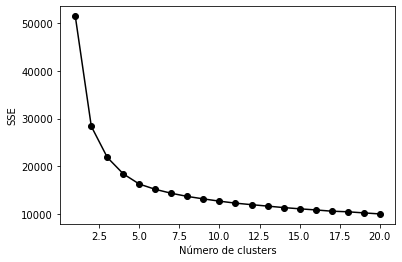

Activo Numero de clusters  7  
 silhouette_score 0.1696
calinski_harabasz_score 1382.9786
 davies_bouldin_score 1.5328 



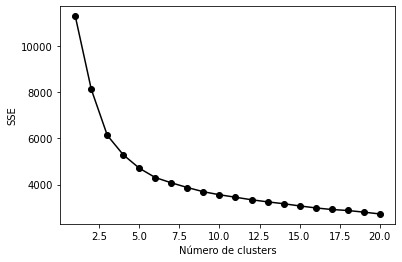

Fugandose Numero de clusters  7  
 silhouette_score 0.1678
calinski_harabasz_score 361.9636
 davies_bouldin_score 1.4449 



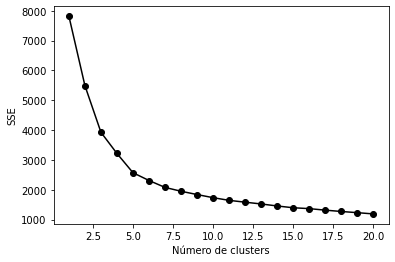

Fugando Numero de clusters  7  
 silhouette_score 0.2996
calinski_harabasz_score 281.7629
 davies_bouldin_score 1.0744 



In [177]:
# Prueba Clustering con todos los atributos
import numpy as np
from sklearn.cluster import KMeans
Numero_Clusters=7
Col_X_test_rfm=[
    'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '$(F \times W_F + M \times W_M)$']

Lis_curv_G=[]
for a_i in R_FM_Customers.keys(): 
    X_rfm= \
        pd.merge(R_FM_Customers[a_i],
                Ajuste_total(Data_Customers_Full)[0],how='left'
                )[Col_X_test_rfm + Col_Ajuste_otras_var]
    # X_rfm=np.array(X_rfm)
    # R_FM_Func.Curva_kmeans(X_rfm,[Col_X_test_rfm + Col_Ajuste_otras_var],)[0]
    Lis_curv_G.append(R_FM_Func.Curva_kmeans(X_rfm,X_rfm.columns)[0])
    kmeans_model = KMeans(n_clusters=Numero_Clusters, random_state=1).fit(X_rfm)
    labels = kmeans_model.labels_
    print(a_i ,'Numero de clusters ',Numero_Clusters,' \n silhouette_score', 
     np.round(metrics.silhouette_score(X_rfm, labels, metric='euclidean' ),4) )
    print('calinski_harabasz_score',  np.round(metrics.calinski_harabasz_score(X_rfm, labels),4)  )
    print(' davies_bouldin_score',  np.round(metrics.davies_bouldin_score(X_rfm, labels),4) , '\n' )
